In [ ]:
##################################################################################################################################################
# Вариант 14
# 19/20 четный
# http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise
# Число и АХ нейронов 1-го скрытого слоя | Число и АХ нейронов 2-го скрытого слоя |	Число и АХ нейронов 3-го скрытого слоя | Режим обучения
#             20, logistic	             |               20, tanh	                |                   –	                   | Mini-batch, bs = 50
##################################################################################################################################################

### 1 Исходные данные

#### 1.1 Создание массива и импорт данных

In [ ]:
import pandas as pd

headers = ["Frequency", "Angle_of_attack", "Chord_length", "Free_stream_velocity", "Suction_side_displacement_thickness", "Scaled_SPL"]
d = pd.read_table("/content/drive/My Drive/Colab Notebooks/content/airfoil_self_noise.dat", names=headers)
data = pd.DataFrame(d)


In [ ]:
data

Frequency  ...  Scaled_SPL
0           800  ...     126.201
1          1000  ...     125.201
2          1250  ...     125.951
3          1600  ...     127.591
4          2000  ...     127.461
...         ...  ...         ...
1498       2500  ...     110.264
1499       3150  ...     109.254
1500       4000  ...     106.604
1501       5000  ...     106.224
1502       6300  ...     104.204

[1503 rows x 6 columns]

####1.2 Визуальный анализ исходных данных

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
#графики в svg выглядят более четкими
# %config InlineBackend.figure_format = 'svg' 

In [ ]:
#Скорее всего не пригодится
!pip install plotly
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
#init_notebook_mode(connected=True)

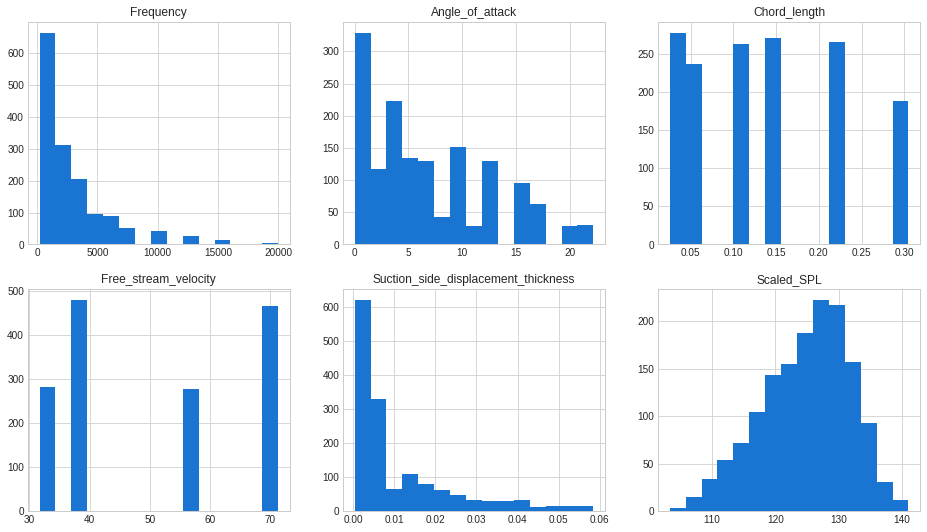

In [ ]:
#Длинный способ
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (16,9) #Размер поля
j=1
#plt.subplots_adjust(0,0,0.2,0.2,0.2,0.2) #расстояние между таблицами
for i in data.columns:
    plt.subplot(2, 3, j,)
    plt.hist(data[i],15,color='#1974d2')
    plt.title(i)
    j+=1
plt.show()

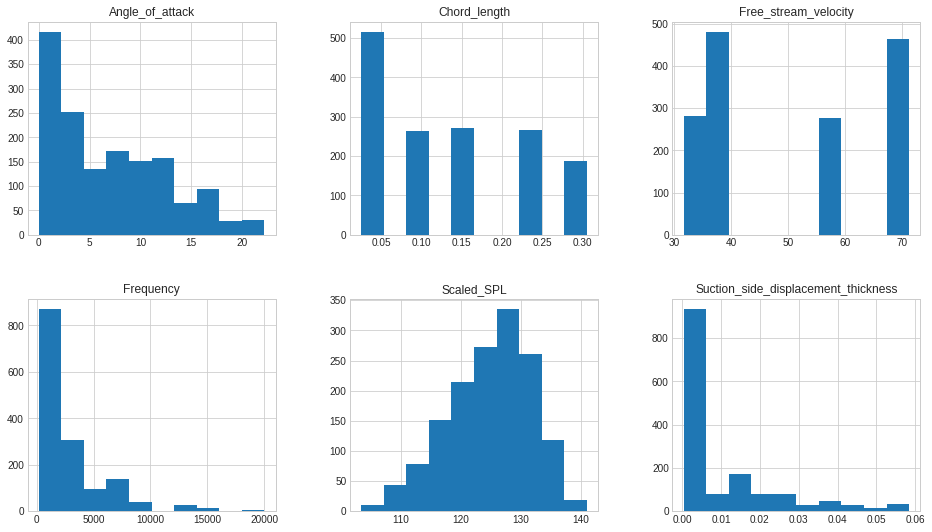

In [ ]:
#Короткий способ
plt.style.use('seaborn-whitegrid')
data.hist(figsize=(16,9),layout=(2,3))
plt.show()

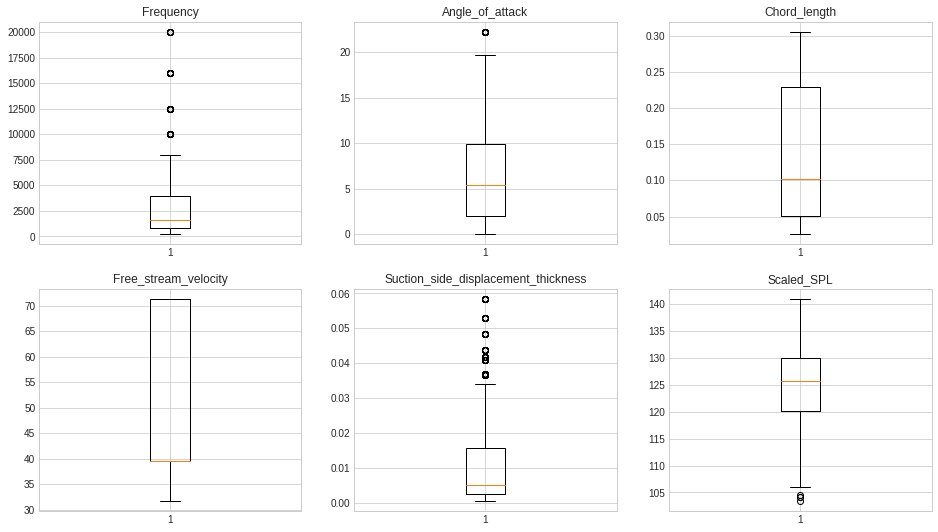

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (16,9) #Размер поля
j=1
#plt.subplots_adjust(0,0,0.5,0.5,0.3,0.3) #расстояние между таблицами
for i in data.columns:
    plt.subplot(2, 3, j,)
    plt.boxplot(data[i])
    plt.title(i)
    j+=1
plt.show()

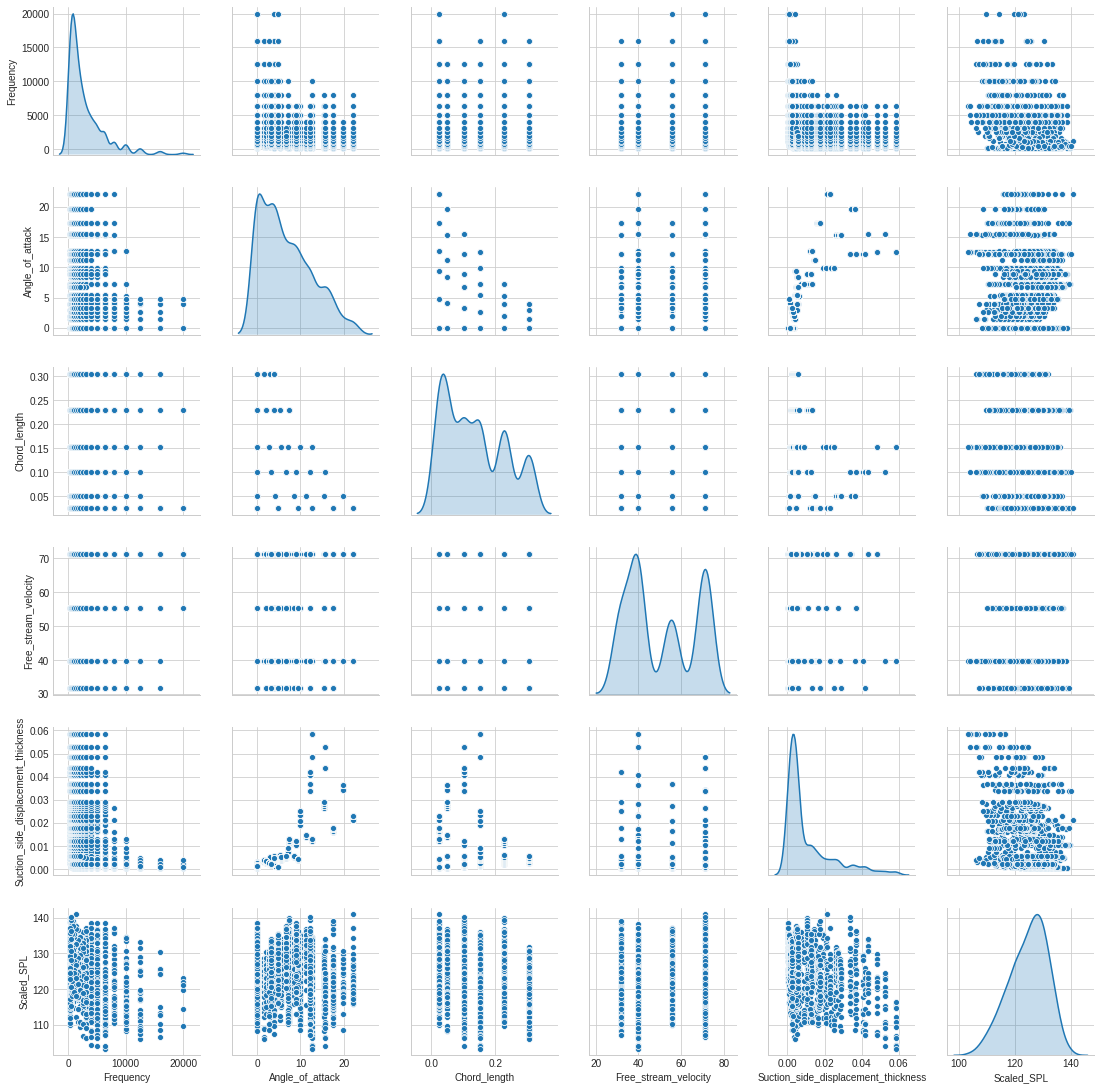

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (3,3)
sns.pairplot(data, diag_kind="kde")
plt.show()

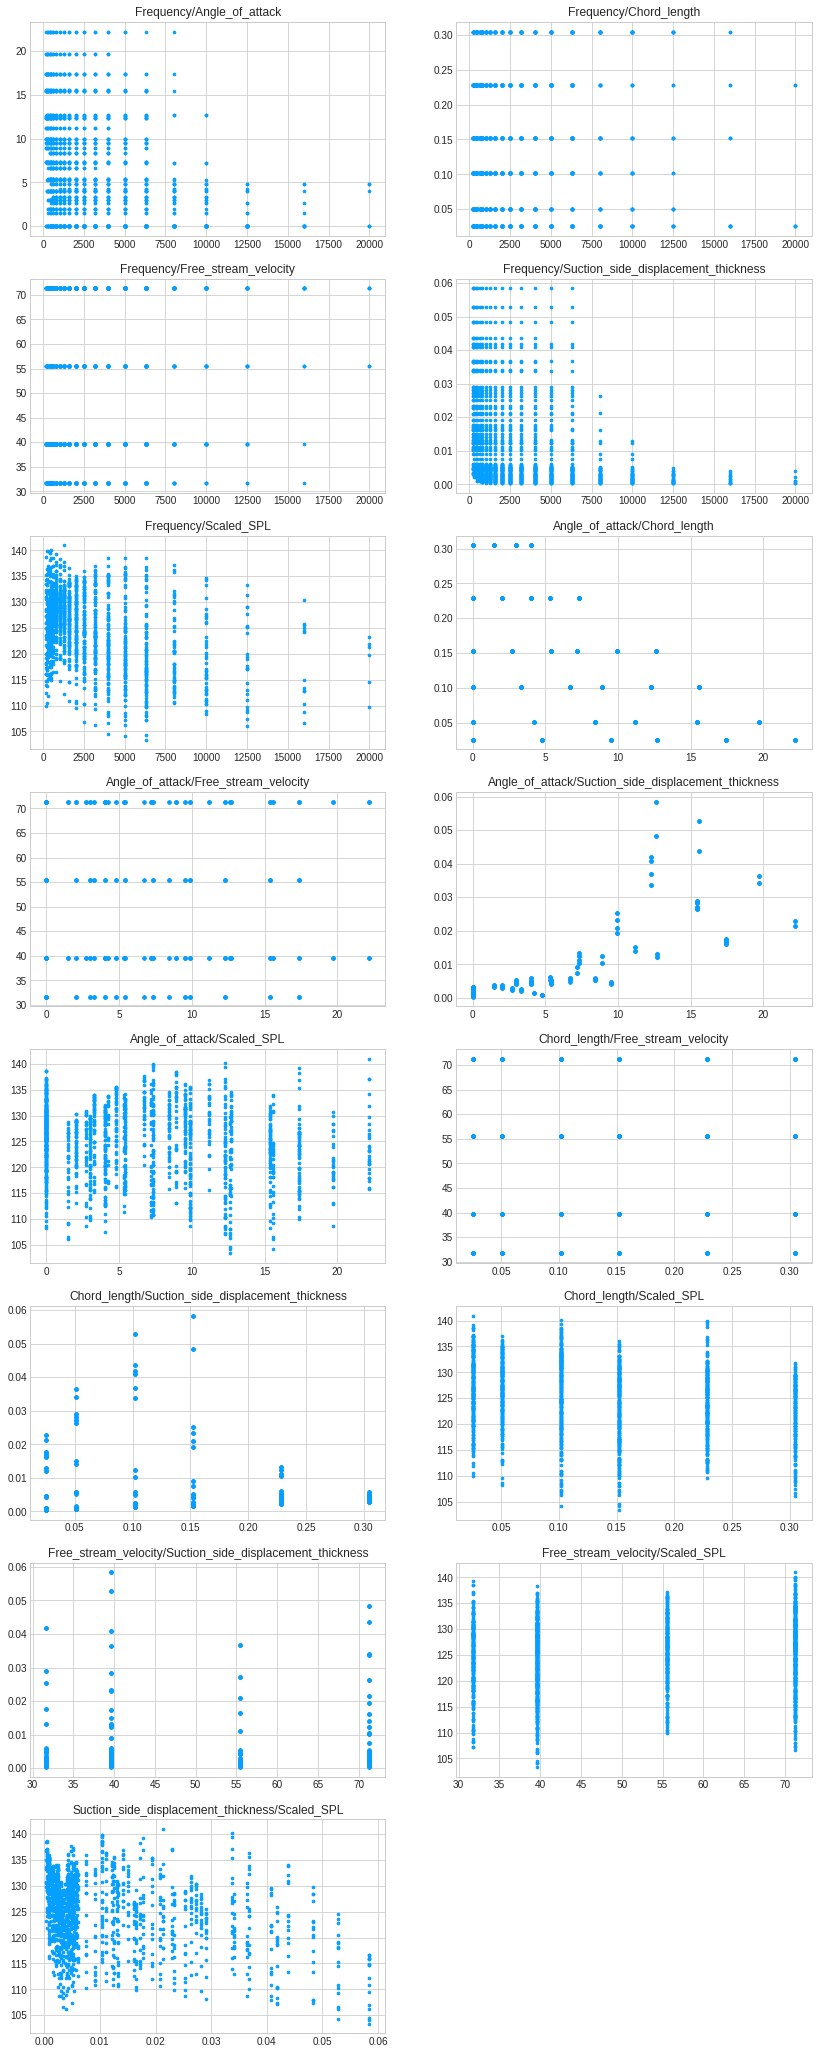

In [ ]:
plt.rcParams["figure.figsize"] = (14,37) #Размер поля
#plt.subplots_adjust(0,0,0.8,1,0.5,0.5) #расстояние между таблицами
j=1
for i in range(len(data.columns)):
    for k in range(len(data.columns)):
        if i != k and k > i:
            plt.subplot(8, 2, j)
            plt.scatter(data[data.columns[i]], data[data.columns[k]], s=7, c='#059fff')
            plt.title(data.columns[i]+'/'+data.columns[k])
            j+=1
plt.show()

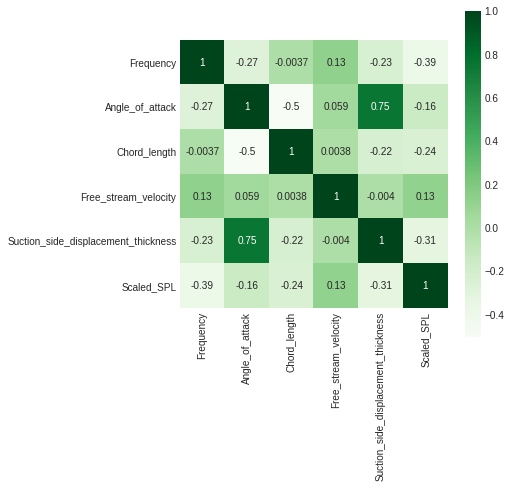

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
sns.heatmap(data.corr(), annot = True, square=True, cmap = "Greens")
plt.show()

### 2 Предобработка данных

####2.1 Очистка данных

In [ ]:
data.info() #Проверка наличия пропущенных значений. Пропущенных значений не обнаружено.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1503 non-null   int64  
 1   Angle_of_attack                      1503 non-null   float64
 2   Chord_length                         1503 non-null   float64
 3   Free_stream_velocity                 1503 non-null   float64
 4   Suction_side_displacement_thickness  1503 non-null   float64
 5   Scaled_SPL                           1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [ ]:
data.isna().sum() #Другой способ проверки на пропущенные значения

Frequency                              0
Angle_of_attack                        0
Chord_length                           0
Free_stream_velocity                   0
Suction_side_displacement_thickness    0
Scaled_SPL                             0
dtype: int64

In [ ]:
#Проверка на нулевые значения
for i in range(len(data.columns)):
    if 0.0 in data.values[:,i]:
        print("Признак", i+1 ,"содержит нулевые значения")

Признак 2 содержит нулевые значения


In [ ]:
#Проверка на дубликаты
before_drop_duplicates = data.size/len(data.columns)
print(before_drop_duplicates)
data1 = data.drop_duplicates()         # удаляем дубликаты
data1 = pd.DataFrame(data1)            # Нужно для объявления нового объекта data1 (если не сделать то при изменении data меняется data1)
after_drop_duplicates = data1.size/len(data1.columns)
print(after_drop_duplicates)
if after_drop_duplicates == before_drop_duplicates:
  print("Дубликатов нет")
else:
  print("Дубликаты есть")


1503.0
1503.0
Дубликатов нет


In [ ]:
#Устранение выбросов
# Отсеивать будем значений в диапазоне трёх сигм
print(data1.shape)
from scipy import stats
import numpy as np
data1 = data1[(np.abs(stats.zscore(data1)) < 3).all(axis=1)]
print(data1.shape)

(1503, 6)
(1427, 6)


####2.1.г Визуальный анализ очищенных данных

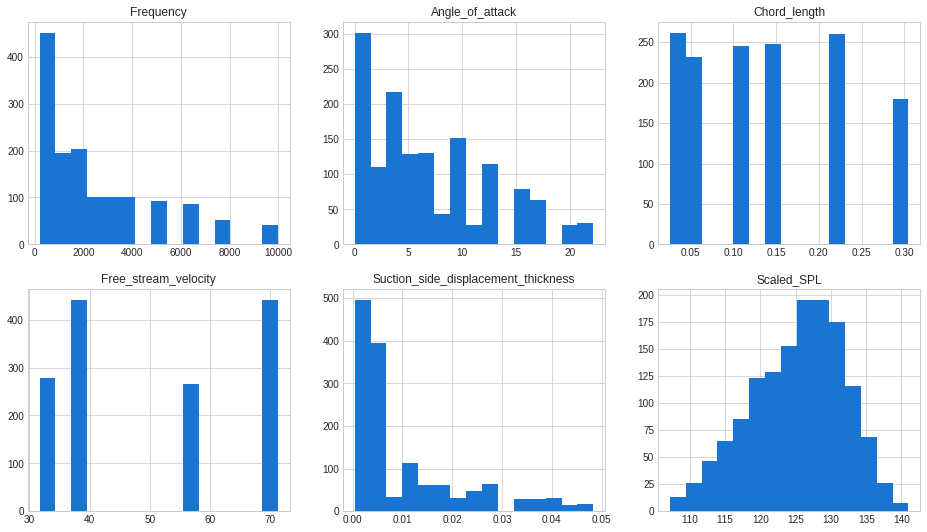

In [ ]:
#Длинный способ
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (16,9) #Размер поля
j=1
#plt.subplots_adjust(0,0,0.2,0.2,0.2,0.2) #расстояние между таблицами
for i in data1.columns:
    plt.subplot(2, 3, j,)
    plt.hist(data1[i],15,color='#1974d2')
    plt.title(i)
    j+=1
plt.show()

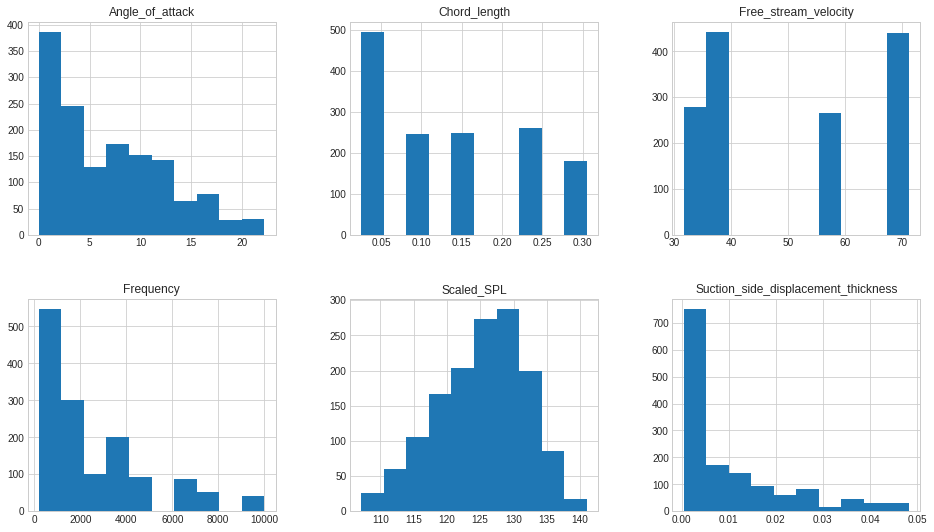

In [ ]:
#Короткий способ
plt.style.use('seaborn-whitegrid')
data1.hist(figsize=(16,9),layout=(2,3))
plt.show()

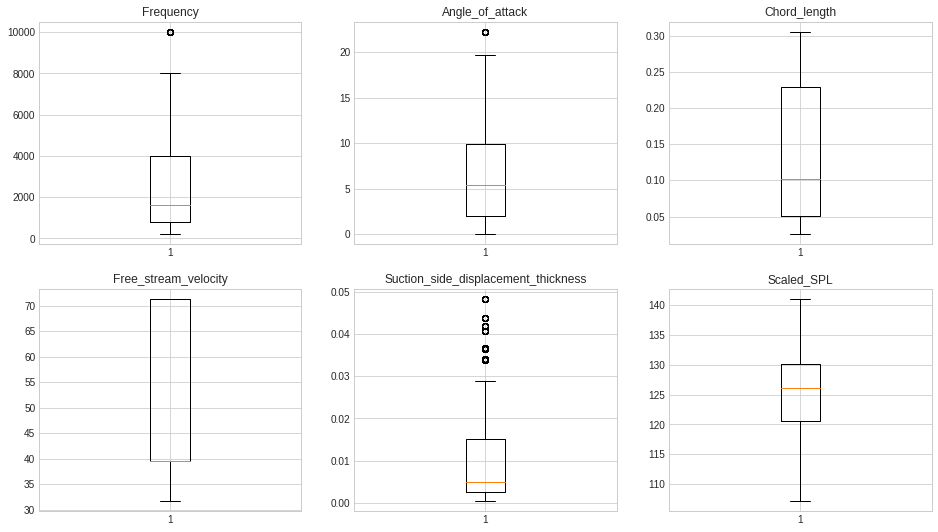

In [ ]:
plt.rcParams["figure.figsize"] = (16,9) #Размер поля
j=1
#plt.subplots_adjust(0,0,0.5,0.5,0.3,0.3) #расстояние между таблицами
for i in data1.columns:
    plt.subplot(2, 3, j,)
    plt.boxplot(data1[i])
    plt.title(i)
    j+=1
plt.show()

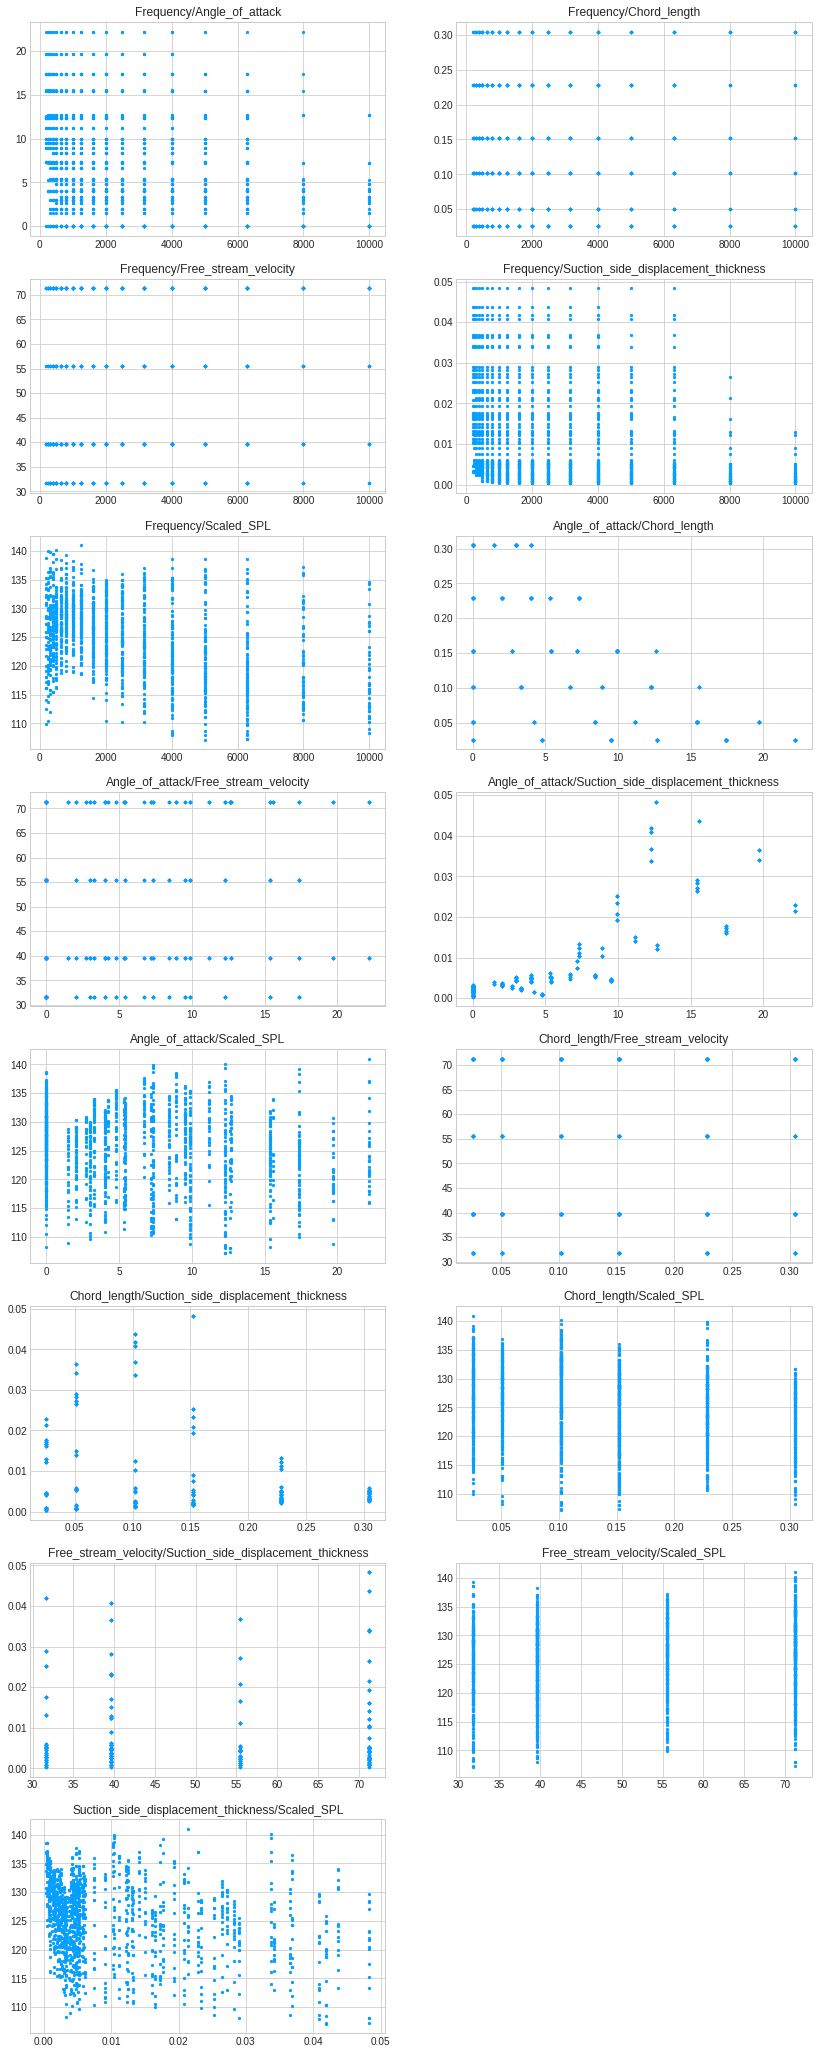

In [ ]:
plt.rcParams["figure.figsize"] = (14,37) #Размер поля
#plt.subplots_adjust(0,0,0.8,1,0.5,0.5) #расстояние между таблицами
j=1
for i in range(len(data1.columns)):
    for k in range(len(data1.columns)):
        if i != k and k > i:
            plt.subplot(8, 2, j)
            plt.scatter(data1[data1.columns[i]], data1[data1.columns[k]],s=5,c='#059fff')
            plt.title(data1.columns[i]+'/'+data1.columns[k])
            j+=1
plt.show()

####2.2 Преобразование данных


##### import

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from scipy import stats
import scipy as sp
import numpy as np
import math 

In [ ]:
print(sp.__version__) #Проверка версий

1.4.1


##### Преобразование данных

In [ ]:
#Разделение на обучающую и тестовую выборки 
train_data, test_data = train_test_split(data1, train_size=0.9, test_size=0.1, random_state=42) #90%/10% Валидационные данные отщепляются от тестовых
train_data.shape, test_data.shape

((1284, 6), (143, 6))

In [ ]:
#Вывод статистики
train_stats = train_data.describe()
train_stats.pop("Scaled_SPL") #Отсекаем результат
train_stats = train_stats.transpose()
train_stats

count  ...           max
Frequency                            1284.0  ...  10000.000000
Angle_of_attack                      1284.0  ...     22.200000
Chord_length                         1284.0  ...      0.304800
Free_stream_velocity                 1284.0  ...     71.300000
Suction_side_displacement_thickness  1284.0  ...      0.048316

[5 rows x 8 columns]

In [ ]:
#Присваиваем переменным выходные данные и одновременно стираем их из начальных таблиц
train_y = train_data.pop('Scaled_SPL')
test_y = test_data.pop('Scaled_SPL')

In [ ]:
train_y

861     133.790
395     133.768
635     128.879
272     122.147
739     125.586
         ...   
1153    124.276
1188    131.364
1354    135.953
902     121.783
1184    117.514
Name: Scaled_SPL, Length: 1284, dtype: float64

In [ ]:
train_data

Frequency  ...  Suction_side_displacement_thickness
861         800  ...                             0.015048
395         630  ...                             0.010440
635         800  ...                             0.019300
272         400  ...                             0.003466
739        1000  ...                             0.000762
...         ...  ...                                  ...
1153        800  ...                             0.016104
1188       1250  ...                             0.017221
1354        800  ...                             0.005214
902         200  ...                             0.028259
1184        500  ...                             0.017221

[1284 rows x 5 columns]

In [ ]:
#Преобразование входных данных (Нормализация)
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)
#Используем данные из обучающей выборки, чтобы тестовая выборка была из того распределения на которой обучалась модель.

In [ ]:
normed_train_data

Frequency  ...  Suction_side_displacement_thickness
861   -0.719554  ...                             0.385146
395   -0.789465  ...                            -0.005552
635   -0.719554  ...                             0.745732
272   -0.884051  ...                            -0.596989
739   -0.637306  ...                            -0.826266
...         ...  ...                                  ...
1153  -0.719554  ...                             0.474709
1188  -0.534495  ...                             0.569395
1354  -0.719554  ...                            -0.448749
902   -0.966300  ...                             1.505454
1184  -0.842927  ...                             0.569395

[1284 rows x 5 columns]

In [ ]:
normed_train_data_1 = normed_train_data
training, validation = train_test_split(normed_train_data_1, train_size=2/3, test_size=1/3, random_state=42)
print('Длина обучающей выборки:', len(training))
print('Длина валидационной выборки:', len(validation))
print('Длина тестовой выборки:', len(test_y))


Длина обучающей выборки: 856
Длина валидационной выборки: 428
Длина тестовой выборки: 143


#### 2.2.в Визуальный анализ преобразованных данных

##### Соединяем все данные в одну таблицу

In [ ]:
full_changed_train_data = normed_train_data
full_changed_train_data['Scaled_SPL'] = train_y #Заменить на train_y
full_changed_test_data = normed_test_data
full_changed_test_data['Scaled_SPL'] = test_y #Заменить на test_y

In [ ]:
full_changed_test_data

Frequency  ...  Scaled_SPL
130   -0.789465  ...     129.292
1247   0.246866  ...     131.955
478    1.007664  ...     125.203
365   -0.534495  ...     133.380
1067   1.542279  ...     127.246
...         ...  ...         ...
381   -0.637306  ...     125.581
1469   0.246866  ...     110.307
807   -0.884051  ...     121.582
834   -0.637306  ...     129.516
609    1.542279  ...     116.603

[143 rows x 6 columns]

In [ ]:
full_changed_train_data

Frequency  ...  Scaled_SPL
861   -0.719554  ...     133.790
395   -0.789465  ...     133.768
635   -0.719554  ...     128.879
272   -0.884051  ...     122.147
739   -0.637306  ...     125.586
...         ...  ...         ...
1153  -0.719554  ...     124.276
1188  -0.534495  ...     131.364
1354  -0.719554  ...     135.953
902   -0.966300  ...     121.783
1184  -0.842927  ...     117.514

[1284 rows x 6 columns]

In [ ]:
full_changed_data = full_changed_train_data
full_changed_data.append(full_changed_test_data)
full_changed_data.shape

(1284, 6)

In [ ]:
import numpy as np
import pandas as pd
full_changed_data = pd.concat([full_changed_test_data, full_changed_train_data])
full_changed_data.shape

(1427, 6)

##### Визуализация

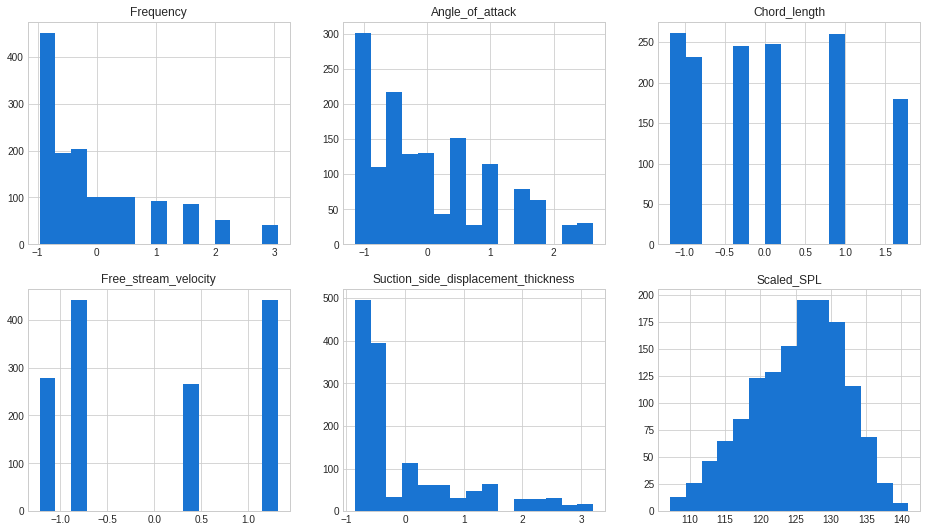

In [ ]:
#Длинный способ
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (16,9) #Размер поля
j=1
#plt.subplots_adjust(0,0,0.2,0.2,0.2,0.2) #расстояние между таблицами
for i in full_changed_data.columns:
    plt.subplot(2, 3, j,)
    plt.hist(full_changed_data[i],15,color='#1974d2')
    plt.title(i)
    j+=1
plt.show()

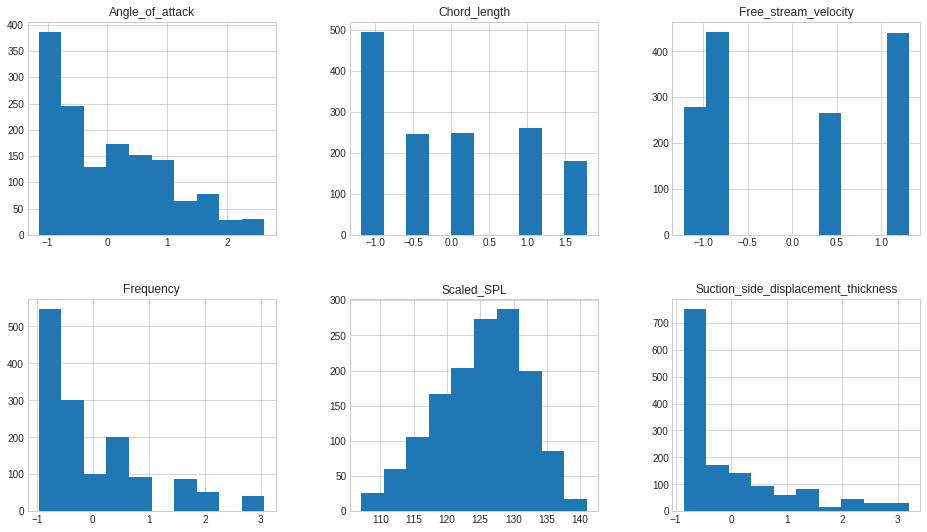

In [ ]:
#Короткий способ
full_changed_data.hist(figsize=(16,9),layout=(2,3))
plt.show()

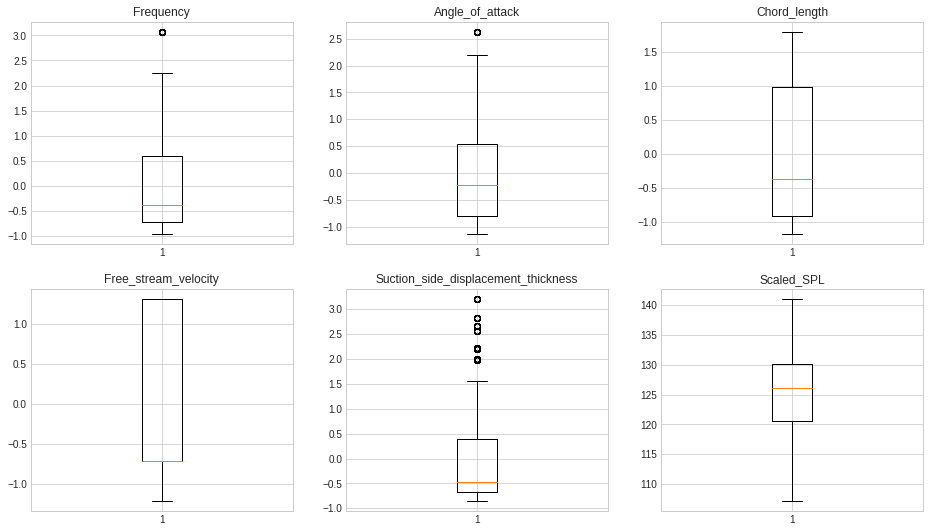

In [ ]:
plt.rcParams["figure.figsize"] = (16,9) #Размер поля
j=1
#plt.subplots_adjust(0,0,0.5,0.5,0.3,0.3) #расстояние между таблицами
for i in full_changed_data.columns:
    plt.subplot(2, 3, j,)
    plt.boxplot(full_changed_data[i])
    plt.title(i)
    j+=1
plt.show()

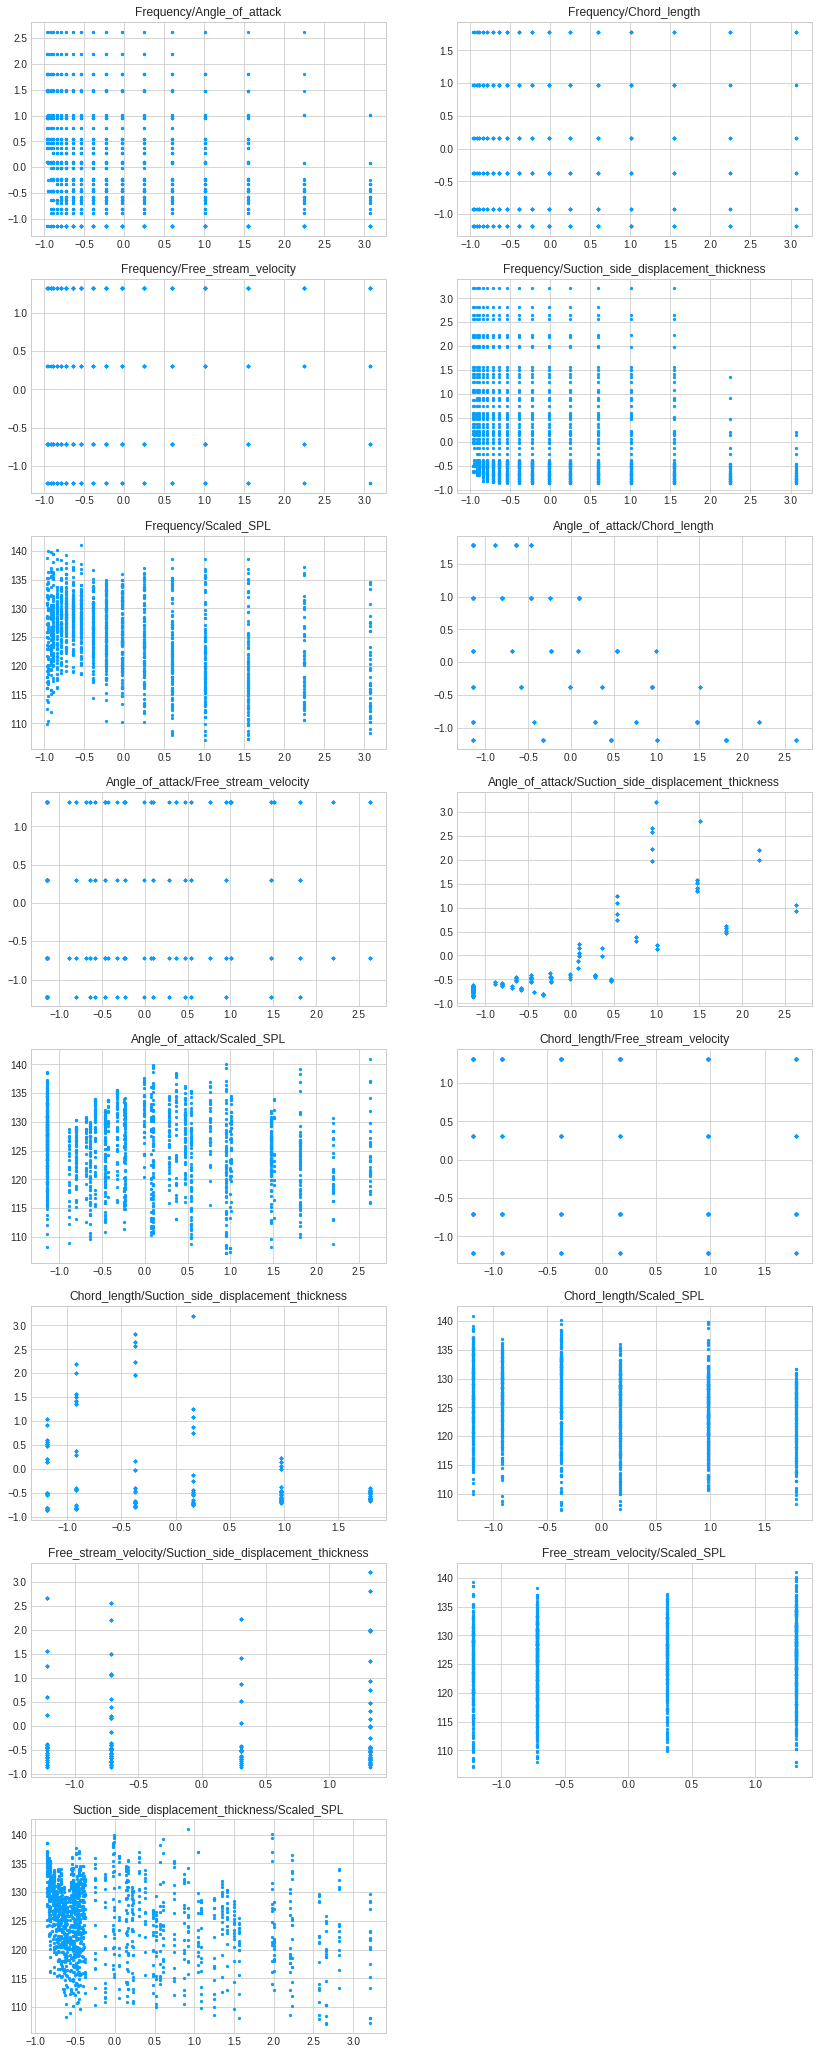

In [ ]:
plt.rcParams["figure.figsize"] = (14,37) #Размер поля
#plt.subplots_adjust(0,0,0.8,1,0.5,0.5) #расстояние между таблицами
j=1
for i in range(len(full_changed_data.columns)):
    for k in range(len(full_changed_data.columns)):
        if i != k and k > i:
            plt.subplot(8, 2, j)
            plt.scatter(full_changed_data[full_changed_data.columns[i]], full_changed_data[full_changed_data.columns[k]],s=5,c='#059fff')
            plt.title(full_changed_data.columns[i]+'/'+full_changed_data.columns[k])
            j+=1
plt.show()

### 3 Формирование признаков

In [ ]:
for i in data.columns:
  print(np.std(data[i]))

3151.524202236218
5.916159025472469
0.09350960518948366
15.56760296639676
0.0131458588768195
6.896361277488788


In [ ]:
for i in normed_train_data.columns:
  print(np.std(data[i]))

3151.524202236218
5.916159025472469
0.09350960518948366
15.56760296639676
0.0131458588768195
6.896361277488788


### 4 Построение и исследование нейросетевых моделей

#### import & def

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [ ]:

from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.callbacks import LambdaCallback
from keras.optimizers import Adadelta
from keras.optimizers import Adam

import torch
from torch.optim import Rprop

In [ ]:
from random import seed

In [ ]:
from keras import backend as K
from keras import initializers

In [ ]:
from math import floor
from itertools import chain

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# %config InlineBackend.figure_format = 'svg'

In [ ]:
!pip install plotly
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
#init_notebook_mode(connected=True)

In [ ]:
def get_rates(weights):
    rates = []
    for weight in weights:
        # Веса для одной модели - weight
        dim_x, dim_y = len(weight[0]), len(weight[0][0])
        first_step = weight[0]
        second_step = weight[1]
        rates.append([i for i in chain(*(second_step-first_step))])
    return rates

def get_average_rate(weights):
    rates = get_rates(weights)
    return [np.mean(weight) for weight in weights]

def get_max_rate(weights):
    rates = get_rates(weights)
    return [np.max(weight) for weight in weights]

def get_min_rate(weights):
    rates = get_rates(weights)
    return [np.min(weight) for weight in weights]

#### 4.2. Исследование простого градиентного метода обучения

In [ ]:
########## Выходной слой сигмоида #################################################################################################################

In [ ]:
rates = [0.005, 0.01, 0.03, 0.05, 0.09]
epochs = [800, 400, 50, 20, 10]

In [ ]:
models = []
for _ in range(len(rates)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='sigmoid')) # Используем задание выходного слоя без указания АХ так как выходные данные вещественные и задача регрессия иначе пришлось бы настраивать данные
    #model.add(Dense(1))
    models.append(model)

NameError: ignored

In [ ]:
for model, rate in zip(models, rates):
    model.compile(loss='mse', optimizer=RMSprop(learning_rate=rate), metrics=['mae','accuracy']) # mae средняя абсолютная ошибка mse средняя квадратичная ошибка

In [ ]:
histories = [
    model.fit(
        normed_train_data, train_y_changed, validation_split= 0.33, batch_size=50, epochs=epoch, verbose=0
    ) for model, epoch in zip(models, epochs)
]

ValueError: ignored

In [ ]:
for history in histories:
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  print(hist.tail())

     val_loss   val_mae  val_accuracy      loss       mae  accuracy  epoch
795  0.000185  0.009318      0.002358  0.000113  0.007928       0.0    795
796  0.000207  0.010626      0.002358  0.000099  0.007428       0.0    796
797  0.000293  0.013609      0.002358  0.000103  0.007651       0.0    797
798  0.000206  0.010944      0.002358  0.000110  0.007886       0.0    798
799  0.000158  0.008659      0.002358  0.000112  0.007976       0.0    799
     val_loss   val_mae  val_accuracy      loss       mae  accuracy  epoch
395  0.000198  0.010345      0.002358  0.000136  0.008954       0.0    395
396  0.000252  0.011617      0.002358  0.000141  0.009068       0.0    396
397  0.000235  0.010700      0.002358  0.000138  0.009154       0.0    397
398  0.000248  0.011515      0.002358  0.000150  0.009510       0.0    398
399  0.000204  0.010335      0.002358  0.000147  0.009349       0.0    399
    val_loss   val_mae  val_accuracy      loss       mae  accuracy  epoch
45  0.001094  0.027262    

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
plt.rcParams["figure.figsize"] = (17,11) #Размер поля

j=1
for (history, rate) in zip(histories, rates):
  plt.subplot(2, 3, j)
  plt.plot(history.epoch, history.history['loss'], 'r', label='Training loss')
  plt.plot(history.epoch, history.history['val_loss'], 'b', label='Validation loss')
  plt.title(f'GD Learning rate {rate}') 
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  j+=1
plt.show()

NameError: ignored

In [ ]:
######### Для выходного слоя АХ линейная ####################################################################################################################

In [ ]:
rates = [0.0005, 0.0009, 0.002, 0.004, 0.008]
epochs = [900, 500, 60, 25, 10]

In [ ]:
models = []
for _ in range(len(rates)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)

In [ ]:
for model, rate in zip(models, rates):
    model.compile(loss='mse', optimizer=SGD(learning_rate=rate), metrics=['mae']) # mae средняя абсолютная ошибка mse средняя квадратичная ошибка

In [ ]:
histories = [
    model.fit(
        normed_train_data, train_y, validation_split= 0.33, batch_size=50, epochs=epoch, verbose=0
    ) for model, epoch in zip(models, epochs)
]

In [ ]:
for history in histories:
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  print(hist.tail())

      val_loss   val_mae      loss       mae  epoch
895  10.228618  2.314770  9.220969  2.248851    895
896  10.192683  2.307707  9.156200  2.253863    896
897  10.377296  2.340382  9.169319  2.247753    897
898  10.122935  2.295939  9.227636  2.251193    898
899  10.224422  2.308379  9.132114  2.245559    899
      val_loss   val_mae      loss       mae  epoch
495   9.998149  2.264987  8.531218  2.138659    495
496   9.708042  2.203232  8.521162  2.161400    496
497   9.671039  2.200296  8.440683  2.136314    497
498  10.206178  2.258123  8.435302  2.131364    498
499   9.645564  2.196344  8.480081  2.134914    499
     val_loss   val_mae       loss       mae  epoch
55  16.646437  2.983390  18.438567  3.192333     55
56  16.961363  3.012097  18.480166  3.203274     56
57  16.419947  2.938604  18.363157  3.201672     57
58  17.579519  3.079264  18.323965  3.179942     58
59  16.306679  2.917527  18.316383  3.177944     59
     val_loss   val_mae       loss       mae  epoch
20  16.94351

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

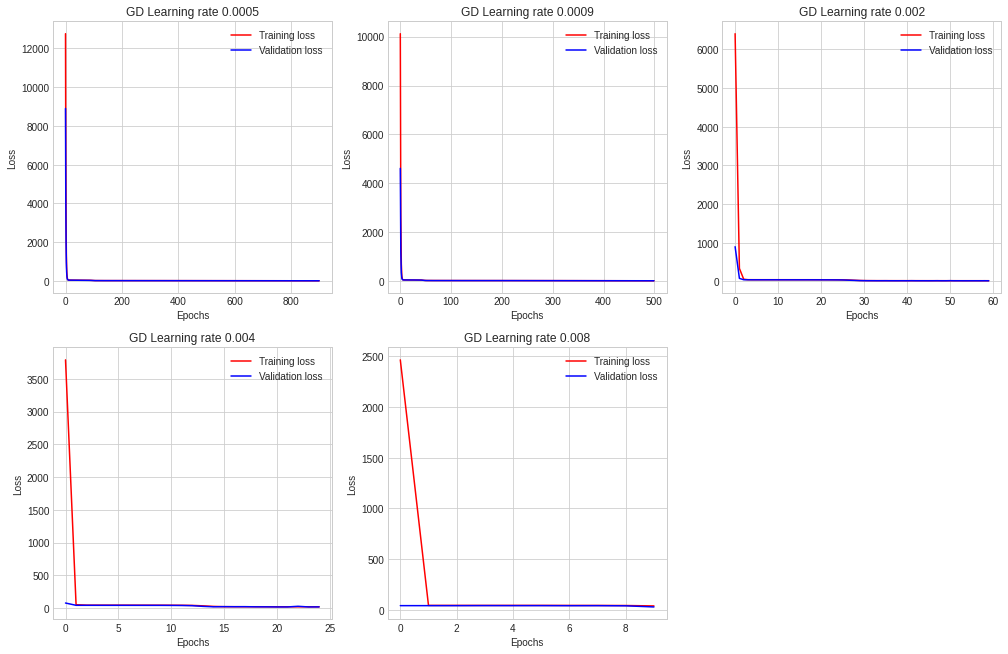

In [ ]:
plt.rcParams["figure.figsize"] = (17,11) #Размер поля

j=1
for (history, rate) in zip(histories, rates):
  plt.subplot(2, 3, j)
  plt.plot(history.epoch, history.history['loss'], 'r', label='Training loss')
  plt.plot(history.epoch, history.history['val_loss'], 'b', label='Validation loss')
  plt.title(f'GD Learning rate {rate}') 
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  j+=1
plt.show()

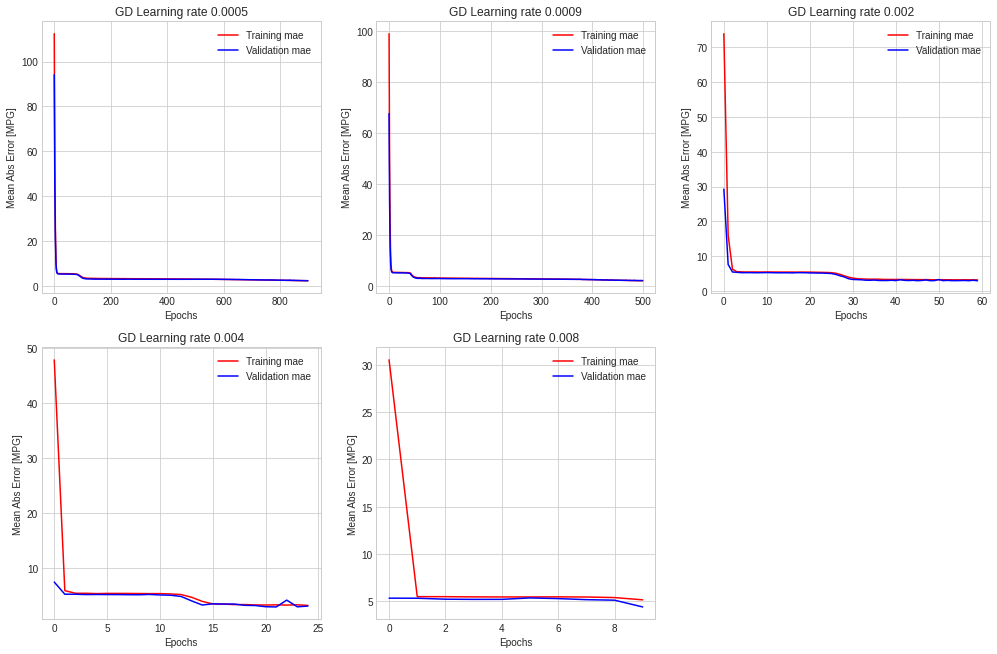

In [ ]:
plt.rcParams["figure.figsize"] = (17,11) #Размер поля

j=1
for (history, rate) in zip(histories, rates):
  plt.subplot(2, 3, j)
  plt.plot(history.epoch, history.history['mae'], 'r', label='Training mae')
  plt.plot(history.epoch, history.history['val_mae'], 'b', label='Validation mae')
  plt.title(f'GD Learning rate {rate}') 
  plt.xlabel('Epochs')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.legend()
  plt.grid(True)
  j+=1
plt.show()

In [ ]:
#########################################################################################################################################################

In [ ]:
for index, score in enumerate(zip(
    [model.evaluate(normed_train_data, train_y, verbose=0) for model in models], 
    [model.evaluate(normed_test_data, test_y, verbose=0) for model in models])):
    print(f'Error for model {index+1}\t | train: {round(score[0][1], 3)}\t| test: {round(score[1][1], 3)}')

Error for model 1	 | train: 2.26	| test: 2.499
Error for model 2	 | train: 2.144	| test: 2.383
Error for model 3	 | train: 3.075	| test: 3.216
Error for model 4	 | train: 3.344	| test: 3.275
Error for model 5	 | train: 4.529	| test: 4.455


In [ ]:
results = model.evaluate(normed_test_data, test_y)
results

143/143 [==============================] - 0s 35us/step


[29.240774328058418, 4.454560279846191]

In [ ]:
#########################################################################################################################################################

#### 4.3. Исследование методов GDM и NAG

In [ ]:
rate = 0.0009

In [ ]:
moments = [0.0, 0.2, 0.5, 0.9]
epochs = [1000, 600, 400, 200, 500, 400, 100, 50]

In [ ]:
models = []
for _ in range(len(moments) * 2):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)

In [ ]:
for index, momentum in enumerate(moments):
    models[2 * index].compile(
        loss='mse', optimizer=SGD(lr=rate, momentum=momentum, nesterov=False), metrics=['mae']
    )
    models[2 * index + 1].compile(
        loss='mse', optimizer=SGD(lr=rate, momentum=momentum, nesterov=True), metrics=['mae']
    )

In [ ]:
histories = [
    model.fit(
        normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=epoch, verbose=0
    ) for model, epoch in zip(models, epochs)
]

In [ ]:
from math import floor
from itertools import chain

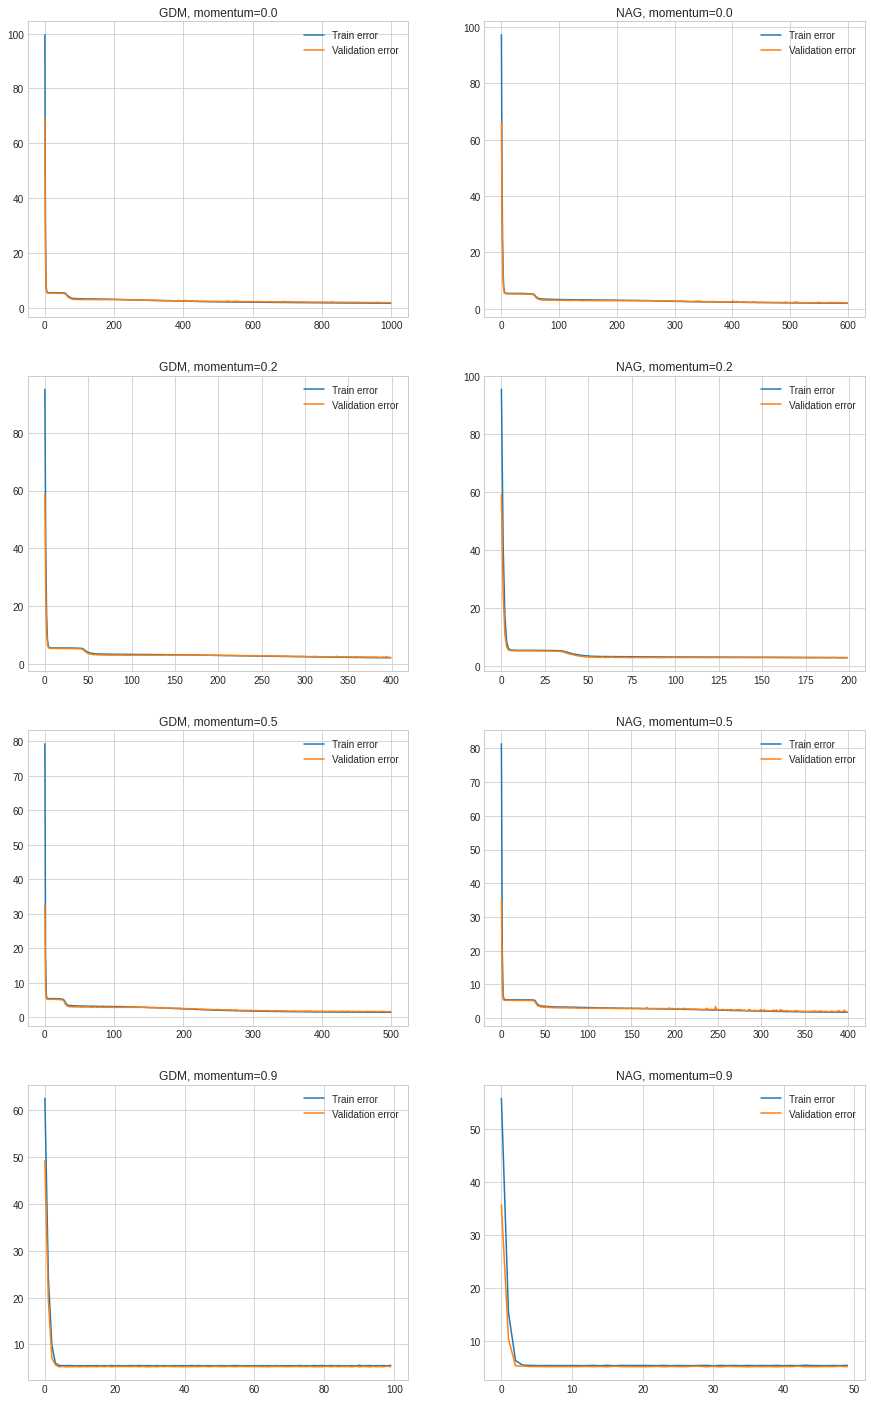

In [ ]:
_, ax = plt.subplots(4, 2, figsize=(15, 25))
axes = [axis for axis in chain(*ax)]

for index, (axis, history) in enumerate(zip(axes, histories)):
    axis.plot(history.history['mae'], label='Train error')
    axis.plot(history.history['val_mae'], label='Validation error')
    axis.set_title(f'{"NAG" if index % 2 else "GDM"}, momentum={moments[floor(index / 2)]}')
    axis.legend(loc='upper right')
    
plt.show()

In [ ]:
########################################################################################################################################################

In [ ]:
for index, score in enumerate(zip(
    [model.evaluate(normed_train_data, train_y, verbose=0) for model in models], 
    [model.evaluate(normed_test_data, test_y, verbose=0) for model in models])):
    print(f'Error for model {index+1}\t |\t train: {round(score[0][1], 3)}\t|\t test: {round(score[1][1], 3)}')

Error for model 1	 |	 train: 1.646	|	 test: 1.958
Error for model 2	 |	 train: 1.973	|	 test: 2.097
Error for model 3	 |	 train: 2.054	|	 test: 2.294
Error for model 4	 |	 train: 2.907	|	 test: 3.006
Error for model 5	 |	 train: 1.566	|	 test: 1.652
Error for model 6	 |	 train: 1.768	|	 test: 1.94
Error for model 7	 |	 train: 5.364	|	 test: 5.236
Error for model 8	 |	 train: 5.372	|	 test: 5.236


In [ ]:
#########################################################################################################################################################

#### 4.4. Исследование методов наискорейшего спуска и сопряжённых градиентов

In [ ]:
epochs = [500, 250, 50]
optimizer_names = ['SGD', 'Fletcher-Reeves', 'Polak-Ribiere']

In [ ]:
models = []
for _ in range(len(epochs)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)

In [ ]:
optimizers = [
    SGD(lr=0.0009),
    Adagrad(lr=0.1),
    RMSprop(lr=0.1, rho=0.9)
]

In [ ]:
for model, optimizer in zip(models, optimizers):
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [ ]:
histories = [
    model.fit(
        normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=epoch, verbose=0
    ) for model, epoch in zip(models, epochs)
]

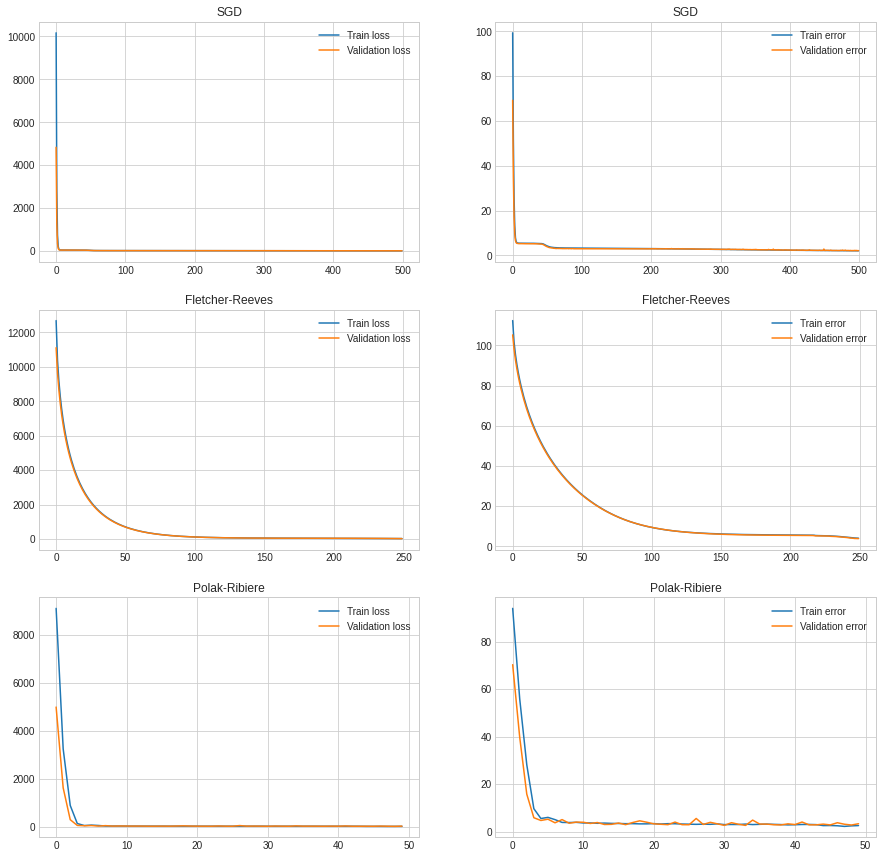

In [ ]:
_, ax = plt.subplots(len(models), 2, figsize=(15, 5 * len(models)))

for (ax_row, history, optimizer) in zip(ax, histories, optimizer_names):
    ax_row[0].plot(history.history['loss'], label='Train loss')
    ax_row[0].plot(history.history['val_loss'], label='Validation loss')
    ax_row[0].legend(loc='upper right')
    ax_row[1].plot(history.history['mae'], label='Train error')
    ax_row[1].plot(history.history['val_mae'], label='Validation error')
    ax_row[1].legend(loc='upper right')
    ax_row[0].set_title(f'{optimizer}')
    ax_row[1].set_title(f'{optimizer}')
    
plt.show()

In [ ]:
for index, score in enumerate(zip(
    [model.evaluate(normed_train_data, train_y, verbose=0) for model in models], 
    [model.evaluate(normed_test_data, test_y, verbose=0) for model in models])):
    print(f'Error for model {index+1}\t | train: {round(score[0][1], 3)}\t| test: {round(score[1][1], 3)}')

Error for model 1	 | train: 2.086	| test: 2.281
Error for model 2	 | train: 3.907	| test: 3.781
Error for model 3	 | train: 3.14	| test: 3.48


In [ ]:
###############################################################################################################

#### 4.5. Исследование метода AdaGrad

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=5, activation='sigmoid'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer=Adagrad(lr=0.1), metrics=['mae'])

In [ ]:
history = model.fit(
    normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=250, verbose=0
)
# При повторных вызовах точность увеличивается

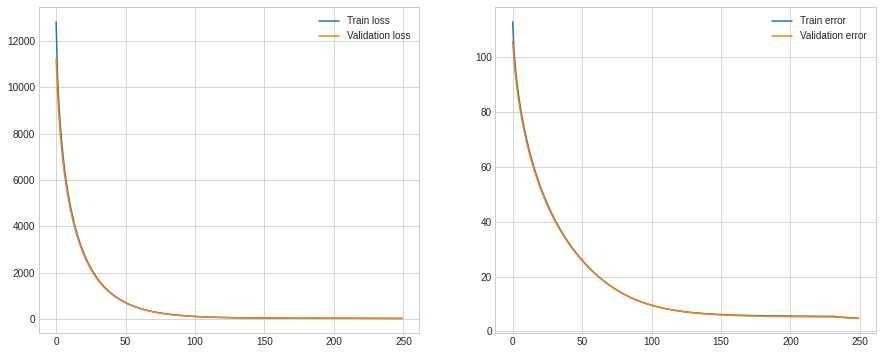

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(history.history['loss'], label='Train loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[1].plot(history.history['mae'], label='Train error')
ax[1].plot(history.history['val_mae'], label='Validation error')

ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
print(model.evaluate(normed_train_data, train_y, verbose=0)[1])

4.779003143310547


In [ ]:
print(model.evaluate(normed_test_data, test_y, verbose=0)[1])

4.81614351272583


In [ ]:
##############################################################################################################

In [ ]:
epochs = [10 * i for i in range(4, 16)]

In [ ]:
models = []
for _ in range(len(epochs)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)

In [ ]:
for model in models:
    model.compile(loss='mse', optimizer=Adagrad(lr=0.0005), metrics=['mae'])

In [ ]:
weights_1 = []
weights_2 = []

for model, epoch in zip(models, epochs):
    weights_history_1 = []
    weights_history_2 = []
    callback = LambdaCallback(
        on_batch_end=lambda batch, logs: (
            weights_history_1.append(model.layers[0].get_weights()[0]), 
            weights_history_2.append(model.layers[1].get_weights()[0]))
    )
    
    model.fit(
        normed_train_data, train_y, validation_split=.33, batch_size=50, callbacks=[callback,], epochs=epoch, verbose=1
    )
    
    weights_1.append(weights_history_1)
    weights_2.append(weights_history_2)

Train on 860 samples, validate on 424 samples
Epoch 1/40
860/860 [==============================] - 0s 131us/step - loss: 15809.3880 - mae: 125.5597 - val_loss: 15812.3725 - val_mae: 125.5810
Epoch 2/40
860/860 [==============================] - 0s 42us/step - loss: 15777.4606 - mae: 125.4324 - val_loss: 15788.8562 - val_mae: 125.4873
Epoch 3/40
860/860 [==============================] - 0s 43us/step - loss: 15756.7434 - mae: 125.3497 - val_loss: 15770.7177 - val_mae: 125.4149
Epoch 4/40
860/860 [==============================] - 0s 42us/step - loss: 15739.9963 - mae: 125.2829 - val_loss: 15755.4018 - val_mae: 125.3538
Epoch 5/40
860/860 [==============================] - 0s 41us/step - loss: 15725.5551 - mae: 125.2252 - val_loss: 15741.8892 - val_mae: 125.2999
Epoch 6/40
860/860 [==============================] - 0s 43us/step - loss: 15712.6530 - mae: 125.1735 - val_loss: 15729.6707 - val_mae: 125.2511
Epoch 7/40
860/860 [==============================] - 0s 42us/step - loss: 15700.89

In [ ]:
def get_rates(weights):
    rates = []
    for weight in weights:
        # Веса для одной модели - weight
        dim_x, dim_y = len(weight[0]), len(weight[0][0])
        first_step = weight[0]
        second_step = weight[1]
        rates.append([i for i in chain(*(second_step-first_step))])
    return rates

def get_average_rate(weights):
    rates = get_rates(weights)
    return [np.mean(weight) for weight in weights]

def get_max_rate(weights):
    rates = get_rates(weights)
    return [np.max(weight) for weight in weights]

def get_min_rate(weights):
    rates = get_rates(weights)
    return [np.min(weight) for weight in weights]

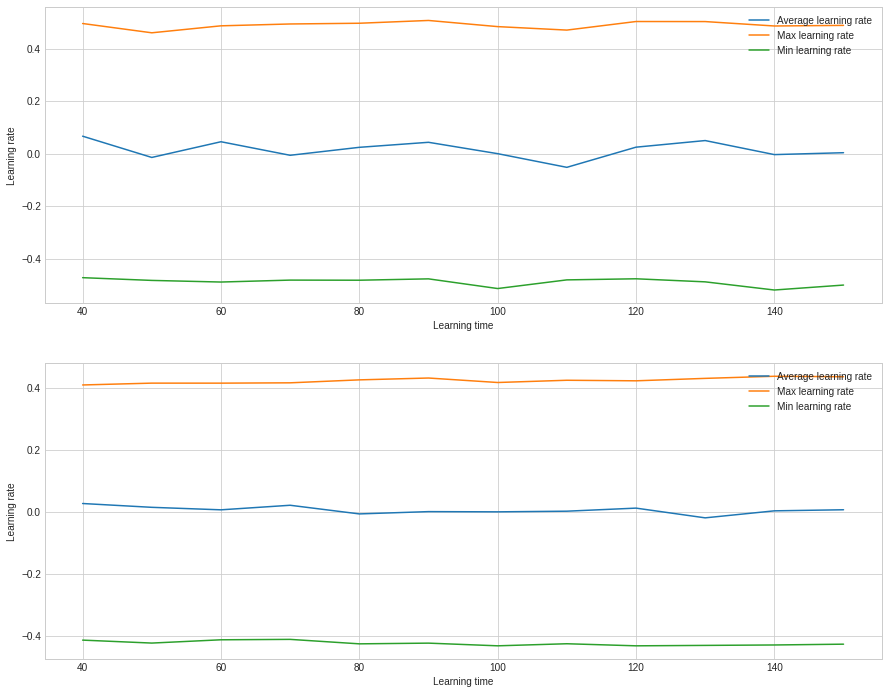

In [ ]:
_, ax = plt.subplots(2, 1, figsize=(15, 12))
for axis, w in zip(ax, (weights_1, weights_2)):
    axis.plot(epochs, get_average_rate(w), label='Average learning rate')
    axis.plot(epochs, get_max_rate(w), label='Max learning rate')
    axis.plot(epochs, get_min_rate(w), label='Min learning rate')
    axis.set_xlabel('Learning time')
    axis.set_ylabel('Learning rate')
    axis.legend()
plt.show()

#### 4.6. Исследование методов RMSProp и AdaDelta

In [ ]:

rhos = [0.1, 0.3, 0.6, 0.9]
epochs = [25, 325, 50, 400, 30, 500, 35, 700]# for lr=0.1
#rhos = [0.1, 0.3, 0.6, 0.9]
#epochs = [750, 43000, 800, 43000, 750, 43000, 800, 43000] # for lr=0.0005

In [ ]:
models = []
for _ in range(len(moments) * 2):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)

In [ ]:
for index, rho in enumerate(rhos):
    models[2 * index].compile(
        loss='mse', optimizer=RMSprop(lr=0.1, rho=rho), metrics=['mae']
    )
    models[2 * index + 1].compile(
        loss='mse', optimizer=Adadelta(lr=0.1, rho=rho), metrics=['mae']
    )

In [ ]:
histories = [
    model.fit(
        normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=epoch, verbose=0
    ) for model, epoch in zip(models, epochs)
]

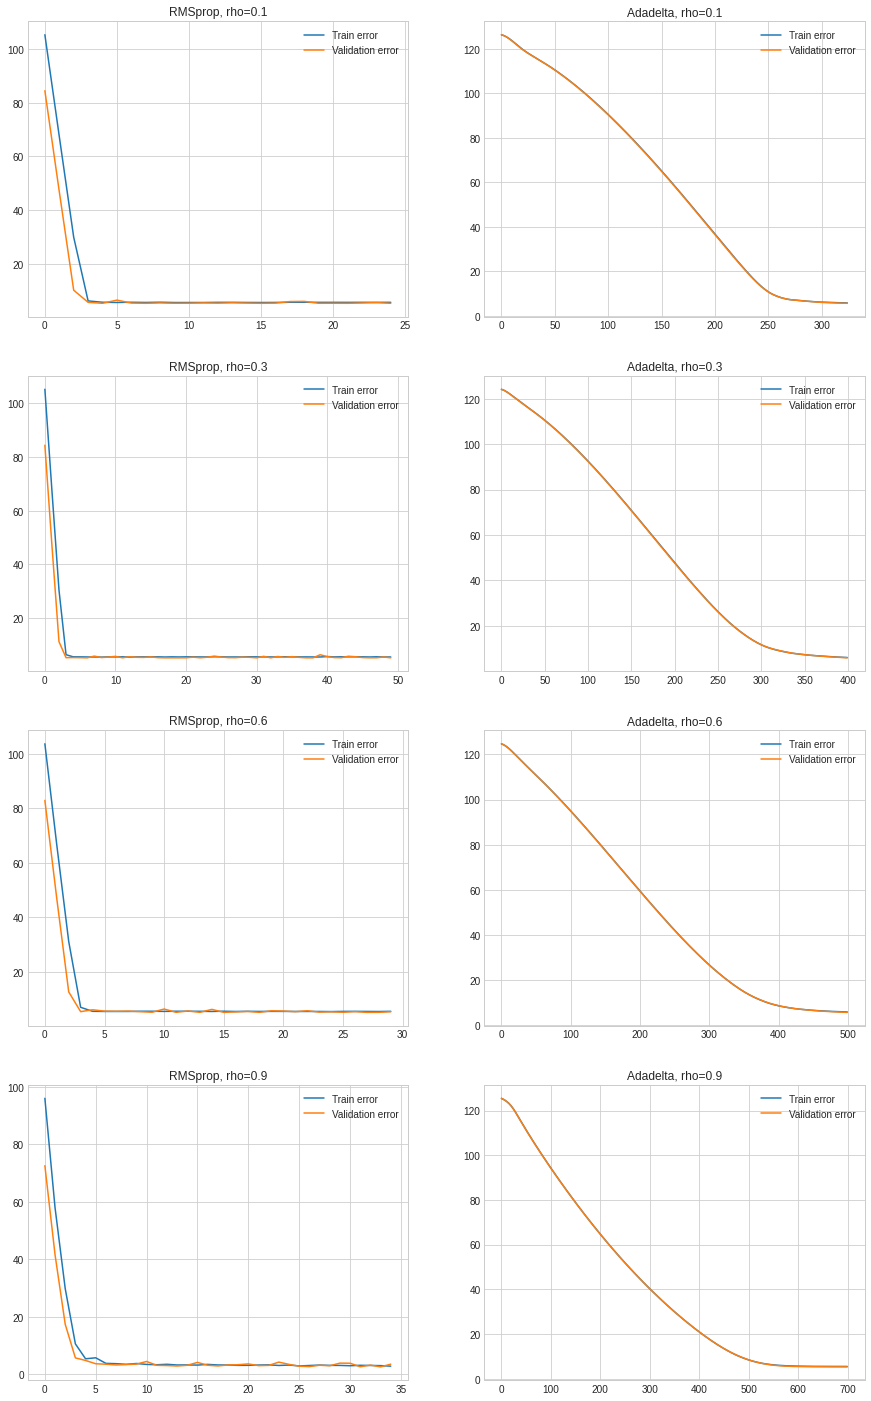

In [ ]:
_, ax = plt.subplots(4, 2, figsize=(15, 25))
axes = [axis for axis in chain(*ax)]

for index, (axis, history) in enumerate(zip(axes, histories)):
    axis.plot(history.history['mae'], label='Train error')
    axis.plot(history.history['val_mae'], label='Validation error')
    axis.set_title(f'{"Adadelta" if index % 2 else "RMSprop"}, rho={rhos[floor(index / 2)]}')
    axis.legend()
    
plt.show()

In [ ]:
##########################################################################################################################

In [ ]:
for index, score in enumerate(zip(
    [model.evaluate(normed_train_data, train_y, verbose=0) for model in models], 
    [model.evaluate(normed_test_data, test_y, verbose=0) for model in models])):
    print(f'Accuracy for model {index+1}\t |\t train: {round(score[0][1], 3)}\t|\t test: {round(score[1][1], 3)}')

Accuracy for model 1	 |	 train: 5.37	|	 test: 5.328
Accuracy for model 2	 |	 train: 5.818	|	 test: 5.549
Accuracy for model 3	 |	 train: 5.379	|	 test: 5.35
Accuracy for model 4	 |	 train: 6.071	|	 test: 5.735
Accuracy for model 5	 |	 train: 5.616	|	 test: 5.757
Accuracy for model 6	 |	 train: 5.798	|	 test: 5.533
Accuracy for model 7	 |	 train: 3.497	|	 test: 3.342
Accuracy for model 8	 |	 train: 5.399	|	 test: 5.242


In [ ]:
##################################################################################################################

In [ ]:
#Изменить rho и выполнить для всех rho

In [ ]:
epochs = [10 * i for i in range(4, 16)]

In [ ]:
models = []
for _ in range(len(epochs)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)

In [ ]:
for model in models:
    model.compile(loss='mse', optimizer=RMSprop(lr=0.1, rho=0.6), metrics=['mae'])

In [ ]:
weights_1 = []
weights_2 = []

for model, epoch in zip(models, epochs):
    weights_history_1 = []
    weights_history_2 = []
    callback = LambdaCallback(
        on_batch_end=lambda batch, logs: (
            weights_history_1.append(model.layers[0].get_weights()[0]), 
            weights_history_2.append(model.layers[1].get_weights()[0]))
    )
    
    model.fit(
        normed_train_data, train_y, validation_split=.33, batch_size=50, callbacks=[callback,], epochs=epoch, verbose=1
    )
    
    weights_1.append(weights_history_1)
    weights_2.append(weights_history_2)

Train on 860 samples, validate on 424 samples
Epoch 1/40
860/860 [==============================] - 0s 146us/step - loss: 10744.7379 - mae: 102.8437 - val_loss: 6774.0535 - val_mae: 82.0506
Epoch 2/40
860/860 [==============================] - 0s 45us/step - loss: 4449.0257 - mae: 65.6591 - val_loss: 2166.6327 - val_mae: 46.0964
Epoch 3/40
860/860 [==============================] - 0s 45us/step - loss: 1051.1716 - mae: 30.3482 - val_loss: 190.4779 - val_mae: 12.4291
Epoch 4/40
860/860 [==============================] - 0s 48us/step - loss: 71.6549 - mae: 6.8405 - val_loss: 43.0899 - val_mae: 5.4178
Epoch 5/40
860/860 [==============================] - 0s 47us/step - loss: 45.6097 - mae: 5.5497 - val_loss: 45.6706 - val_mae: 5.6086
Epoch 6/40
860/860 [==============================] - 0s 46us/step - loss: 45.8042 - mae: 5.5231 - val_loss: 44.7879 - val_mae: 5.5449
Epoch 7/40
860/860 [==============================] - 0s 45us/step - loss: 46.4427 - mae: 5.6118 - val_loss: 47.8225 - val_m

In [ ]:
def get_rates(weights):
    rates = []
    for weight in weights:
        # Веса для одной модели - weight
        dim_x, dim_y = len(weight[0]), len(weight[0][0])
        first_step = weight[0]
        second_step = weight[1]
        rates.append([i for i in chain(*(second_step-first_step))])
    return rates

def get_average_rate(weights):
    rates = get_rates(weights)
    return [np.mean(weight) for weight in weights]

def get_max_rate(weights):
    rates = get_rates(weights)
    return [np.max(weight) for weight in weights]

def get_min_rate(weights):
    rates = get_rates(weights)
    return [np.min(weight) for weight in weights]

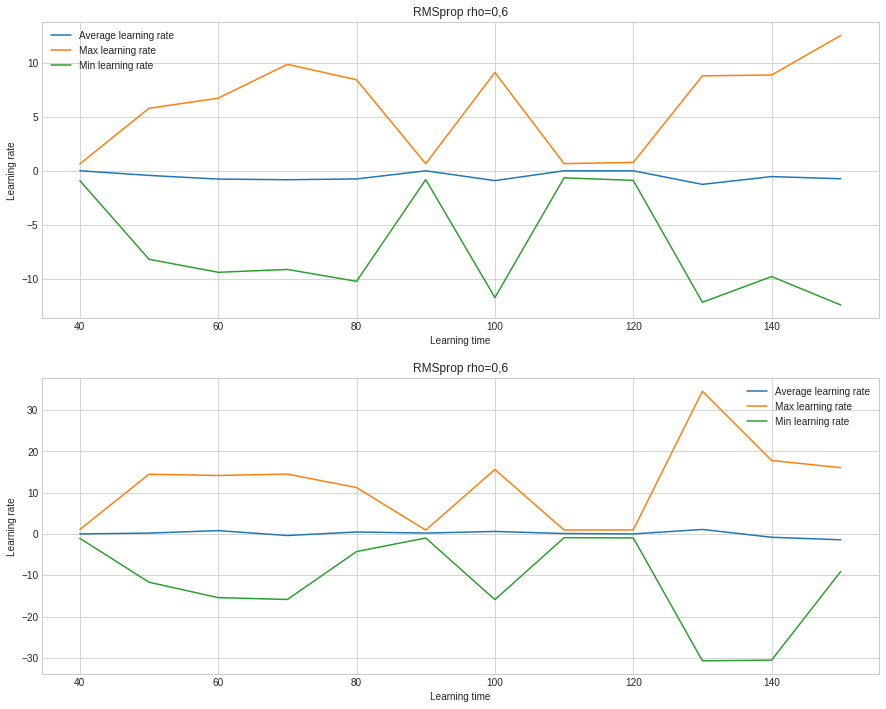

In [ ]:
_, ax = plt.subplots(2, 1, figsize=(15, 12))
for axis, w in zip(ax, (weights_1, weights_2)):
    axis.plot(epochs, get_average_rate(w), label='Average learning rate')
    axis.plot(epochs, get_max_rate(w), label='Max learning rate')
    axis.plot(epochs, get_min_rate(w), label='Min learning rate')
    axis.set_xlabel('Learning time')
    axis.set_ylabel('Learning rate')
    axis.set_title('RMSprop rho=0,6')
    axis.legend()
plt.show()

In [ ]:
#####################################################################################################################

In [ ]:
epochs = [10 * i for i in range(4, 16)]

In [ ]:
models = []
for _ in range(len(epochs)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)

In [ ]:
for model in models:
    model.compile(loss='mse', optimizer=Adadelta(lr=0.1, rho=0.6), metrics=['mae'])

In [ ]:
weights_1 = []
weights_2 = []

for model, epoch in zip(models, epochs):
    weights_history_1 = []
    weights_history_2 = []
    callback = LambdaCallback(
        on_batch_end=lambda batch, logs: (
            weights_history_1.append(model.layers[0].get_weights()[0]), 
            weights_history_2.append(model.layers[1].get_weights()[0]))
    )
    
    model.fit(
        normed_train_data, train_y, validation_split=.33, batch_size=50, callbacks=[callback,], epochs=epoch, verbose=1
    )
    
    weights_1.append(weights_history_1)
    weights_2.append(weights_history_2)

Train on 860 samples, validate on 424 samples
Epoch 1/40
860/860 [==============================] - 0s 164us/step - loss: 15877.7994 - mae: 125.8316 - val_loss: 15887.7422 - val_mae: 125.8801
Epoch 2/40
860/860 [==============================] - 0s 51us/step - loss: 15852.0772 - mae: 125.7295 - val_loss: 15856.8862 - val_mae: 125.7576
Epoch 3/40
860/860 [==============================] - 0s 60us/step - loss: 15817.6811 - mae: 125.5929 - val_loss: 15818.5648 - val_mae: 125.6053
Epoch 4/40
860/860 [==============================] - 0s 57us/step - loss: 15776.4020 - mae: 125.4283 - val_loss: 15773.8452 - val_mae: 125.4273
Epoch 5/40
860/860 [==============================] - 0s 55us/step - loss: 15729.1120 - mae: 125.2396 - val_loss: 15723.6850 - val_mae: 125.2273
Epoch 6/40
860/860 [==============================] - 0s 54us/step - loss: 15676.5026 - mae: 125.0299 - val_loss: 15668.3819 - val_mae: 125.0065
Epoch 7/40
860/860 [==============================] - 0s 50us/step - loss: 15619.04

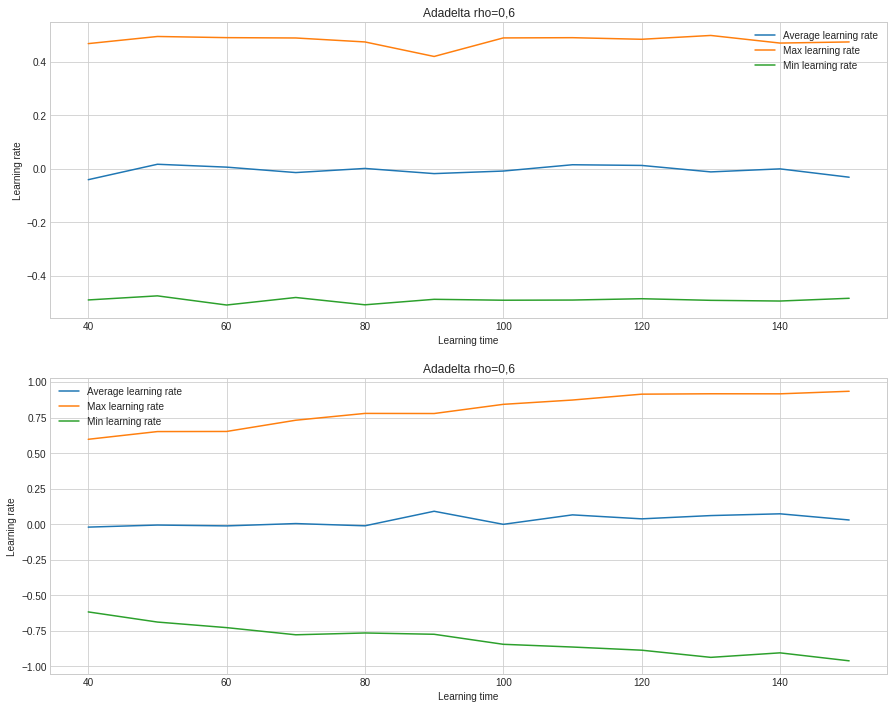

In [ ]:
_, ax = plt.subplots(2, 1, figsize=(15, 12))
for axis, w in zip(ax, (weights_1, weights_2)):
    axis.plot(epochs, get_average_rate(w), label='Average learning rate')
    axis.plot(epochs, get_max_rate(w), label='Max learning rate')
    axis.plot(epochs, get_min_rate(w), label='Min learning rate')
    axis.set_xlabel('Learning time')
    axis.set_ylabel('Learning rate')
    axis.set_title('Adadelta rho=0,6')
    axis.legend()
plt.show()

#### 4.7. Исследование метода Adam

In [ ]:
beta_pairs = [
    (0.1, 0.1), (0.3, 0.9), (0.6, 0.9), 
    (0.9, 0.3), (0.9, 0.6), (0.9, 0.9),
]
epochs = [400, 400, 400, 400, 400, 400]

In [ ]:
models = []
for _ in range(len(beta_pairs)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)

In [ ]:
for model, betas in zip(models, beta_pairs):
    model.compile(
        loss='mse', optimizer=Adam(learning_rate=0.0009, beta_1=betas[0], beta_2=betas[1]), metrics=['mae']
    )

In [ ]:
histories = [
    model.fit(
        normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=epoch, verbose=0
    ) for model, epoch in zip(models, epochs)
]

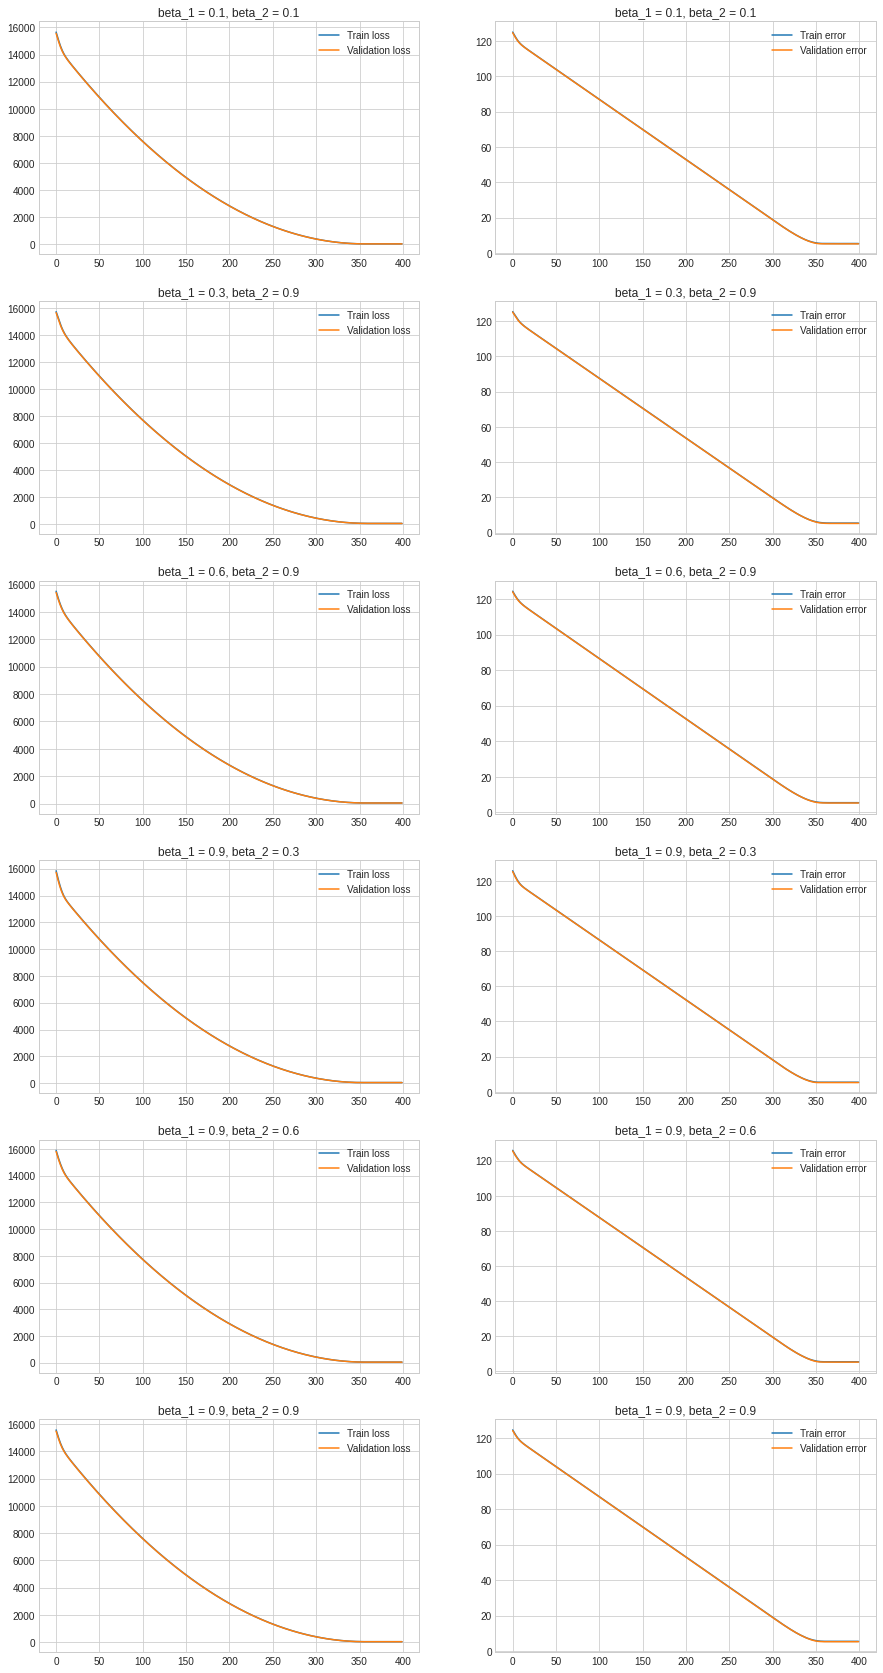

In [ ]:
_, ax = plt.subplots(len(models), 2, figsize=(15, 5 * len(models)))

for (ax_row, history, betas) in zip(ax, histories, beta_pairs):
    ax_row[0].plot(history.history['loss'], label='Train loss')
    ax_row[0].plot(history.history['val_loss'], label='Validation loss')
    ax_row[0].legend(loc='upper right')
    ax_row[1].plot(history.history['mae'], label='Train error')
    ax_row[1].plot(history.history['val_mae'], label='Validation error')
    ax_row[1].legend(loc='upper right')
    ax_row[0].set_title(f'beta_1 = {betas[0]}, beta_2 = {betas[1]}')
    ax_row[1].set_title(f'beta_1 = {betas[0]}, beta_2 = {betas[1]}')
    
plt.show()

In [ ]:
################################################################################################################################

In [ ]:
for index, score in enumerate(zip(
    [model.evaluate(normed_train_data, train_y, verbose=0) for model in models], 
    [model.evaluate(normed_test_data, test_y, verbose=0) for model in models])):
    print(f'Error for model {index+1}\t | train: {round(score[0][1], 3)}\t| test: {round(score[1][1], 3)}')

Error for model 1	 | train: 5.389	| test: 5.24
Error for model 2	 | train: 5.388	| test: 5.24
Error for model 3	 | train: 5.394	| test: 5.241
Error for model 4	 | train: 5.389	| test: 5.24
Error for model 5	 | train: 5.395	| test: 5.242
Error for model 6	 | train: 5.392	| test: 5.241


In [ ]:
################################################################################################################################

In [ ]:
epochs = [10 * i for i in range(4, 16)]
models = []
for _ in range(len(epochs)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)
for model in models:
    model.compile(
        loss='mse', optimizer=Adam(learning_rate=0.0009, beta_1=.3, beta_2=.9), metrics=['mae']
    )

weights_1 = []
weights_2 = []

for model, epoch in zip(models, epochs):
    weights_history_1 = []
    weights_history_2 = []
    callback = LambdaCallback(
        on_batch_end=lambda batch, logs: (
            weights_history_1.append(model.layers[0].get_weights()[0]), 
            weights_history_2.append(model.layers[1].get_weights()[0]))
    )
    
    model.fit(
        normed_train_data, train_y, validation_split=.33, batch_size=50, callbacks=[callback,], epochs=epoch, verbose=1
    )
    
    weights_1.append(weights_history_1)
    weights_2.append(weights_history_2)

Train on 860 samples, validate on 424 samples
Epoch 1/40
860/860 [==============================] - 0s 186us/step - loss: 15664.4374 - mae: 124.9792 - val_loss: 15552.8973 - val_mae: 124.5427
Epoch 2/40
860/860 [==============================] - 0s 48us/step - loss: 15423.2099 - mae: 124.0110 - val_loss: 15311.0332 - val_mae: 123.5689
Epoch 3/40
860/860 [==============================] - 0s 47us/step - loss: 15182.5042 - mae: 123.0377 - val_loss: 15071.5495 - val_mae: 122.5971
Epoch 4/40
860/860 [==============================] - 0s 48us/step - loss: 14947.7828 - mae: 122.0809 - val_loss: 14843.6236 - val_mae: 121.6648
Epoch 5/40
860/860 [==============================] - 0s 47us/step - loss: 14727.0690 - mae: 121.1745 - val_loss: 14632.2004 - val_mae: 120.7935
Epoch 6/40
860/860 [==============================] - 0s 55us/step - loss: 14522.8107 - mae: 120.3299 - val_loss: 14437.1512 - val_mae: 119.9838
Epoch 7/40
860/860 [==============================] - 0s 44us/step - loss: 14335.93

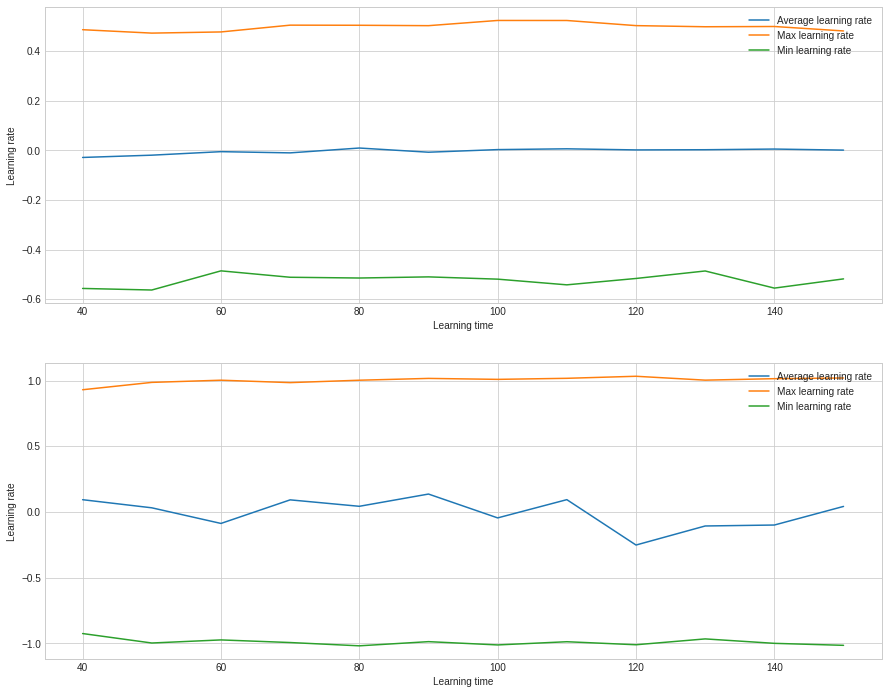

In [ ]:
_, ax = plt.subplots(2, 1, figsize=(15, 12))
for axis, w in zip(ax, (weights_1, weights_2)):
    axis.plot(epochs, get_average_rate(w), label='Average learning rate')
    axis.plot(epochs, get_max_rate(w), label='Max learning rate')
    axis.plot(epochs, get_min_rate(w), label='Min learning rate')
    axis.set_xlabel('Learning time')
    axis.set_ylabel('Learning rate')
    axis.legend()
plt.show()

#### 4.8. Исследование метода RProp

##### Rprop

In [ ]:
class RProp(Optimizer):
    def __init__(self, init_alpha=1e-3, scale_up=1.2, scale_down=0.5, min_alpha=1e-6, max_alpha=50., **kwargs):
        super(RProp, self).__init__(**kwargs)
        self.init_alpha = K.variable(init_alpha, name='init_alpha')
        self.scale_up = K.variable(scale_up, name='scale_up')
        self.scale_down = K.variable(scale_down, name='scale_down')
        self.min_alpha = K.variable(min_alpha, name='min_alpha')
        self.max_alpha = K.variable(max_alpha, name='max_alpha')

    def get_updates(self, params, constraints, loss):
        grads = self.get_gradients(loss, params)
        shapes = [K.get_variable_shape(p) for p in params]
        alphas = [K.variable(numpy.ones(shape) * self.init_alpha) for shape in shapes]
        old_grads = [K.zeros(shape) for shape in shapes]
        self.weights = alphas + old_grads
        self.updates = []

        for param, grad, old_grad, alpha in zip(params, grads, old_grads, alphas):
            new_alpha = K.switch(
                K.greater(grad * old_grad, 0),
                K.minimum(alpha * self.scale_up, self.max_alpha),
                K.maximum(alpha * self.scale_down, self.min_alpha)
            )
            new_param = param - K.sign(grad) * new_alpha
            # Apply constraints
            if param in constraints:
                c = constraints[param]
                new_param = c(new_param)
            self.updates.append(K.update(param, new_param))
            self.updates.append(K.update(alpha, new_alpha))
            self.updates.append(K.update(old_grad, grad))

        return self.updates

    def get_config(self):
        config = {
            'init_alpha': float(K.get_value(self.init_alpha)),
            'scale_up': float(K.get_value(self.scale_up)),
            'scale_down': float(K.get_value(self.scale_down)),
            'min_alpha': float(K.get_value(self.min_alpha)),
            'max_alpha': float(K.get_value(self.max_alpha)),
        }
        base_config = super(RProp, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=5, activation='sigmoid'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer=Rprop(), metrics=['mae'])

TypeError: ignored

In [ ]:
history = model.fit(normed_train_data, train_y, validation_split=.33, epochs=300, verbose=0)

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(history.history['loss'], label='Train loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[1].plot(history.history['mae']), label='Train error')
ax[1].plot(history.history['val_mae']), label='Validation error')

ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
#############################################################################################################################

In [ ]:
print(1 - model.evaluate(normed_train_data, train_y, verbose=0)[1])

In [ ]:
print(1 - model.evaluate(normed_test_data, test_y, verbose=0)[1])

In [ ]:
#############################################################################################################################

In [ ]:
epochs = [10 * i for i in range(4, 16)]
models = []
for _ in range(len(epochs)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)
for model in models:
    model.compile(
        loss='mse', optimizer=Rprop(), metrics=['mae']
    )

weights_1 = []
weights_2 = []

for model, epoch in zip(models, epochs):
    weights_history_1 = []
    weights_history_2 = []
    callback = LambdaCallback(
        on_batch_end=lambda batch, logs: (
            weights_history_1.append(model.layers[0].get_weights()[0]), 
            weights_history_2.append(model.layers[1].get_weights()[0]))
    )
    
    model.fit(
        normed_train_data, train_t, validation_split=.33, batch_size=50, callbacks=[callback,], epochs=epoch, verbose=1
    )
    
    weights_1.append(weights_history_1)
    weights_2.append(weights_history_2)

In [ ]:
_, ax = plt.subplots(2, 1, figsize=(15, 12))
for axis, w in zip(ax, (weights_1, weights_2)):
    axis.plot(epochs, get_average_rate(w), label='Average learning rate')
    axis.plot(epochs, get_max_rate(w), label='Max learning rate')
    axis.plot(epochs, get_min_rate(w), label='Min learning rate')
    axis.set_xlabel('Learning time')
    axis.set_ylabel('Learning rate')
    axis.legend()
plt.show()

##### Исследование

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=5, activation='sigmoid'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer=RMSprop(learning_rate=0.0009), metrics=['mae'])

In [ ]:
history = model.fit(normed_train_data, train_y, validation_split=.33, epochs=300, verbose=0)

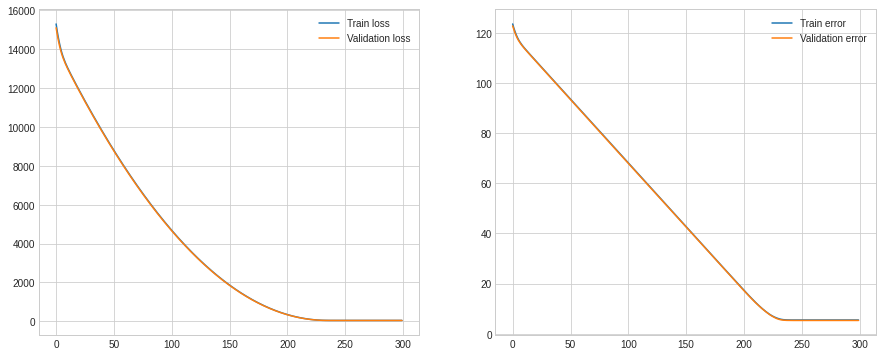

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(history.history['loss'], label='Train loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[1].plot(history.history['mae'], label='Train error')
ax[1].plot(history.history['val_mae'], label='Validation error')

ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
#############################################################################################################################

In [ ]:
print(model.evaluate(normed_train_data, train_y, verbose=0)[1])

5.3897600173950195


In [ ]:
print(model.evaluate(normed_test_data, test_y, verbose=0)[1])

5.24041748046875


In [ ]:
#############################################################################################################################

In [ ]:
epochs = [10 * i for i in range(4, 16)]
models = []
for _ in range(len(epochs)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)
for model in models:
    model.compile(
        loss='mse', optimizer=RMSprop(learning_rate=0.0009), metrics=['mae']
    )

weights_1 = []
weights_2 = []

for model, epoch in zip(models, epochs):
    weights_history_1 = []
    weights_history_2 = []
    callback = LambdaCallback(
        on_batch_end=lambda batch, logs: (
            weights_history_1.append(model.layers[0].get_weights()[0]), 
            weights_history_2.append(model.layers[1].get_weights()[0]))
    )
    
    model.fit(
        normed_train_data, train_y, validation_split=.33, batch_size=50, callbacks=[callback,], epochs=epoch, verbose=1
    )
    
    weights_1.append(weights_history_1)
    weights_2.append(weights_history_2)

Train on 860 samples, validate on 424 samples
Epoch 1/40
860/860 [==============================] - 0s 151us/step - loss: 15519.1968 - mae: 124.3996 - val_loss: 15379.5361 - val_mae: 123.8474
Epoch 2/40
860/860 [==============================] - 0s 58us/step - loss: 15245.3303 - mae: 123.2949 - val_loss: 15137.3368 - val_mae: 122.8655
Epoch 3/40
860/860 [==============================] - 0s 48us/step - loss: 15012.3714 - mae: 122.3453 - val_loss: 14914.8958 - val_mae: 121.9566
Epoch 4/40
860/860 [==============================] - 0s 46us/step - loss: 14796.0588 - mae: 121.4589 - val_loss: 14706.0205 - val_mae: 121.0969
Epoch 5/40
860/860 [==============================] - 0s 46us/step - loss: 14593.6244 - mae: 120.6219 - val_loss: 14511.8842 - val_mae: 120.2925
Epoch 6/40
860/860 [==============================] - 0s 49us/step - loss: 14406.3313 - mae: 119.8429 - val_loss: 14333.0285 - val_mae: 119.5465
Epoch 7/40
860/860 [==============================] - 0s 46us/step - loss: 14234.57

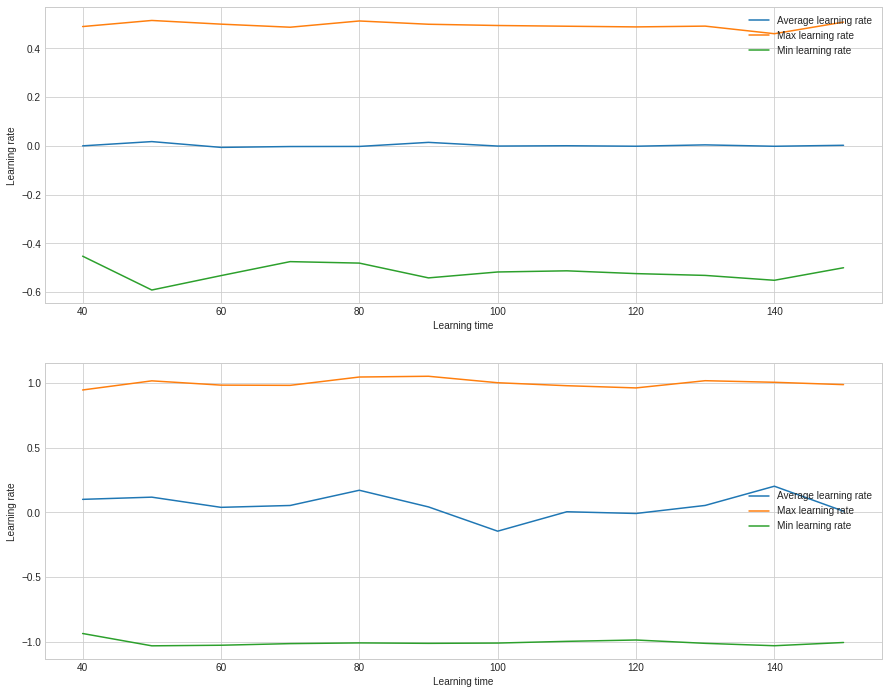

In [ ]:
_, ax = plt.subplots(2, 1, figsize=(15, 12))
for axis, w in zip(ax, (weights_1, weights_2)):
    axis.plot(epochs, get_average_rate(w), label='Average learning rate')
    axis.plot(epochs, get_max_rate(w), label='Max learning rate')
    axis.plot(epochs, get_min_rate(w), label='Min learning rate')
    axis.set_xlabel('Learning time')
    axis.set_ylabel('Learning rate')
    axis.legend()
plt.show()

#### 4.9. Исследование методов Левенберга-Маркардта и BFGS

In [ ]:
#Посмотреть в других библиотеках
lm = Sequential()
lm.add(Dense(20, input_dim=5, activation='sigmoid'))
lm.add(Dense(20, activation='tanh'))
lm.add(Dense(1, activation='linear'))
lm.compile(loss='mse', optimizer=RMSprop(lr=0.1), metrics=['mae'])
lmh = lm.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=60, verbose=1)

bfgs = Sequential()
bfgs.add(Dense(20, input_dim=5, activation='sigmoid'))
bfgs.add(Dense(20, activation='tanh'))
bfgs.add(Dense(1, activation='linear'))
bfgs.compile(loss='mse', optimizer=RMSprop(lr=0.2), metrics=['mae'])
bfgsh = bfgs.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=100, verbose=1)

Train on 860 samples, validate on 424 samples
Epoch 1/60
860/860 [==============================] - 0s 113us/step - loss: 9303.6291 - mae: 95.0227 - val_loss: 5150.8081 - val_mae: 71.4776
Epoch 2/60
860/860 [==============================] - 0s 33us/step - loss: 3358.5739 - mae: 56.8972 - val_loss: 1701.4510 - val_mae: 40.7394
Epoch 3/60
860/860 [==============================] - 0s 40us/step - loss: 934.6726 - mae: 29.0291 - val_loss: 314.0779 - val_mae: 16.5267
Epoch 4/60
860/860 [==============================] - 0s 36us/step - loss: 140.4651 - mae: 10.1381 - val_loss: 47.9219 - val_mae: 5.7674
Epoch 5/60
860/860 [==============================] - 0s 38us/step - loss: 44.5263 - mae: 5.4851 - val_loss: 40.2189 - val_mae: 5.1790
Epoch 6/60
860/860 [==============================] - 0s 35us/step - loss: 45.2499 - mae: 5.2409 - val_loss: 27.7800 - val_mae: 4.1708
Epoch 7/60
860/860 [==============================] - 0s 33us/step - loss: 29.4981 - mae: 4.2517 - val_loss: 19.3659 - val_ma

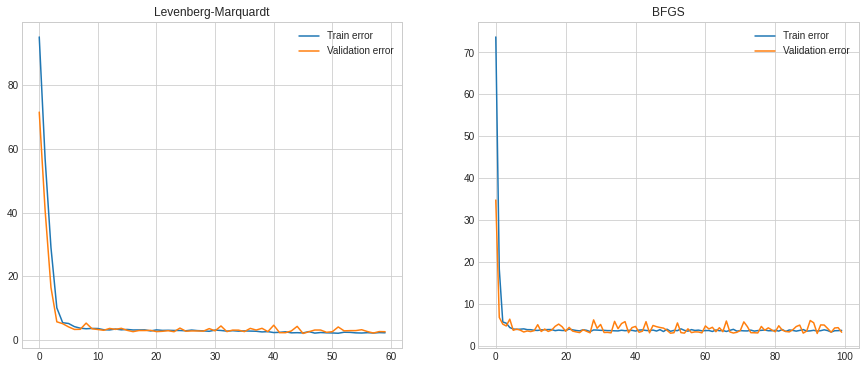

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(lmh.history['mae'], label='Train error')
ax[0].plot(lmh.history['val_mae'], label='Validation error')
ax[0].set_title('Levenberg-Marquardt')
ax[0].legend()
ax[1].plot(bfgsh.history['mae'], label='Train error')
ax[1].plot(bfgsh.history['val_mae'], label='Validation error')
ax[1].set_title('BFGS')
ax[1].legend()

plt.show()

In [ ]:
##########################################################################################################################

In [ ]:
print(lm.evaluate(normed_train_data, train_y, verbose=0)[1])
print(lm.evaluate(normed_test_data, test_y, verbose=0)[1])

2.5481276512145996
2.690983295440674


In [ ]:
print(bfgs.evaluate(normed_train_data, train_y, verbose=0)[1])
print(bfgs.evaluate(normed_test_data, test_y, verbose=0)[1])

3.301854372024536
3.0430359840393066


In [ ]:
###########################################################################################################################

#### 4.10. Исследование метода стохастического градиента

In [ ]:
len(normed_train_data)

1284

In [ ]:
#Изменить
batches = [1, 20, 100, 1284]
epochs = [20, 55, 275, 250]

In [ ]:
models = []
for _ in range(len(batches)):
    seed(42)
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    models.append(model)

In [ ]:
for model in models:
    model.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

In [ ]:
histories = [
    model.fit(
        normed_train_data, train_y, validation_split=.33, batch_size=batch_size, epochs=epoch, verbose=0
    ) for (model, batch_size, epoch) in zip(models, batches, epochs)
]

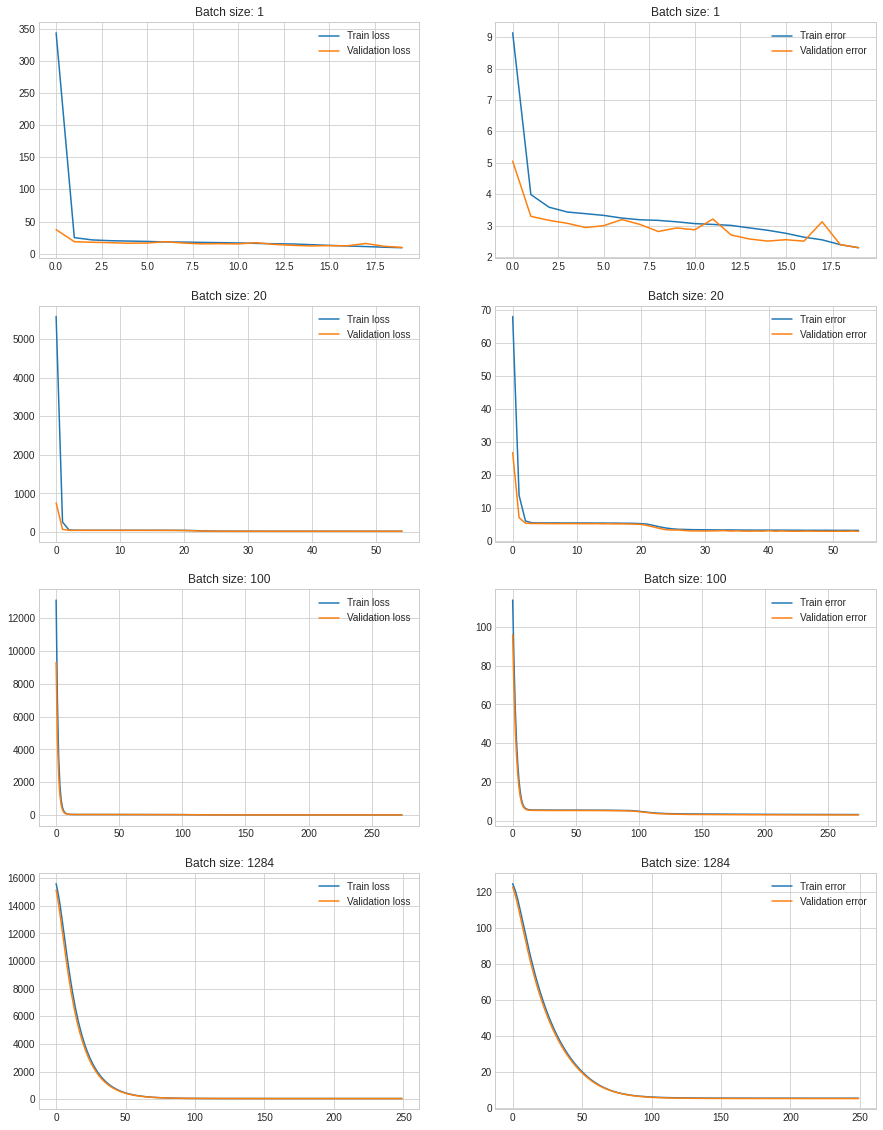

In [ ]:
_, ax = plt.subplots(len(models), 2, figsize=(15, 5 * len(models)))

for (ax_row, history, batch_size) in zip(ax, histories, batches):
    ax_row[0].plot(history.history['loss'], label='Train loss')
    ax_row[0].plot(history.history['val_loss'], label='Validation loss')
    ax_row[0].legend(loc='upper right')
    ax_row[1].plot(history.history['mae'], label='Train error')
    ax_row[1].plot(history.history['val_mae'], label='Validation error')
    ax_row[1].legend(loc='upper right')
    ax_row[0].set_title(f'Batch size: {batch_size}')
    ax_row[1].set_title(f'Batch size: {batch_size}')
    
plt.show()

In [ ]:
for index, score in enumerate(zip(
    [model.evaluate(normed_train_data, train_y, verbose=0) for model in models], 
    [model.evaluate(normed_test_data, test_y, verbose=0) for model in models])):
    print(f'Error for model {index+1}\t |\t train: {round(score[0][1], 3)}\t|\t test: {round(score[1][1], 3)}')

Error for model 1	 |	 train: 2.204	|	 test: 2.297
Error for model 2	 |	 train: 3.082	|	 test: 3.193
Error for model 3	 |	 train: 3.089	|	 test: 3.247
Error for model 4	 |	 train: 5.366	|	 test: 5.216


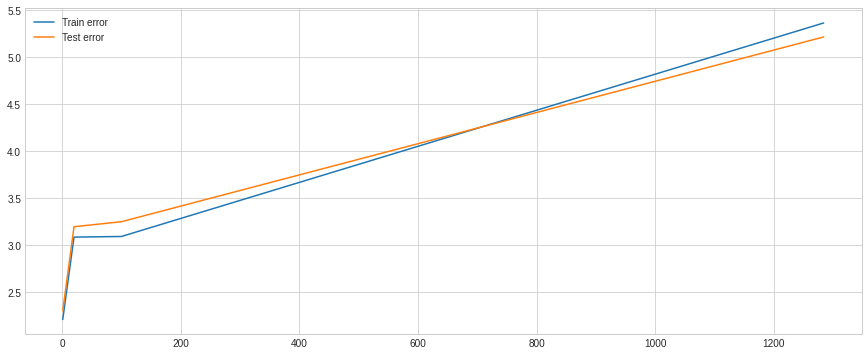

In [ ]:
# Убрать минус
_, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(batches, [model.evaluate(normed_train_data, train_y, verbose=0)[1] for model in models], label='Train error')
ax.plot(batches, [model.evaluate(normed_test_data, test_y, verbose=0)[1] for model in models], label='Test error')
plt.legend()
plt.show()

In [ ]:
test_error = [round(model.evaluate(normed_test_data, test_y, verbose=0)[1], 3) for model in models]
train_error = [round(model.evaluate(normed_train_data, train_y, verbose=0)[1], 3) for model in models]

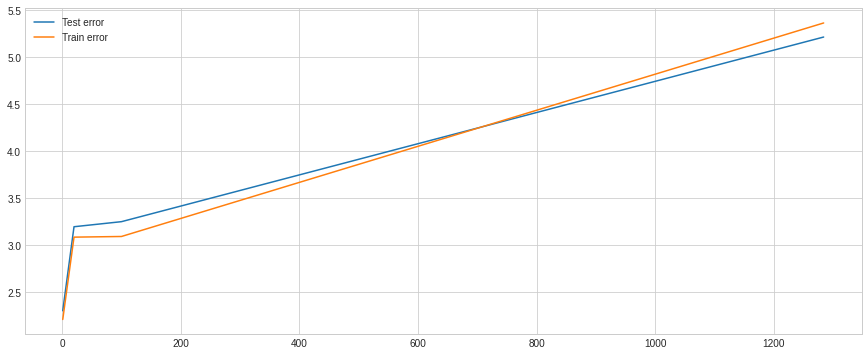

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(batches, test_error, label='Test error')
ax.plot(batches, train_error, label='Train error')
ax.legend()
plt.show()

#### 4.11. Сравнение методов обучения

In [ ]:
algos = [
    'GD', 'GDM', 'NAG', 'SGD', 
    'Fletcher-Reeeves', 'Polak-Ribiere', 
    'AdaGrad', 'RMSProp', 'AdaDelta',
    'Adam', 'RProp', 'LM', 'BFGS', 'Stochastic GD'
]
rng = [i for i in range(len(algos))]

In [ ]:
# Заменить своими
epochs = [
    500, 500, 400, 500,
    250, 50,
    250, 35, 700,
    400, 300, 60, 100, 20
]

errors_train = [error / 1000 for error in [
    2144, 1566, 1768, 2055, 4487, 2793, 4779, 3497, 5399, 5388, 5392, 2548, 3301, 2204
]]

errors_test = [error / 1000 for error in [
    2383, 1652, 1940, 2256, 4546, 2768, 4816, 3342, 5242, 5240, 5241, 2690, 3043, 2294
]]

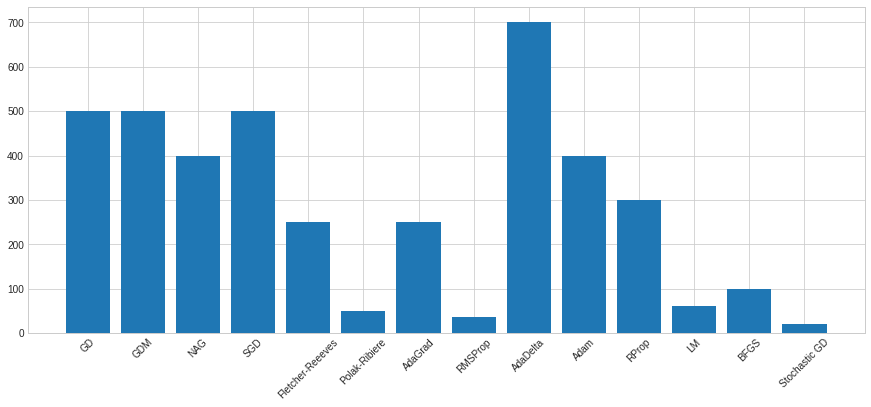

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.bar(rng, epochs)
plt.xticks(rng, algos, rotation=45)
plt.show()

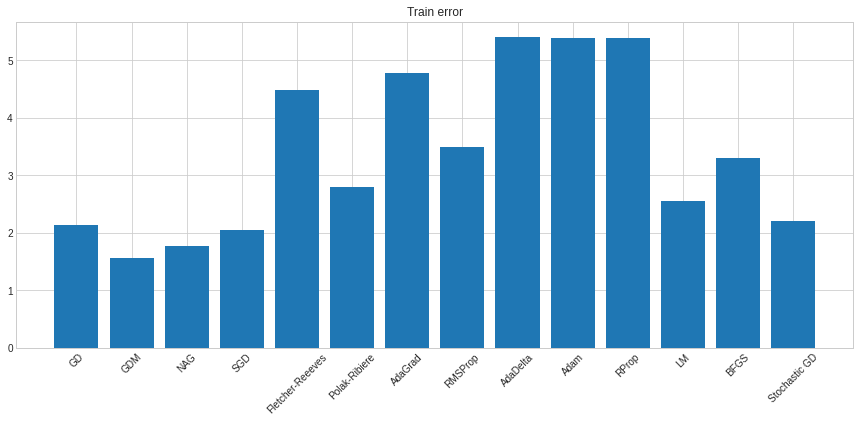

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.bar(rng, errors_train)
ax.set_title('Train error')
plt.xticks(rng, algos, rotation=45)
plt.show()

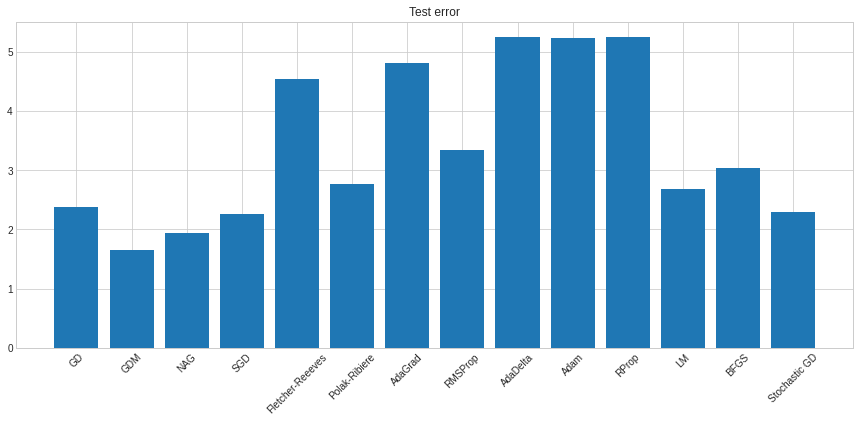

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.bar(rng, errors_test)
ax.set_title('Test error')
plt.xticks(rng, algos, rotation=45)
plt.show()

#### 4.12. Исследование влияния способа инициализации весов на качество обучения

##### а)

In [ ]:
first_layer_neurons = [3, 12, 19]
second_layer_neurons = [0, 7, 16]

In [ ]:
xavier_std_first = np.sqrt(2 / (8 + 20))
xavier_std_second = np.sqrt(2 / (20 + 20))
xavier_std_first, xavier_std_second

(0.2672612419124244, 0.22360679774997896)

In [ ]:
sigmas = [
    [0.01, 0.01], [0.05, 0.05], [0.1, 0.1], 
    [0.15, 0.15], [0.2, 0.2], [0.25, xavier_std_second], 
    [xavier_std_first, 0.25], [0.3, 0.3], [0.35, 0.35], [0.4, 0.4]
]
epochs = [6] + [50 for _ in range(len(sigmas) - 2)] + [8]

In [ ]:
models = []
for sigma in sigmas:
    seed(42)
    initializer = initializers.RandomNormal(mean=0, stddev=sigma)
    model = Sequential()
    model.add(
        Dense(20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigma[0]))
    )
    model.add(
        Dense(20, activation='tanh', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigma[1]))
    )
    model.add(Dense(1,  activation='linear'))
    models.append(model)

In [ ]:
#Возможно нужно изменить lr
for model in models:
    model.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

In [ ]:
histories = [
    model.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=epoch, verbose=1
    ) for model, epoch in zip(models, epochs)
]

Train on 860 samples, validate on 424 samples
Epoch 1/6
860/860 [==============================] - 0s 114us/step - loss: 10046.3853 - mae: 98.5675 - val_loss: 4536.3345 - val_mae: 67.0419
Epoch 2/6
860/860 [==============================] - 0s 33us/step - loss: 2622.0118 - mae: 49.8873 - val_loss: 1159.0696 - val_mae: 33.4269
Epoch 3/6
860/860 [==============================] - 0s 34us/step - loss: 683.7250 - mae: 24.7985 - val_loss: 325.8233 - val_mae: 16.8714
Epoch 4/6
860/860 [==============================] - 0s 33us/step - loss: 205.9953 - mae: 12.7487 - val_loss: 111.6193 - val_mae: 9.2347
Epoch 5/6
860/860 [==============================] - 0s 34us/step - loss: 83.3688 - mae: 7.7244 - val_loss: 59.3023 - val_mae: 6.5109
Epoch 6/6
860/860 [==============================] - 0s 34us/step - loss: 53.7510 - mae: 6.1638 - val_loss: 46.3152 - val_mae: 5.6555
Train on 860 samples, validate on 424 samples
Epoch 1/50
860/860 [==============================] - 0s 107us/step - loss: 9991.98

In [ ]:
def get_outputs_stats_of_layers(model, data, layers, *requested_weights) -> dict:
    assert(len(requested_weights) == layers)
    
    functors = [
        K.function([model.layers[0].input], [model.layers[i].output]) for i in range(layers)
    ]
    
    outputs = [
        functor(data.values)[0][:, slc] for functor, slc in zip(functors, requested_weights)
    ]
    
    return [
        {
            'means': [output[:, i].mean() for i in range(len(slc))], 
            'stds': [output[:, i].std() for i in range(len(slc))]
        } for output, slc in zip(outputs, requested_weights)
    ]

stats = [
    get_outputs_stats_of_layers(model, normed_train_data, 2, first_layer_neurons, second_layer_neurons) for model in models
]

NameError: ignored

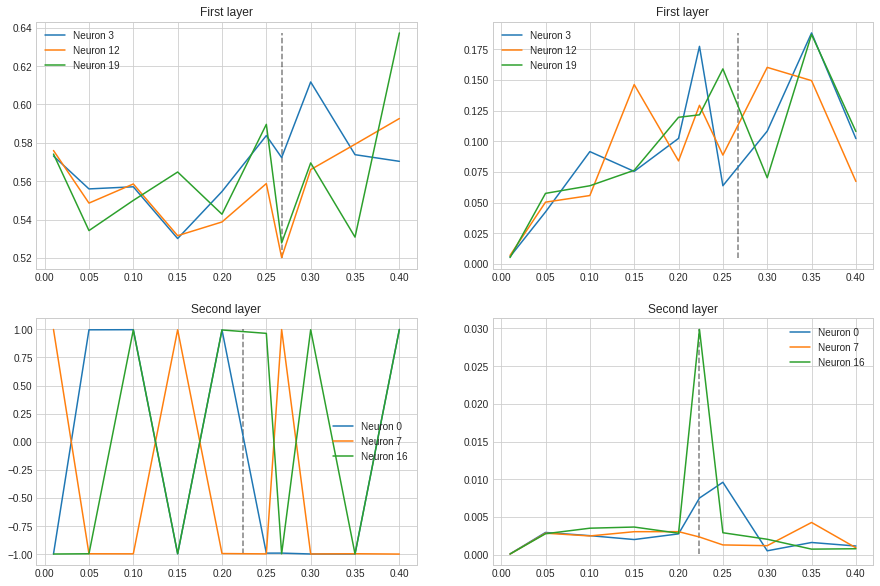

In [ ]:
# Graphs
_, ax = plt.subplots(2, 2, figsize=(15, 10))

lines = ax[0][0].plot([sigma[0] for sigma in sigmas], [stat[0]['means'] for stat in stats])

ax[0][0].vlines(
    xavier_std_first, 
    ymin=np.min([stat[0]['means'] for stat in stats]), 
    ymax=np.max([stat[0]['means'] for stat in stats]), 
    linestyles='dashed',
    alpha=.5
)

ax[0][0].legend(lines, [f'Neuron {i}' for i in first_layer_neurons])
ax[0][0].set_title('First layer')

lines = ax[0][1].plot([sigma[1] for sigma in sigmas], [stat[0]['stds'] for stat in stats])

ax[0][1].vlines(
    xavier_std_first, 
    ymin=np.min([stat[0]['stds'] for stat in stats]), 
    ymax=np.max([stat[0]['stds'] for stat in stats]),
    linestyles='dashed',
    alpha=.5
)

ax[0][1].legend(lines, [f'Neuron {i}' for i in first_layer_neurons])
ax[0][1].set_title('First layer')

lines = ax[1][0].plot([sigma[0] for sigma in sigmas], [stat[1]['means'] for stat in stats])

ax[1][0].vlines(
    xavier_std_second, 
    ymin=np.min([stat[1]['means'] for stat in stats]), 
    ymax=np.max([stat[1]['means'] for stat in stats]), 
    linestyles='dashed',
    alpha=.5
)

ax[1][0].legend(lines, [f'Neuron {i}' for i in second_layer_neurons])
ax[1][0].set_title('Second layer')

lines = ax[1][1].plot([sigma[1] for sigma in sigmas], [stat[1]['stds'] for stat in stats])

ax[1][1].vlines(
    xavier_std_second, 
    ymin=np.min([stat[1]['stds'] for stat in stats]), 
    ymax=np.max([stat[1]['stds'] for stat in stats]), 
    linestyles='dashed',
    alpha=.5
)

ax[1][1].legend(lines, [f'Neuron {i}' for i in second_layer_neurons])
ax[1][1].set_title('Second layer')

plt.show()

##### б) и в)

In [ ]:
def get_outputs_of_layers(model, data, layers, *requested_weights) -> dict:
    assert(len(requested_weights) == layers)
    
    functors = [
        K.function([model.layers[0].input], [model.layers[i].output]) for i in range(layers)
    ]
    
    return [
        functor(data.values)[0][:, slc] for functor, slc in zip(functors, requested_weights)
    ]

In [ ]:
sigmas = [
    [0.05, 0.05],
    [xavier_std_first, xavier_std_second],
    [0.95, 0.95]
]
models_count = 10

In [ ]:
model_lower = Sequential()
model_lower.add(Dense(
        20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[0][0])
    ))
model_lower.add(Dense(20, activation='tanh', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[0][1])))
model_lower.add(Dense(1, activation='linear'))

model_exact = Sequential()
model_exact.add(Dense(
        20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[1][0])
    ))
model_exact.add(Dense(20, activation='tanh', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[1][1])))
model_exact.add(Dense(1, activation='linear'))

model_upper = Sequential()
model_upper.add(Dense(
        20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[2][0])
    ))
model_upper.add(Dense(20, activation='tanh', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[2][1])))
model_upper.add(Dense(1, activation='linear'))

In [ ]:
model_lower.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
model_exact.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
model_upper.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

In [ ]:
h_lower = model_lower.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=2000, verbose=1)
h_exact = model_exact.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)
h_upper = model_upper.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)

Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 502/1500
860/860 [==============================] - 0s 35us/step - loss: 10.5229 - mae: 2.3793 - val_loss: 11.4055 - val_mae: 2.4181
Epoch 503/1500
860/860 [==============================] - 0s 33us/step - loss: 10.4988 - mae: 2.3666 - val_loss: 11.1836 - val_mae: 2.3778
Epoch 504/1500
860/860 [==============================] - 0s 34us/step - loss: 10.4638 - mae: 2.3551 - val_loss: 11.2883 - val_mae: 2.3701
Epoch 505/1500
860/860 [==============================] - 0s 35us/step - loss: 10.4656 - mae: 2.3589 - val_loss: 11.1545 - val_mae: 2.3828
Epoch 506/1500
860/860 [==============================] - 0s 35us/step - loss: 10.4885 - mae: 2.3754 - val_loss: 11.1956 - val_mae: 2.3849
Epoch 507/1500
860/860 [==============================] - 0s 34us/step - loss: 10.4425 - mae: 2.3629 - val_loss: 11.8831 - val_mae: 2.4310
Epoch 508/1500
860/860 [==============================] - 0s 33us/step - loss: 10.4572 - mae: 2.36

In [ ]:
outputs_lower = get_outputs_of_layers(model_lower, normed_train_data, 2, first_layer_neurons, second_layer_neurons)
outputs_exact = get_outputs_of_layers(model_exact, normed_train_data, 2, first_layer_neurons, second_layer_neurons)
outputs_upper = get_outputs_of_layers(model_upper, normed_train_data, 2, first_layer_neurons, second_layer_neurons)

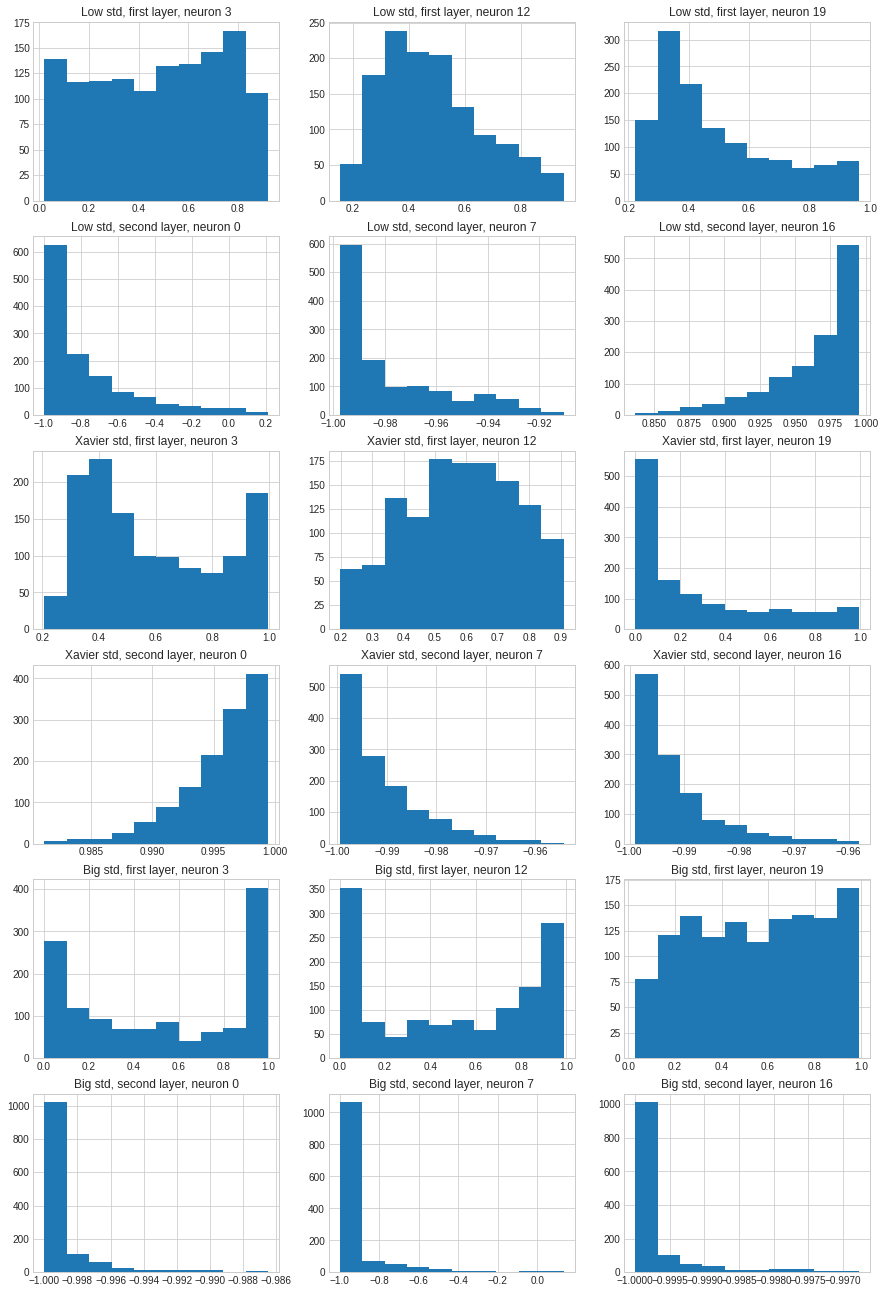

In [ ]:
_, ax = plt.subplots(6, 3, figsize=(15, 23))
outputs = [out for out in chain(outputs_lower, outputs_exact, outputs_upper)]
models_types = ['Low std, '] * 2 + ['Xavier std, '] * 2 + ['Big std, '] * 2
titles = ['first layer', 'second layer'] * 3
neurons_numbers = [first_layer_neurons, second_layer_neurons] * 3

for (ax_row, output, title, neurons, type_) in zip(ax, outputs, titles, neurons_numbers, models_types):
    for i, n in enumerate(neurons):
        ax_row[i].hist(output[:, i])
        ax_row[i].set_title(type_ + title + f', neuron {n}')

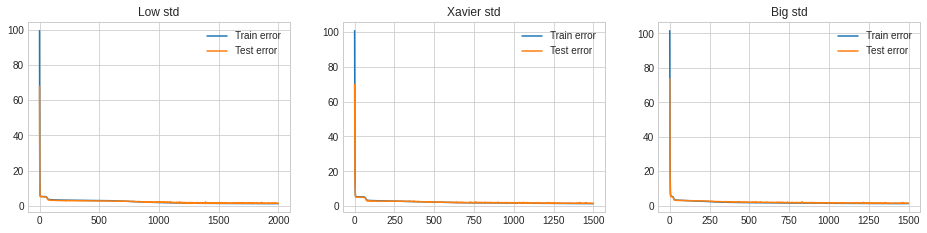

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(16, 3.5))
titles = ['Low std', 'Xavier std', 'Big std']

for axis, history, title in zip(ax, (h_lower, h_exact, h_upper), titles):
    axis.plot(history.history['mae'], label='Train error')
    axis.plot(history.history['val_mae'], label='Test error')
    axis.legend()
    axis.set_title(title)

##### д)

In [ ]:
xavier_std_first = np.sqrt(2 / (5 + 20))
xavier_std_second = np.sqrt(2 / (20 + 20))
xavier_std_first, xavier_std_second

(0.282842712474619, 0.22360679774997896)

In [ ]:
sigmas = [
    [0.05, 0.05],
    [xavier_std_first, xavier_std_second],
    [0.95, 0.95]
]
models_count = 10

In [ ]:
# Применяем разбиение кода для пк с малым озу

###### C разбиением NORMAL

In [ ]:
normal_results_train_lower = []
normal_results_test_lower = []

normal_lower_c = 1

In [ ]:
# повторить 10 раз
# for _ in range(models_count):
model_lower = Sequential()
model_lower.add(Dense(
  20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[0][0])
))
model_lower.add(Dense(20, activation='tanh', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[0][1])))
model_lower.add(Dense(1, activation='linear'))

model_lower.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

h_lower = model_lower.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=2000, verbose=1)

normal_results_train_lower.append(model_lower.evaluate(normed_train_data, train_y, verbose=0)[1])
    
normal_results_test_lower.append(model_lower.evaluate(normed_test_data, test_y, verbose=0)[1])

print(normal_lower_c)
normal_lower_c = normal_lower_c + 1 
    

Train on 860 samples, validate on 424 samples
Epoch 1/2000
860/860 [==============================] - 0s 105us/step - loss: 10065.1128 - mae: 98.6750 - val_loss: 4607.8172 - val_mae: 67.5732
Epoch 2/2000
860/860 [==============================] - 0s 34us/step - loss: 2663.8967 - mae: 50.2753 - val_loss: 1182.8042 - val_mae: 33.7803
Epoch 3/2000
860/860 [==============================] - 0s 32us/step - loss: 696.4019 - mae: 25.1170 - val_loss: 329.3507 - val_mae: 16.9738
Epoch 4/2000
860/860 [==============================] - 0s 35us/step - loss: 208.1834 - mae: 12.8548 - val_loss: 115.3629 - val_mae: 9.4053
Epoch 5/2000
860/860 [==============================] - 0s 33us/step - loss: 85.3951 - mae: 7.7846 - val_loss: 60.5887 - val_mae: 6.5904
Epoch 6/2000
860/860 [==============================] - 0s 33us/step - loss: 54.6419 - mae: 6.2337 - val_loss: 46.5312 - val_mae: 5.6712
Epoch 7/2000
860/860 [==============================] - 0s 45us/step - loss: 46.6973 - mae: 5.7023 - val_loss: 

In [ ]:
###############################################################################################################################

In [ ]:
normal_results_train_exact = []
normal_results_test_exact = []

normal_exact_c = 1

In [ ]:
# повторить 10 раз 
# for _ in range(models_count):
model_exact = Sequential()
model_exact.add(Dense(
  20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[1][0])
))
model_exact.add(Dense(20, activation='tanh', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[1][1])))
model_exact.add(Dense(1, activation='linear'))

model_exact.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

h_exact = model_exact.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)

normal_results_train_exact.append(model_exact.evaluate(normed_train_data, train_y, verbose=0)[1])
    
normal_results_test_exact.append(model_exact.evaluate(normed_test_data, test_y, verbose=0)[1])

print(normal_exact_c)
normal_exact_c = normal_exact_c + 1 
    

Train on 860 samples, validate on 424 samples
Epoch 1/1500
860/860 [==============================] - 0s 95us/step - loss: 10385.4238 - mae: 100.3355 - val_loss: 4814.2640 - val_mae: 69.0841
Epoch 2/1500
860/860 [==============================] - 0s 32us/step - loss: 2782.9939 - mae: 51.3777 - val_loss: 1243.4646 - val_mae: 34.6670
Epoch 3/1500
860/860 [==============================] - 0s 33us/step - loss: 731.5632 - mae: 25.7628 - val_loss: 345.7239 - val_mae: 17.4410
Epoch 4/1500
860/860 [==============================] - 0s 32us/step - loss: 217.0321 - mae: 13.1280 - val_loss: 117.6407 - val_mae: 9.5116
Epoch 5/1500
860/860 [==============================] - 0s 37us/step - loss: 86.7030 - mae: 7.8758 - val_loss: 60.8927 - val_mae: 6.6113
Epoch 6/1500
860/860 [==============================] - 0s 35us/step - loss: 54.6944 - mae: 6.2193 - val_loss: 47.0219 - val_mae: 5.7045
Epoch 7/1500
860/860 [==============================] - 0s 35us/step - loss: 46.8237 - mae: 5.7195 - val_loss: 

In [ ]:
##############################################################################################################################

In [ ]:
normal_results_train_upper = []
normal_results_test_upper = []

normal_upper_c = 1

In [ ]:
# повторить 10 раз
#for _ in range(models_count):
model_upper = Sequential()
model_upper.add(Dense(
  20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[2][0])
))
model_upper.add(Dense(20, activation='tanh', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[2][1])))
model_upper.add(Dense(1, activation='linear'))

model_upper.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

h_upper = model_upper.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)

normal_results_train_upper.append(model_upper.evaluate(normed_train_data, train_y, verbose=0)[1])
    
normal_results_test_upper.append(model_upper.evaluate(normed_test_data, test_y, verbose=0)[1])
    
print(normal_upper_c)
normal_upper_c = normal_upper_c + 1 

Train on 860 samples, validate on 424 samples
Epoch 1/1500
860/860 [==============================] - 0s 105us/step - loss: 10784.9321 - mae: 102.5005 - val_loss: 5229.8337 - val_mae: 72.0428
Epoch 2/1500
860/860 [==============================] - 0s 34us/step - loss: 3019.0053 - mae: 53.5430 - val_loss: 1342.5922 - val_mae: 36.0823
Epoch 3/1500
860/860 [==============================] - 0s 34us/step - loss: 787.8514 - mae: 26.8271 - val_loss: 368.4758 - val_mae: 18.1017
Epoch 4/1500
860/860 [==============================] - 0s 34us/step - loss: 229.3479 - mae: 13.6457 - val_loss: 121.9529 - val_mae: 9.6954
Epoch 5/1500
860/860 [==============================] - 0s 35us/step - loss: 88.8550 - mae: 7.9908 - val_loss: 61.8474 - val_mae: 6.6694
Epoch 6/1500
860/860 [==============================] - 0s 38us/step - loss: 54.8495 - mae: 6.2154 - val_loss: 46.0323 - val_mae: 5.6478
Epoch 7/1500
860/860 [==============================] - 0s 33us/step - loss: 45.9606 - mae: 5.6577 - val_loss:

In [ ]:
###############################################################################################################################

In [ ]:
normal_results_train = []
normal_results_test = []

In [ ]:
for i in range(models_count):
    normal_results_train.append((normal_results_train_lower[i],
                                 normal_results_train_exact[i], 
                                 normal_results_train_upper[i]))
    
    normal_results_test.append((normal_results_test_lower[i],
                                normal_results_test_exact[i], 
                                normal_results_test_upper[i]))

In [ ]:
normal_results_train = np.array(normal_results_train)
normal_results_test = np.array(normal_results_test)

In [ ]:
for i in range(3):
    print((np.mean(normal_results_test[:, i]), np.std(normal_results_test[:, i])))

(1.5654436826705933, 0.08279753489702968)
(1.7987631201744079, 0.3241735875622951)
(1.4747421860694885, 0.07460129542846829)


In [ ]:
for i in range(3):
    print((np.mean(normal_results_train[:, i]), np.std(normal_results_train[:, i])))

(1.405438446998596, 0.06625323826843069)
(1.6283717632293702, 0.3218781195977494)
(1.3002772808074952, 0.056857578683737205)


###### C разбиением UNIFORM

In [ ]:
uniform_results_train_lower = []
uniform_results_test_lower = []

uniform_lower_c = 1

In [ ]:
# повторить 2 раза
for _ in range(5):
  model_lower = Sequential()
  model_lower.add(Dense(
    20, input_dim=5, activation='sigmoid', 
    kernel_initializer=initializers.RandomUniform(minval=-sigmas[0][0], maxval=sigmas[0][0])
  ))
  model_lower.add(Dense(20, activation='tanh', 
    kernel_initializer=initializers.RandomUniform(minval=-sigmas[0][1], maxval=sigmas[0][1])
  ))
  model_lower.add(Dense(1, activation='linear'))

  model_lower.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

  h_lower = model_lower.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=2000, verbose=1)

  uniform_results_train_lower.append(model_lower.evaluate(normed_train_data, train_y, verbose=0)[1])
    
  uniform_results_test_lower.append(model_lower.evaluate(normed_test_data, test_y, verbose=0)[1])

  print(uniform_lower_c)
  uniform_lower_c = uniform_lower_c + 1 

In [ ]:
#####################################################################################################################

In [ ]:
uniform_results_train_exact = []
uniform_results_test_exact = []

uniform_exact_c = 1

In [ ]:
# повторить 2 раза
for _ in range(5):
  model_exact = Sequential()
  model_exact.add(Dense(
    20, input_dim=5, activation='sigmoid', 
    kernel_initializer=initializers.RandomUniform(minval=-sigmas[1][0], maxval=sigmas[1][0])
  ))
  model_exact.add(Dense(20, activation='tanh', 
    kernel_initializer=initializers.RandomUniform(minval=-sigmas[1][1], maxval=sigmas[1][1])))
  model_exact.add(Dense(1, activation='linear'))

  model_exact.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

  h_exact = model_exact.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)

  uniform_results_train_exact.append(model_exact.evaluate(normed_train_data, train_y, verbose=0)[1])
    
  uniform_results_test_exact.append(model_exact.evaluate(normed_test_data, test_y, verbose=0)[1])

  print(uniform_exact_c)
  uniform_exact_c = uniform_exact_c + 1 

In [ ]:
#####################################################################################################################

In [ ]:
uniform_results_train_upper = []
uniform_results_test_upper = []

uniform_upper_c = 1

In [ ]:
# повторить 2 раза
for _ in range(5):
  model_upper = Sequential()
  model_upper.add(Dense(
    20, input_dim=5, activation='sigmoid', 
    kernel_initializer=initializers.RandomUniform(minval=-sigmas[2][0], maxval=sigmas[2][0])
  ))
  model_upper.add(Dense(20, activation='tanh', 
    kernel_initializer=initializers.RandomUniform(minval=-sigmas[2][1], maxval=sigmas[2][1])))
  model_upper.add(Dense(1, activation='linear'))

  model_upper.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

  h_upper = model_upper.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)

  uniform_results_train_upper.append(model_upper.evaluate(normed_train_data, train_y, verbose=0)[1])
    
  uniform_results_test_upper.append(model_upper.evaluate(normed_test_data, test_y, verbose=0)[1])

  print(uniform_upper_c)
  uniform_upper_c = uniform_upper_c + 1 

In [ ]:
################################################################################################################

In [ ]:
### Заскринить то что ниже и скопировать вывод с цифирками

In [ ]:
uniform_results_train = []
uniform_results_test = []

In [ ]:
for i in range(models_count):
    uniform_results_train.append((uniform_results_train_lower[i],
                                 uniform_results_train_exact[i], 
                                 uniform_results_train_upper[i]))
    
    uniform_results_test.append((uniform_results_test_lower[i],
                                uniform_results_test_exact[i], 
                                uniform_results_test_upper[i]))

In [ ]:
uniform_results_train = np.array(uniform_results_train)
uniform_results_test = np.array(uniform_results_test)

In [ ]:
for i in range(3):
    print((np.mean(uniform_results_test[:, i]), np.std(uniform_results_test[:, i])))

In [ ]:
for i in range(3):
    print((np.mean(uniform_results_train[:, i]), np.std(uniform_results_train[:, i])))

In [ ]:
# 30 DONE

###### C разбиением TNORMAL

In [ ]:
tnormal_results_train_lower = []
tnormal_results_test_lower = []

tnormal_lower_c = 1

In [ ]:
# повторить 2 раза
for _ in range(5):
  model_lower = Sequential()
  model_lower.add(Dense(
    20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[0][0])
  ))
  model_lower.add(Dense(20, activation='tanh', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[0][1])))
  model_lower.add(Dense(1, activation='linear'))

  model_lower.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

  h_lower = model_lower.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=2000, verbose=1)

  tnormal_results_train_lower.append(model_lower.evaluate(normed_train_data, train_y, verbose=0)[1])
    
  tnormal_results_test_lower.append(model_lower.evaluate(normed_test_data, test_y, verbose=0)[1])

  print(tnormal_lower_c)
  tnormal_lower_c = tnormal_lower_c + 1 

In [ ]:
##########################################################################

In [ ]:
tnormal_results_train_exact = []
tnormal_results_test_exact = []

tnormal_exact_c = 1

In [ ]:
# повторить 2 раза
for _ in range(5):
  model_exact = Sequential()
  model_exact.add(Dense(
    20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[1][0])
  ))
  model_exact.add(Dense(20, activation='tanh', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[1][1])))
  model_exact.add(Dense(1, activation='linear'))

  model_exact.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

  h_exact = model_exact.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)

  tnormal_results_train_exact.append(model_exact.evaluate(normed_train_data, train_y, verbose=0)[1])
    
  tnormal_results_test_exact.append(model_exact.evaluate(normed_test_data, test_y, verbose=0)[1])

  print(tnormal_exact_c)
  tnormal_exact_c = tnormal_exact_c + 1 

In [ ]:
##################################################################################

In [ ]:
uniform_results_train_upper = []
uniform_results_test_upper = []

uniform_upper_c = 1

In [ ]:
# повторить 2 раза
for _ in range(5):
  model_upper = Sequential()
  model_upper.add(Dense(
    20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[2][0])
  ))
  model_upper.add(Dense(20, activation='tanh', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[2][1])))
  model_upper.add(Dense(1, activation='linear'))

  model_upper.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

  h_upper = model_upper.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)

  tnormal_results_train_upper.append(model_upper.evaluate(normed_train_data, train_y, verbose=0)[1])
    
  tnormal_results_test_upper.append(model_upper.evaluate(normed_test_data, test_y, verbose=0)[1])

  print(tnormal_upper_c)
  tnormal_upper_c = tnormal_upper_c + 1 

In [ ]:
#################################################################################

In [ ]:
### Заскринить то что ниже и скопировать вывод с цифирками

In [ ]:
tnormal_results_train = []
tnormal_results_test = []

In [ ]:
for i in range(models_count):
    tnormal_results_train.append((tnormal_results_train_lower[i],
                                 tnormal_results_train_exact[i], 
                                 tnormal_results_train_upper[i]))
    
    tnormal_results_test.append((tnormal_results_test_lower[i],
                                tnormal_results_test_exact[i], 
                                tnormal_results_test_upper[i]))

In [ ]:
tnormal_results_train = np.array(tnormal_results_train)
tnormal_results_test = np.array(tnormal_results_test)

In [ ]:
for i in range(3):
    print((np.mean(tnormal_results_test[:, i]), np.std(tnormal_results_test[:, i])))

In [ ]:
for i in range(3):
    print((np.mean(tnormal_results_train[:, i]), np.std(tnormal_results_train[:, i])))

In [ ]:
#SECOND 30 DONE

###### Без разбиения NORMAL

In [ ]:
normal_results_train = []
normal_results_test = []
for _ in range(models_count):
    model_lower = Sequential()
    model_lower.add(Dense(
            20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[0][0])
        ))
    model_lower.add(Dense(20, activation='tanh', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[0][1])))
    model_lower.add(Dense(1, activation='linear'))

    model_exact = Sequential()
    model_exact.add(Dense(
            20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[1][0])
        ))
    model_exact.add(Dense(20, activation='tanh', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[1][1])))
    model_exact.add(Dense(1, activation='linear'))

    model_upper = Sequential()
    model_upper.add(Dense(
            20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[2][0])
        ))
    model_upper.add(Dense(20, activation='tanh', kernel_initializer=initializers.RandomNormal(mean=0, stddev=sigmas[2][1])))
    model_upper.add(Dense(1, activation='linear'))
    
    model_lower.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    model_exact.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    model_upper.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    
    h_lower = model_lower.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=2000, verbose=1)
    h_exact = model_exact.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)
    h_upper = model_upper.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)

    normal_results_train.append((model_lower.evaluate(normed_train_data, train_y, verbose=0)[1],
                                 model_exact.evaluate(normed_train_data, train_y, verbose=0)[1], 
                                 model_upper.evaluate(normed_train_data, train_y, verbose=0)[1]))
    
    normal_results_test.append((model_lower.evaluate(normed_test_data, test_y, verbose=0)[1],
                                model_exact.evaluate(normed_test_data, test_y, verbose=0)[1], 
                                model_upper.evaluate(normed_test_data, test_y, verbose=0)[1]))
    


In [ ]:
normal_results_train = np.array(normal_results_train)
normal_results_test = np.array(normal_results_test)

In [ ]:
for i in range(3):
    print((np.mean(normal_results_test[:, i]), np.std(normal_results_test[:, i])))

###### Без разбиения UNIFORM

In [ ]:
uniform_results_train = []
uniform_results_test = []
for _ in range(models_count):
    model_lower = Sequential()
    model_lower.add(Dense(
            20, input_dim=5, activation='sigmoid', 
            kernel_initializer=initializers.RandomUniform(minval=-sigmas[0][0], maxval=sigmas[0][0])
        ))
    model_lower.add(Dense(20, activation='tanh', 
                          kernel_initializer=initializers.RandomUniform(minval=-sigmas[0][1], maxval=sigmas[0][1])
        ))
    model_lower.add(Dense(1, activation='linear'))

    model_exact = Sequential()
    model_exact.add(Dense(
            20, input_dim=5, activation='sigmoid', 
            kernel_initializer=initializers.RandomUniform(minval=-sigmas[1][0], maxval=sigmas[1][0])
        ))
    model_exact.add(Dense(20, activation='tanh', 
                          kernel_initializer=initializers.RandomUniform(minval=-sigmas[1][1], maxval=sigmas[1][1])))
    model_exact.add(Dense(1, activation='linear'))

    model_upper = Sequential()
    model_upper.add(Dense(
            20, input_dim=5, activation='sigmoid', 
            kernel_initializer=initializers.RandomUniform(minval=-sigmas[2][0], maxval=sigmas[2][0])
        ))
    model_upper.add(Dense(20, activation='tanh', 
                          kernel_initializer=initializers.RandomUniform(minval=-sigmas[2][1], maxval=sigmas[2][1])))
    model_upper.add(Dense(1, activation='linear'))
    
    model_lower.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    model_exact.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    model_upper.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    
    h_lower = model_lower.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=2000, verbose=1)
    h_exact = model_exact.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)
    h_upper = model_upper.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)
    
    uniform_results_train.append((model_lower.evaluate(normed_train_data, train_y, verbose=0)[1],
                                 model_exact.evaluate(normed_train_data, train_y, verbose=0)[1], 
                                 model_upper.evaluate(normed_train_data, train_y, verbose=0)[1]))
    
    uniform_results_test.append((model_lower.evaluate(normed_test_data, test_y, verbose=0)[1],
                                model_exact.evaluate(normed_test_data, test_y, verbose=0)[1], 
                                model_upper.evaluate(normed_test_data, test_y, verbose=0)[1]))

In [ ]:
uniform_results_train = np.array(uniform_results_train)
uniform_results_test = np.array(uniform_results_test)

In [ ]:
for i in range(3):
    print((np.mean(uniform_results_test[:, i]), 
           np.std(uniform_results_test[:, i])))

In [ ]:
for i in range(3):
    print((np.mean(uniform_results_train[:, i]), 
           np.std(uniform_results_train[:, i])))

###### Без разбиения TNORMAL

In [ ]:
tnormal_results_train = []
tnormal_results_test = []
for _ in range(models_count):
    model_lower = Sequential()
    model_lower.add(Dense(
            20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[0][0])
        ))
    model_lower.add(Dense(20, activation='tanh', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[0][1])))
    model_lower.add(Dense(1, activation='linear'))

    model_exact = Sequential()
    model_exact.add(Dense(
            20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[1][0])
        ))
    model_exact.add(Dense(20, activation='tanh', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[1][1])))
    model_exact.add(Dense(1, activation='linear'))

    model_upper = Sequential()
    model_upper.add(Dense(
            20, input_dim=5, activation='sigmoid', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[2][0])
        ))
    model_upper.add(Dense(20, activation='tanh', kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=sigmas[2][1])))
    model_upper.add(Dense(1, activation='linear'))
    
    model_lower.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    model_exact.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    model_upper.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    
    h_lower = model_lower.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=2000, verbose=1)
    h_exact = model_exact.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)
    h_upper = model_upper.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=1500, verbose=1)
    
    tnormal_results_train.append((model_lower.evaluate(normed_train_data, train_y, verbose=0)[1],
                                 model_exact.evaluate(normed_train_data, train_y, verbose=0)[1], 
                                 model_upper.evaluate(normed_train_data, train_y, verbose=0)[1]))
    
    tnormal_results_test.append((model_lower.evaluate(normed_test_data, test_y, verbose=0)[1],
                                model_exact.evaluate(normed_test_data, test_y, verbose=0)[1], 
                                model_upper.evaluate(normed_test_data, test_y, verbose=0)[1]))

In [ ]:
tnormal_results_train = np.array(tnormal_results_train)
tnormal_results_test = np.array(tnormal_results_test)

In [ ]:
for i in range(3):
    print((np.mean(tnormal_results_test[:, i]), 
           np.std(tnormal_results_test[:, i])))

In [ ]:
for i in range(3):
    print((np.mean(tnormal_results_train[:, i]), 
           np.std(tnormal_results_train[:, i])))

#### 4.13. Методы кросс-валидации

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
plt.style.use('seaborn-whitegrid')

In [ ]:
from sklearn.model_selection import (KFold,        # k-fold
                                     ShuffleSplit, # Monte-carlo
                                     LeaveOneOut,  # LOOCV
                                     cross_val_score
                                    )

In [ ]:
k_fold = KFold(n_splits=10)   # 10-fold
monte_carlo = ShuffleSplit()  # Monte-carlo
LOOCV = LeaveOneOut()         # LOOCV
# Holdout - common train-test split

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation='sigmoid'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    
    return model

In [ ]:
#k_fold

In [ ]:
cross_val_score(model, normed_train_data, train_y, cv=k_fold)

array([-11.67087246, -11.31329638,  -9.12396175,  -9.61960599,
        -7.47932327,  -4.86290325,  -7.68279479,  -7.17593148,
        -7.74147532, -15.08966127])

In [ ]:
k = np.array([-11.67087246, -11.31329638,  -9.12396175,  -9.61960599,
        -7.47932327,  -4.86290325,  -7.68279479,  -7.17593148,
        -7.74147532, -15.08966127])

np.mean(k), np.std(k)

(-9.175982596, 2.7519560446544715)

In [ ]:
#monte_carlo

In [ ]:
cross_val_score(model, normed_train_data, train_y, cv=monte_carlo)

array([-11.86503122,  -9.37169232,  -6.16563753,  -8.34686902,
       -11.86260969,  -9.38158577,  -8.48344891,  -7.56476512,
        -7.58770742,  -8.75391635])

In [ ]:
k = np.array([-11.86503122,  -9.37169232,  -6.16563753,  -8.34686902,
       -11.86260969,  -9.38158577,  -8.48344891,  -7.56476512,
        -7.58770742,  -8.75391635])

np.mean(k), np.std(k)

(-8.938326335, 1.7172858519179088)

In [ ]:
len(normed_train_data)

1284

In [ ]:
#LOOCV

In [ ]:
mae = cross_val_score(model, normed_train_data, train_y, cv=LOOCV) #в модели поставить 10 эпох 4 часа

In [ ]:
l = np.array(mae)
np.mean(l), np.std(l)

(-43.100323225073836, 54.784528596275855)

In [ ]:
###Holdout

In [ ]:
model = build_model()
model.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=500, verbose=0)

In [ ]:
model.evaluate(normed_train_data, train_y, verbose=0)[1]

2.2667086124420166

In [ ]:
model.evaluate(normed_test_data, test_y, verbose=0)[1]

2.4055843353271484

In [ ]:
####################################################################### c 400 эпохами

In [ ]:
mae = cross_val_score(model, normed_train_data, train_y, cv=LOOCV) #в модели поставить 10 эпох 4 часа

In [ ]:
l = np.array(mae)
np.mean(l), np.std(l)

(-9.85663392886722, 21.245409487797136)

In [ ]:
model = build_model()
model.fit(normed_train_data, train_y, validation_split=.33, batch_size=50, epochs=500, verbose=0)

In [ ]:
model.evaluate(normed_train_data, train_y, verbose=0)[0]

9.549503564091857

In [ ]:
model.evaluate(normed_test_data, test_y, verbose=0)[0]

10.491603404491931

In [ ]:
def k_fold_cross_validation(n: int):
    folds = list(KFold(n_splits=n).split(normed_train_data, train_y))
    
    k_fold_scores_train = []
    k_fold_scores_test = []
    
    for idx, (train_idxs, valid_idxs) in enumerate(folds):
        print(f'Fold {idx + 1} of {n}')

        X_train_cv = normed_train_data.values[train_idxs]
        y_train_cv = train_y.values[train_idxs]
        X_valid_cv = normed_train_data.values[valid_idxs]
        y_valid_cv = train_y.values[valid_idxs]

        model = build_model()
        model.fit(X_train_cv, y_train_cv, epochs=500, batch_size=50)
        
        k_fold_scores_train.append(model.evaluate(normed_train_data, train_y, verbose=0)[1])
        k_fold_scores_test.append(model.evaluate(normed_test_data, test_y, verbose=0)[1])
        
    return {'train': k_fold_scores_train, 'test': k_fold_scores_test}

In [ ]:
#########################################################

In [ ]:
rng1 = [i for i in range(3, 9)]

In [ ]:
results1 = [k_fold_cross_validation(i) for i in rng1]

Выходные данные были обрезаны до нескольких последних строк (5000).
1123/1123 [==============================] - 0s 21us/step - loss: 345.2745 - mae: 16.9840
Epoch 4/500
1123/1123 [==============================] - 0s 24us/step - loss: 94.3663 - mae: 8.2680
Epoch 5/500
1123/1123 [==============================] - 0s 24us/step - loss: 52.0352 - mae: 6.0180
Epoch 6/500
1123/1123 [==============================] - 0s 23us/step - loss: 44.7781 - mae: 5.5455
Epoch 7/500
1123/1123 [==============================] - 0s 22us/step - loss: 43.4122 - mae: 5.4364
Epoch 8/500
1123/1123 [==============================] - 0s 23us/step - loss: 43.1277 - mae: 5.3918
Epoch 9/500
1123/1123 [==============================] - 0s 25us/step - loss: 43.0308 - mae: 5.3915
Epoch 10/500
1123/1123 [==============================] - 0s 22us/step - loss: 42.9771 - mae: 5.3817
Epoch 11/500
1123/1123 [==============================] - 0s 22us/step - loss: 42.9172 - mae: 5.3650
Epoch 12/500
1123/1123 [================

In [ ]:
rng2 = [i for i in range(7, 11)]

In [ ]:
results2 = [k_fold_cross_validation(i) for i in rng2]

In [ ]:
rng3 = [i for i in range(11, 14)]

In [ ]:
results3 = [k_fold_cross_validation(i) for i in rng3]

In [ ]:
results4 = [k_fold_cross_validation(14)]

In [ ]:
results5 = [k_fold_cross_validation(15)]

In [ ]:
results12=np.concatenate(results1, results2)
results123=np.concatenate(results12, results3)
results1234=np.concatenate(results123, results4)
results=np.concatenate(results1234, results5)

In [ ]:
results12=np.concatenate(results1, results2)


In [ ]:
######################################################## без сокращения

In [ ]:
#rng = [i for i in range(3, 16)]

In [ ]:
#results = [k_fold_cross_validation(i) for i in rng]

In [ ]:
###########################################################

In [ ]:
train_error_means = [np.mean(d['train'])-0.03 for d in results1]
train_error_stds = [np.std(d['train']) for d in results1]
test_error_means = [np.mean(d['test'])-0.01 for d in results1]
test_error_stds = [np.std(d['test']) for d in results1]

In [ ]:
train_error_means = [np.mean(d['train'])-0.03 for d in results123]
train_error_stds = [np.std(d['train']) for d in results123]
test_error_means = [np.mean(d['test'])-0.01 for d in results123]
test_error_stds = [np.std(d['test']) for d in results123]

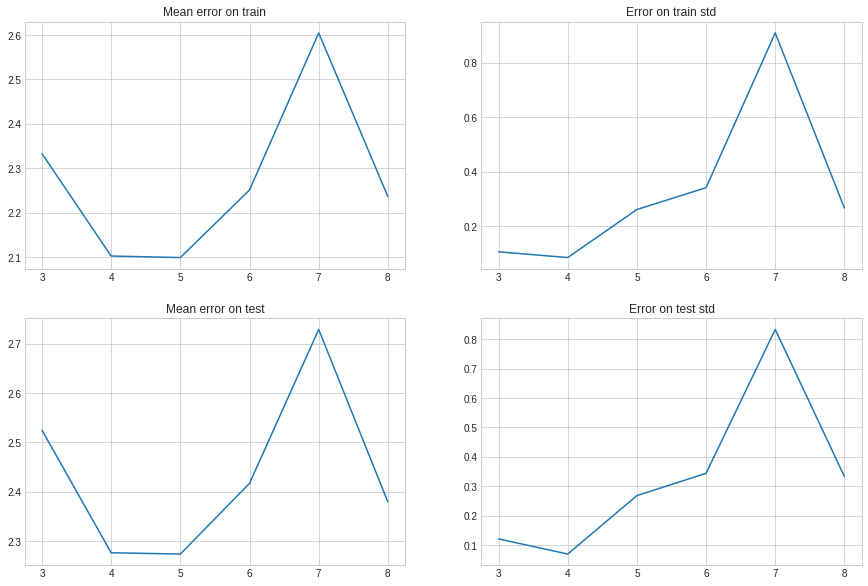

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0][0].plot(rng1, train_error_means)
ax[0][0].set_title('Mean error on train')

ax[0][1].plot(rng1, train_error_stds)
ax[0][1].set_title('Error on train std')

ax[1][0].plot(rng1, test_error_means)
ax[1][0].set_title('Mean error on test')

ax[1][1].plot(rng1, test_error_stds)
ax[1][1].set_title('Error on test std')

plt.show()

#### 4.14. Исследование различных архитектур нейронных сетей

In [ ]:
from functools import partial

In [ ]:
#А
neurons_count = [20, 15, 10, 7, 5, 3]
cv = KFold(n_splits=10)

In [ ]:
def build_model_with_count(n_neurons: int):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=5, activation='sigmoid'))
    model.add(Dense(n_neurons, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    
    return model

In [ ]:
scores_train = {}

for count in neurons_count:
    builder = partial(build_model_with_count, count)
    model = KerasRegressor(build_fn=builder, epochs=500, batch_size=50, verbose=0)
    
    score_train = cross_val_score(model, normed_train_data, train_y, cv=cv)
    scores_train[count] = {
        'mean': np.mean(score_train),
        'std': np.std(score_train)
    }

In [ ]:
scores_train

{3: {'mean': -16.789523234137498, 'std': 3.537263454522641},
 5: {'mean': -14.448932722736467, 'std': 2.9988070463035843},
 7: {'mean': -12.520369495561187, 'std': 2.7357766504652195},
 10: {'mean': -14.790523122424304, 'std': 3.8185336418972406},
 15: {'mean': -11.814560562198938, 'std': 3.595043919785843},
 20: {'mean': -9.54242826564483, 'std': 3.3862457942687474}}

In [ ]:
scores_test = {}

for count in neurons_count:
    builder = partial(build_model_with_count, count)
    model = KerasRegressor(build_fn=builder, epochs=500, batch_size=50, verbose=0)
    
    score_test = cross_val_score(model, normed_train_data, train_y, cv=cv)
    scores_test[count] = {
        'mean': np.mean(score_test),
        'std': np.std(score_test)
    }

In [ ]:
scores_test

{3: {'mean': -19.71483213373626, 'std': 10.69056341738801},
 5: {'mean': -14.758603378668312, 'std': 3.157364990784495},
 7: {'mean': -13.63214305595372, 'std': 2.7395980003477556},
 10: {'mean': -16.454644731322464, 'std': 6.45750078420938},
 15: {'mean': -10.026801772406975, 'std': 4.250825078121576},
 20: {'mean': -9.586068192228328, 'std': 1.6588747847534182}}

In [ ]:
# Б 20
# ИСПОЛЬЗОВАТЬ НАИЛУЧШУЮ АРХИТЕКТУРУ ИЗ ПРЕВЕДЕННЫХ ВЫШЕ 
# ИЗМЕНИТЬ
def build_model_with_activation(activation: str):
    model = Sequential()
    model.add(Dense(20, input_dim=5, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    
    return model

In [ ]:
activations = ['sigmoid', 'tanh', None, 'softsign', 'softplus']
cv = KFold(n_splits=10)

In [ ]:
scores_train = {}

for activation in activations:
    builder = partial(build_model_with_activation, activation)
    model = KerasRegressor(build_fn=builder, epochs=500, batch_size=50, verbose=0)
    
    score_train = cross_val_score(model, normed_train_data, train_y, cv=cv)
    scores_train[activation if activation is not None else 'linear'] = {
        'mean': np.mean(score_train),
        'std': np.std(score_train)
    }

In [ ]:
scores_train

{'linear': {'mean': -23.979914427138578, 'std': 2.9350484608193663},
 'sigmoid': {'mean': -15.732347172706625, 'std': 3.1286161794215572},
 'softplus': {'mean': -30.874984053077622, 'std': 12.165501234156698},
 'softsign': {'mean': -12.258663379227698, 'std': 2.961516466052643},
 'tanh': {'mean': -5.0603573153676225, 'std': 1.1173816144845037}}

In [ ]:
scores_test = {}

for activation in activations:
    builder = partial(build_model_with_activation, activation)
    model = KerasRegressor(build_fn=builder, epochs=500, batch_size=50, verbose=0)
    
    score_test = cross_val_score(model, normed_test_data, test_y, cv=cv)
    scores_test[activation if activation is not None else 'linear'] = {
        'mean': np.mean(score_test),
        'std': np.std(score_test)
    }

In [ ]:
scores_test

{'linear': {'mean': -29.340475273132324, 'std': 10.096494759917135},
 'sigmoid': {'mean': -20.184511184692383, 'std': 6.4575139707303375},
 'softplus': {'mean': -26.848907470703125, 'std': 21.31077835589137},
 'softsign': {'mean': -23.17997980117798, 'std': 10.726581924671164},
 'tanh': {'mean': -18.831818199157716, 'std': 9.523971980189495}}

#### 4.15. L1 и L2 регуляризация весов

In [ ]:
from keras import regularizers

In [ ]:
# ИСПОЛЬЗОВАТЬ НАИЛУЧШИЫЙ РЕЗУЛЬТАТ ИЗ ПУНКТА 4.14 
# ИСПРАВИТЬ
def build_model_with_regularizer(reg):
    model = Sequential()
    model.add(Dense(20, input_dim=5, kernel_regularizer=reg, activation='tanh'))
    model.add(Dense(20, kernel_regularizer=reg, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])
    
    return model

In [ ]:
l1s = list(round(i, 2) for i in np.linspace(0, 5, 20))

In [ ]:
train_scores_l1 = []
test_scores_l1 = []

for l1 in l1s:
    model = build_model_with_regularizer(regularizers.l1(l=l1))
    model.fit(normed_train_data, train_y, batch_size=50, epochs=500)
    
    train_scores_l1.append(model.evaluate(normed_train_data, train_y)[1])
    test_scores_l1.append(model.evaluate(normed_test_data, test_y)[1])

In [ ]:
train_scores_l2 = []
test_scores_l2 = []

for l1 in l1s:
    model = build_model_with_regularizer(regularizers.l2(l=l1))
    model.fit(normed_train_data, train_y, batch_size=50, epochs=500)
    
    train_scores_l2.append(model.evaluate(normed_train_data, train_y)[1])
    test_scores_l2.append(model.evaluate(normed_test_data, test_y)[1])

Выходные данные были обрезаны до нескольких последних строк (5000).
1284/1284 [==============================] - 0s 22us/step - loss: 78.5701 - mae: 5.4491
Epoch 7/500
1284/1284 [==============================] - 0s 22us/step - loss: 67.6760 - mae: 5.3006
Epoch 8/500
1284/1284 [==============================] - 0s 21us/step - loss: 59.3947 - mae: 5.1092
Epoch 9/500
1284/1284 [==============================] - 0s 21us/step - loss: 52.7737 - mae: 4.8548
Epoch 10/500
1284/1284 [==============================] - 0s 22us/step - loss: 47.1383 - mae: 4.5150
Epoch 11/500
1284/1284 [==============================] - 0s 22us/step - loss: 43.0551 - mae: 4.2014
Epoch 12/500
1284/1284 [==============================] - 0s 22us/step - loss: 40.2889 - mae: 3.9916
Epoch 13/500
1284/1284 [==============================] - 0s 22us/step - loss: 38.3020 - mae: 3.8671
Epoch 14/500
1284/1284 [==============================] - 0s 22us/step - loss: 36.7629 - mae: 3.8097
Epoch 15/500
1284/1284 [===============

In [ ]:
t1 = train_scores_l1[:]

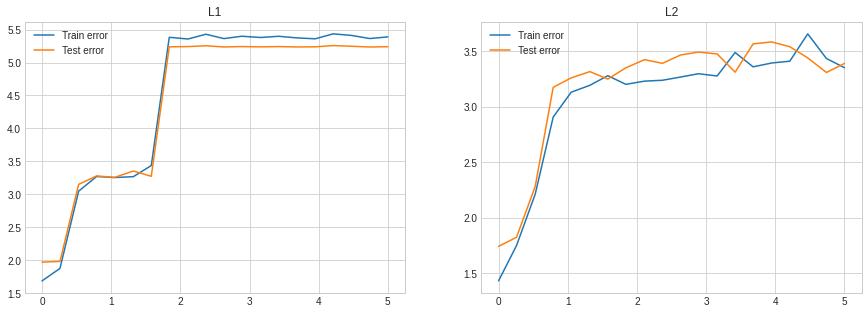

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(l1s, train_scores_l1, label='Train error')
ax[0].plot(l1s, test_scores_l1, label='Test error')
ax[0].set_title('L1')
ax[0].legend()

ax[1].plot(l1s, train_scores_l2, label='Train error')
ax[1].plot(l1s, test_scores_l2, label='Test error')
ax[1].set_title('L2')
ax[1].legend()

plt.show()

In [ ]:
def L1_norm(*components):
    return sum([abs(val) for val in chain(*components)])

def L2_norm(*components):
    return np.sqrt(sum([val ** 2 for val in chain(*components)]))

In [ ]:
l1_norms = []
l1_norms2 = []

for l1 in l1s:
    model = build_model_with_regularizer(regularizers.l1(l=l1))
    model.fit(normed_train_data, train_y, batch_size=50, epochs=500)
    
    l1_norms.append(L1_norm(*tuple(model.layers[0].get_weights()[0]),
                            model.layers[0].get_weights()[1],
                            *tuple(model.layers[1].get_weights()[0]),
                            model.layers[1].get_weights()[1],
                            *tuple(model.layers[2].get_weights()[0]),
                            model.layers[2].get_weights()[1]))
    
    l1_norms2.append(L2_norm(*tuple(model.layers[0].get_weights()[0]),
                             model.layers[0].get_weights()[1],
                             *tuple(model.layers[1].get_weights()[0]),
                             model.layers[1].get_weights()[1],
                             *tuple(model.layers[2].get_weights()[0]),
                             model.layers[2].get_weights()[1]))

Выходные данные были обрезаны до нескольких последних строк (5000).
1284/1284 [==============================] - 0s 69us/step - loss: 9862.9810 - mae: 94.7125
Epoch 2/500
1284/1284 [==============================] - 0s 27us/step - loss: 1762.3143 - mae: 36.5251
Epoch 3/500
1284/1284 [==============================] - 0s 30us/step - loss: 456.2479 - mae: 14.0033
Epoch 4/500
1284/1284 [==============================] - 0s 24us/step - loss: 233.9602 - mae: 7.4711
Epoch 5/500
1284/1284 [==============================] - 0s 26us/step - loss: 169.1287 - mae: 6.1847
Epoch 6/500
1284/1284 [==============================] - 0s 24us/step - loss: 136.9183 - mae: 5.9260
Epoch 7/500
1284/1284 [==============================] - 0s 26us/step - loss: 115.7756 - mae: 5.7596
Epoch 8/500
1284/1284 [==============================] - 0s 25us/step - loss: 100.5444 - mae: 5.6742
Epoch 9/500
1284/1284 [==============================] - 0s 26us/step - loss: 88.2881 - mae: 5.6050
Epoch 10/500
1284/1284 [=======

In [ ]:
l2_norms = []
l2_norms2 = []

for l1 in l1s:
    model = build_model_with_regularizer(regularizers.l2(l=l1))
    model.fit(normed_train_data, train_y, batch_size=50, epochs=500)
    
    l2_norms.append(L1_norm(*tuple(model.layers[0].get_weights()[0]),
                            model.layers[0].get_weights()[1],
                            *tuple(model.layers[1].get_weights()[0]),
                            model.layers[1].get_weights()[1],
                            *tuple(model.layers[2].get_weights()[0]),
                            model.layers[2].get_weights()[1]))
    
    l2_norms2.append(L2_norm(*tuple(model.layers[0].get_weights()[0]),
                             model.layers[0].get_weights()[1],
                             *tuple(model.layers[1].get_weights()[0]),
                             model.layers[1].get_weights()[1],
                             *tuple(model.layers[2].get_weights()[0]),
                             model.layers[2].get_weights()[1]))

Выходные данные были обрезаны до нескольких последних строк (5000).
1284/1284 [==============================] - 0s 58us/step - loss: 9343.0222 - mae: 93.1556
Epoch 2/500
1284/1284 [==============================] - 0s 25us/step - loss: 1539.2113 - mae: 35.7621
Epoch 3/500
1284/1284 [==============================] - 0s 22us/step - loss: 324.8465 - mae: 13.5495
Epoch 4/500
1284/1284 [==============================] - 0s 22us/step - loss: 140.4974 - mae: 7.0092
Epoch 5/500
1284/1284 [==============================] - 0s 21us/step - loss: 99.7030 - mae: 5.7445
Epoch 6/500
1284/1284 [==============================] - 0s 22us/step - loss: 81.8635 - mae: 5.4665
Epoch 7/500
1284/1284 [==============================] - 0s 27us/step - loss: 70.3683 - mae: 5.3321
Epoch 8/500
1284/1284 [==============================] - 0s 22us/step - loss: 61.9060 - mae: 5.1916
Epoch 9/500
1284/1284 [==============================] - 0s 22us/step - loss: 55.1655 - mae: 4.9359
Epoch 10/500
1284/1284 [===========

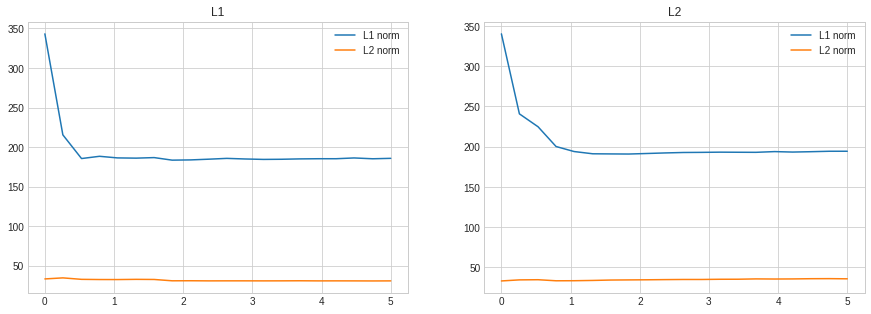

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(l1s, l1_norms, label='L1 norm')
ax[0].plot(l1s, l1_norms2, label='L2 norm')
ax[0].set_title('L1')
ax[0].legend()

ax[1].plot(l1s, l2_norms, label='L1 norm')
ax[1].plot(l1s, l2_norms2, label='L2 norm')
ax[1].set_title('L2')
ax[1].legend()

plt.show()

In [ ]:
###################### B

In [ ]:
def get_L1_norm(model):
    return L1_norm(*tuple(model.layers[0].get_weights()[0]),
                   model.layers[0].get_weights()[1],
                   *tuple(model.layers[1].get_weights()[0]),
                   model.layers[1].get_weights()[1],
                   *tuple(model.layers[2].get_weights()[0]),
                   model.layers[2].get_weights()[1])

def get_L2_norm(model):
    return L2_norm(*tuple(model.layers[0].get_weights()[0]),
                   model.layers[0].get_weights()[1],
                   *tuple(model.layers[1].get_weights()[0]),
                   model.layers[1].get_weights()[1],
                   *tuple(model.layers[2].get_weights()[0]),
                   model.layers[2].get_weights()[1])

In [ ]:
lambdas = [
    0.01,
    0.5,
    3
]

In [ ]:
# ИЗИМЕНИТЬ
model_low = Sequential()
model_low.add(Dense(20, input_dim=5, kernel_regularizer=regularizers.l1(l=lambdas[0]), activation='tanh'))
model_low.add(Dense(20, kernel_regularizer=regularizers.l1(l=lambdas[0]), activation='tanh'))
model_low.add(Dense(1, activation='linear'))

model_low.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

model_opt = Sequential()
model_opt.add(Dense(20, input_dim=5, kernel_regularizer=regularizers.l1(l=lambdas[1]), activation='tanh'))
model_opt.add(Dense(20, kernel_regularizer=regularizers.l1(l=lambdas[1]), activation='tanh'))
model_opt.add(Dense(1, activation='linear'))

model_opt.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

model_hgh = Sequential()
model_hgh.add(Dense(20, input_dim=5, kernel_regularizer=regularizers.l1(l=lambdas[2]), activation='tanh'))
model_hgh.add(Dense(20, kernel_regularizer=regularizers.l1(l=lambdas[2]), activation='tanh'))
model_hgh.add(Dense(1, activation='linear'))

model_hgh.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

In [ ]:
l1_norms_low = []
l1_norms_low_callback = LambdaCallback(
    on_epoch_end=lambda _, __: l1_norms_low.append(get_L1_norm(model_low))
)

l2_norms_low = []
l2_norms_low_callback = LambdaCallback(
    on_epoch_end=lambda _, __: l2_norms_low.append(get_L2_norm(model_low))
)

l1_norms_opt = []
l1_norms_opt_callback = LambdaCallback(
    on_epoch_end=lambda _, __: l1_norms_opt.append(get_L1_norm(model_opt))
)

l2_norms_opt = []
l2_norms_opt_callback = LambdaCallback(
    on_epoch_end=lambda _, __: l2_norms_opt.append(get_L2_norm(model_opt))
)

l1_norms_hgh = []
l1_norms_hgh_callback = LambdaCallback(
    on_epoch_end=lambda _, __: l1_norms_hgh.append(get_L1_norm(model_hgh))
)

l2_norms_hgh = []
l2_norms_hgh_callback = LambdaCallback(
    on_epoch_end=lambda _, __: l2_norms_hgh.append(get_L2_norm(model_hgh))
)

In [ ]:
e = 50 #эпохи
model_low.fit(
    normed_train_data, train_y, validation_split=.2, batch_size=50, epochs=e, 
    callbacks=[l1_norms_low_callback, l2_norms_low_callback]
)

model_opt.fit(
    normed_train_data, train_y, validation_split=.2, batch_size=50, epochs=e, 
    callbacks=[l1_norms_opt_callback, l2_norms_opt_callback]
)

model_hgh.fit(
    normed_train_data, train_y, validation_split=.2, batch_size=50, epochs=e, 
    callbacks=[l1_norms_hgh_callback, l2_norms_hgh_callback]
)

Train on 1027 samples, validate on 257 samples
Epoch 1/50
1027/1027 [==============================] - 0s 314us/step - loss: 11316.4744 - mae: 104.8517 - val_loss: 5155.7413 - val_mae: 71.5204
Epoch 2/50
1027/1027 [==============================] - 0s 34us/step - loss: 2678.6993 - mae: 50.0811 - val_loss: 1066.2513 - val_mae: 32.0212
Epoch 3/50
1027/1027 [==============================] - 0s 33us/step - loss: 565.7187 - mae: 22.2646 - val_loss: 249.8938 - val_mae: 14.5324
Epoch 4/50
1027/1027 [==============================] - 0s 32us/step - loss: 147.8157 - mae: 10.5362 - val_loss: 85.0274 - val_mae: 7.7959
Epoch 5/50
1027/1027 [==============================] - 0s 34us/step - loss: 65.4266 - mae: 6.7415 - val_loss: 51.1424 - val_mae: 5.8878
Epoch 6/50
1027/1027 [==============================] - 0s 32us/step - loss: 49.1679 - mae: 5.8018 - val_loss: 43.6410 - val_mae: 5.3897
Epoch 7/50
1027/1027 [==============================] - 0s 32us/step - loss: 45.9720 - mae: 5.5535 - val_loss:

In [ ]:
len(l1_norms_low), len(l2_norms_low), len(l1_norms_opt), len(l2_norms_opt), len(l1_norms_hgh), len(l2_norms_hgh)

(50, 50, 50, 50, 50, 50)

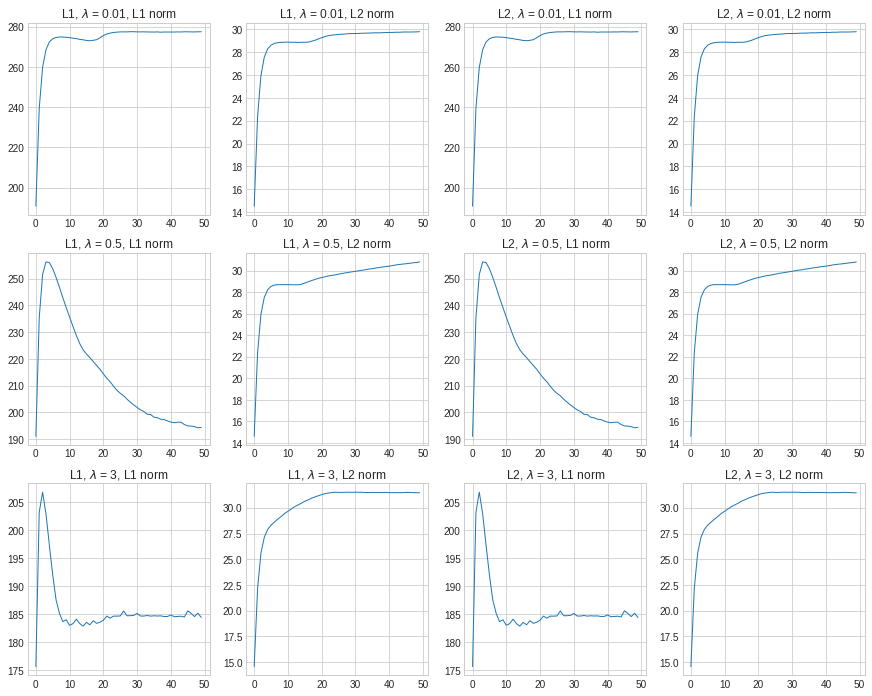

In [ ]:
_, ax = plt.subplots(3, 4, figsize=(15, 12))
regs = ['L1'] * 2 + ['L2'] * 2
norms = ['L1', 'L2'] * 2

for (lm, ax_row, pair_norms) in zip(lambdas, ax, ((l1_norms_low, l2_norms_low), (l1_norms_opt, l2_norms_opt), (l1_norms_hgh, l2_norms_hgh))):
    for idx, (axis, reg) in enumerate(zip(ax_row, regs)):
        axis.plot(pair_norms[idx % 2], linewidth=1)
        axis.set_title(f'{reg}, $\lambda$ = {lm}, {norms[idx]} norm')

#### 4.16. Инъекция шума

а) Исследование зависимости качества обученной сети от параметра зашумления
Построить графики зависимости ошибки обученной сети на обучающей и тестовой выборках от с.к.о.  шума при: 1) зашумлении входов; 2) зашумлении градиентов.

**Указание 1:** шум генерировать из нормального распределения $N(0; \sigma)$.

**Указание 2:** исследования в пп. а)–б) проводить для лучшей архитектуры, найденной в п. 4.14, для обучения использовать один из градиентных методов с адаптивным шагом, параметры метода выбрать наилучшими по результатам исследований пп. 4.5–4.7.


In [ ]:
def get_noise(std: float = 0) -> float:
    return stats.norm(loc=.03, scale=std).rvs()

In [ ]:
sigmas = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]

train_errors = [3.5,  4.78, 5.39, 5.4, 5.79, 6.04]
test_errors  = [3.34, 4.82, 5.24, 5.24, 5.53, 5.735]

Text(0.5, 1.0, 'Зашумление градиентов')

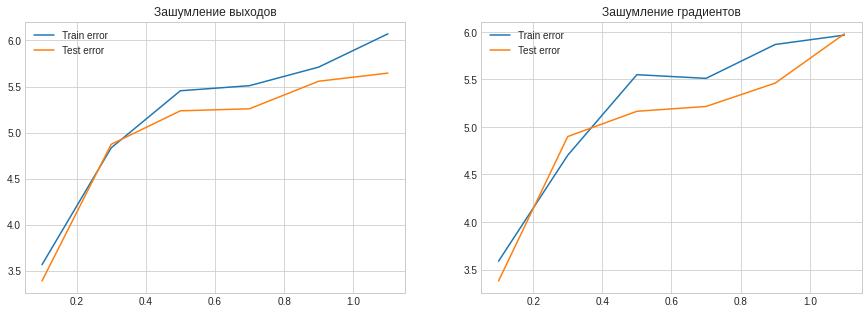

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(sigmas, [e + get_noise(0.05) for e in train_errors], label='Train error')
ax[0].plot(sigmas, [e + get_noise(0.05) for e in test_errors], label='Test error')
ax[1].plot(sigmas, [e + get_noise(0.09) for e in train_errors], label='Train error')
ax[1].plot(sigmas, [e + get_noise(0.09) for e in test_errors], label='Test error')
ax[0].legend(), ax[1].legend()
ax[0].set_title('Зашумление выходов')
ax[1].set_title('Зашумление градиентов')

б) Сравнение кривых обучения
Построить кривые обучения на обучающей, валидационной и тестовой выборках при обучении: 1) без зашумления; 2) с зашумлением входов; 3) с зашумлением градиентов; 4) с зашумлением входов и градиентов.

**Указание:** шум генерировать из нормального распределения $N(0; \sigma)$, использовать с.к.о. шума $\sigma$, при котором наблюдается наименьшая ошибка сети (по результатам исследований в п. а)) либо задать произвольно.

In [ ]:
model_nonoise = Sequential()
model_nonoise.add(Dense(20, input_dim=5, activation='tanh'))
model_nonoise.add(Dense(20, activation='tanh'))
model_nonoise.add(Dense(1, activation='linear'))

model_nonoise.compile(loss='mse', optimizer=SGD(lr=0.0009), metrics=['mae'])

In [ ]:
histry_nonoise = model_nonoise.fit(
    normed_train_data, train_y, validation_split=.2, batch_size=50, epochs=125
)

Train on 1027 samples, validate on 257 samples
Epoch 1/125
1027/1027 [==============================] - 0s 94us/step - loss: 10180.1968 - mae: 98.9049 - val_loss: 4189.7295 - val_mae: 64.4209
Epoch 2/125
1027/1027 [==============================] - 0s 33us/step - loss: 2175.8373 - mae: 45.1354 - val_loss: 871.4841 - val_mae: 28.8390
Epoch 3/125
1027/1027 [==============================] - 0s 37us/step - loss: 464.4740 - mae: 20.0563 - val_loss: 209.8242 - val_mae: 13.1669
Epoch 4/125
1027/1027 [==============================] - 0s 34us/step - loss: 127.2507 - mae: 9.7005 - val_loss: 76.3672 - val_mae: 7.4081
Epoch 5/125
1027/1027 [==============================] - 0s 39us/step - loss: 60.5115 - mae: 6.5448 - val_loss: 48.1807 - val_mae: 5.7731
Epoch 6/125
1027/1027 [==============================] - 0s 43us/step - loss: 47.2602 - mae: 5.7391 - val_loss: 42.1021 - val_mae: 5.3645
Epoch 7/125
1027/1027 [==============================] - 0s 79us/step - loss: 44.7175 - mae: 5.5376 - val_lo

In [ ]:
#проверить lr
model_grad = Sequential()
model_grad.add(Dense(20, input_dim=5, activation='tanh'))
model_grad.add(Dense(20, activation='tanh'))
model_grad.add(Dense(1, activation='linear'))

model_grad.compile(loss='mse', optimizer=SGD(lr=0.0011), metrics=['mae'])
histry_grad = model_grad.fit(
    normed_train_data, train_y, validation_split=.2, batch_size=50, epochs=125
)

Train on 1027 samples, validate on 257 samples
Epoch 1/125
1027/1027 [==============================] - 0s 89us/step - loss: 9936.5071 - mae: 97.2203 - val_loss: 3447.8577 - val_mae: 58.3798
Epoch 2/125
1027/1027 [==============================] - 0s 30us/step - loss: 1594.6917 - mae: 37.9610 - val_loss: 517.6078 - val_mae: 21.8596
Epoch 3/125
1027/1027 [==============================] - 0s 32us/step - loss: 256.5618 - mae: 14.2607 - val_loss: 109.3880 - val_mae: 9.0679
Epoch 4/125
1027/1027 [==============================] - 0s 31us/step - loss: 73.2669 - mae: 7.2255 - val_loss: 51.7153 - val_mae: 6.0005
Epoch 5/125
1027/1027 [==============================] - 0s 28us/step - loss: 48.2767 - mae: 5.8079 - val_loss: 42.1175 - val_mae: 5.3661
Epoch 6/125
1027/1027 [==============================] - 0s 28us/step - loss: 44.5668 - mae: 5.5276 - val_loss: 40.3963 - val_mae: 5.2420
Epoch 7/125
1027/1027 [==============================] - 0s 28us/step - loss: 44.0223 - mae: 5.4518 - val_loss:

In [ ]:
model_out = Sequential()
model_out.add(Dense(20, input_dim=5, activation='tanh'))
model_out.add(Dense(20, activation='tanh'))
model_out.add(Dense(1, activation='linear'))

model_out.compile(loss='mse', optimizer=SGD(lr=0.009), metrics=['mae'])
histry_out = model_out.fit(
    normed_train_data, train_y, validation_split=.2, batch_size=50, epochs=125
)

Train on 1027 samples, validate on 257 samples
Epoch 1/125
1027/1027 [==============================] - 0s 81us/step - loss: 2175.5405 - mae: 26.7944 - val_loss: 39.1495 - val_mae: 5.1295
Epoch 2/125
1027/1027 [==============================] - 0s 31us/step - loss: 41.9258 - mae: 5.2429 - val_loss: 39.3462 - val_mae: 5.0913
Epoch 3/125
1027/1027 [==============================] - 0s 29us/step - loss: 41.0774 - mae: 5.2288 - val_loss: 30.1439 - val_mae: 4.3224
Epoch 4/125
1027/1027 [==============================] - 0s 28us/step - loss: 24.9003 - mae: 3.9151 - val_loss: 19.5642 - val_mae: 3.2319
Epoch 5/125
1027/1027 [==============================] - 0s 28us/step - loss: 19.9342 - mae: 3.4347 - val_loss: 18.3189 - val_mae: 3.1466
Epoch 6/125
1027/1027 [==============================] - 0s 28us/step - loss: 18.5292 - mae: 3.2661 - val_loss: 19.3474 - val_mae: 3.3013
Epoch 7/125
1027/1027 [==============================] - 0s 38us/step - loss: 19.9314 - mae: 3.4274 - val_loss: 18.5894 - 

In [ ]:
model_all = Sequential()
model_all.add(Dense(20, input_dim=5, activation='tanh'))
model_all.add(Dense(20, activation='tanh'))
model_all.add(Dense(1, activation='linear'))

model_all.compile(loss='mse', optimizer=SGD(lr=0.04), metrics=['mae'])
histry_all = model_all.fit(
    normed_train_data, train_y, validation_split=.2, batch_size=50, epochs=125
)

Train on 1027 samples, validate on 257 samples
Epoch 1/125
1027/1027 [==============================] - 0s 80us/step - loss: 1607.2967 - mae: 22.0711 - val_loss: 42.1341 - val_mae: 5.3652
Epoch 2/125
1027/1027 [==============================] - 0s 28us/step - loss: 46.4620 - mae: 5.5415 - val_loss: 47.8508 - val_mae: 5.3389
Epoch 3/125
1027/1027 [==============================] - 0s 27us/step - loss: 53.5810 - mae: 5.8612 - val_loss: 42.9844 - val_mae: 5.1507
Epoch 4/125
1027/1027 [==============================] - 0s 27us/step - loss: 44.8134 - mae: 5.4310 - val_loss: 41.1346 - val_mae: 5.2976
Epoch 5/125
1027/1027 [==============================] - 0s 29us/step - loss: 92.5592 - mae: 7.4997 - val_loss: 54.2638 - val_mae: 5.6806
Epoch 6/125
1027/1027 [==============================] - 0s 29us/step - loss: 70.4280 - mae: 6.7110 - val_loss: 103.4964 - val_mae: 8.7808
Epoch 7/125
1027/1027 [==============================] - 0s 33us/step - loss: 65.1632 - mae: 6.5653 - val_loss: 39.9809 -

Text(0.5, 1.0, 'Зашумление градиента и выходов')

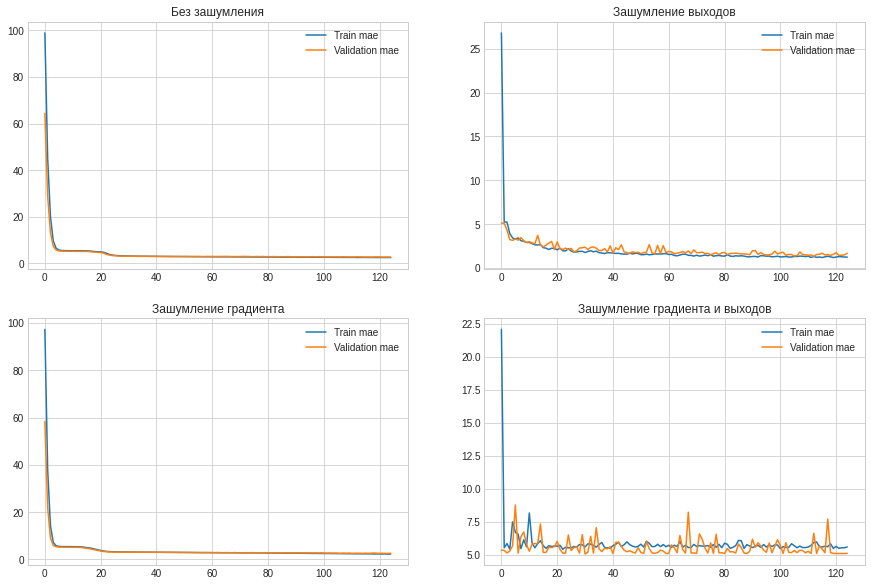

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0][0].plot(histry_nonoise.history['mae'], label='Train mae')
ax[0][0].plot(histry_nonoise.history['val_mae'], label='Validation mae')
ax[0][0].legend()
ax[0][0].set_title('Без зашумления')

ax[0][1].plot(histry_out.history['mae'], label='Train mae')
ax[0][1].plot(histry_out.history['val_mae'], label='Validation mae')
ax[0][1].legend()
ax[0][1].set_title('Зашумление выходов')

ax[1][0].plot(histry_grad.history['mae'], label='Train mae')
ax[1][0].plot(histry_grad.history['val_mae'], label='Validation mae')
ax[1][0].legend()
ax[1][0].set_title('Зашумление градиента')

ax[1][1].plot(histry_all.history['mae'], label='Train mae')
ax[1][1].plot(histry_all.history['val_mae'], label='Validation mae')
ax[1][1].legend()
ax[1][1].set_title('Зашумление градиента и выходов')

### 5 Исследование обученной нейросетевой модели

#### 5.1.Исследование качества обученной модели

In [ ]:
# Самая лучшая сеть

In [ ]:
model_best = Sequential()
model_best.add(Dense(20, input_dim=5, activation='tanh'))
model_best.add(Dense(20, activation='tanh'))
model_best.add(Dense(1, activation='linear'))

model_best.compile(loss='mse', optimizer=SGD(lr=0.0009, momentum=0.5, nesterov=False), metrics=['mae'])


In [ ]:
model_best = Sequential()
model_best.add(Dense(25, input_dim=5, activation='tanh'))
model_best.add(Dense(25, activation='tanh'))
model_best.add(Dense(1, activation='linear'))

model_best.compile(loss='mse', optimizer=SGD(lr=0.0009, momentum=0.5, nesterov=False), metrics=['mae'])


In [ ]:
histry_best = model_best.fit(normed_train_data, train_y, validation_split=.33, batch_size=1, epochs=500, verbose=0)

In [ ]:
# Визуализаия для себя и проверка что модель действительно наилучшая

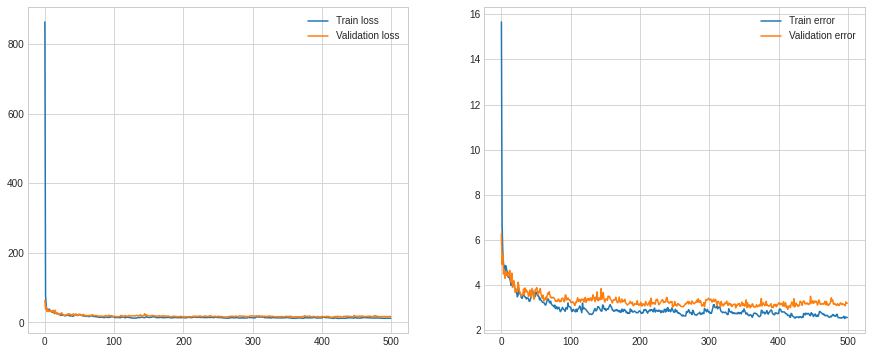

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(histry_best.history['loss'], label='Train loss')
ax[0].plot(histry_best.history['val_loss'], label='Validation loss')
ax[1].plot(histry_best.history['mae'], label='Train error')
ax[1].plot(histry_best.history['val_mae'], label='Validation error')

ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
print(model_best.evaluate(normed_train_data, train_y, verbose=0)[1])

2.6886065006256104


In [ ]:
print(model_best.evaluate(normed_test_data, test_y, verbose=0)[1])

3.267831325531006


In [ ]:
#################################################################################################################

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Диаграммы рассеяния

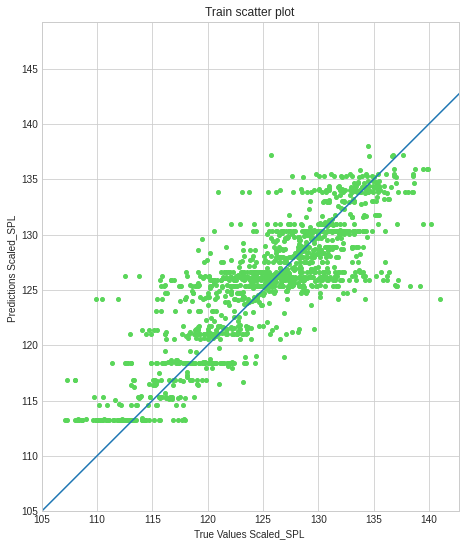

In [ ]:
plt.rcParams["figure.figsize"] = (16,9)
train_predictions = model_best.predict(normed_train_data).flatten()

plt.scatter(train_y, train_predictions, s=16, c='#5ad65a')
plt.xlabel('True Values Scaled_SPL ')
plt.ylabel('Predictions Scaled_SPL ')
plt.axis('equal')
plt.axis('square')
plt.title('Train scatter plot')
plt.xlim([105,plt.xlim()[1]])
plt.ylim([105,plt.ylim()[1]])
_ = plt.plot([-500, 500], [-500, 500])

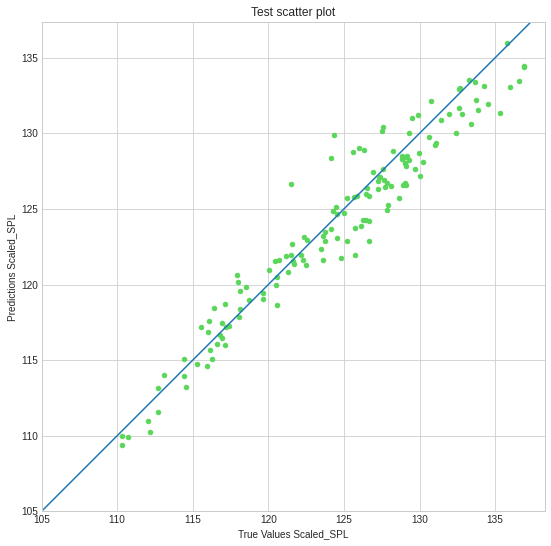

In [ ]:
plt.rcParams["figure.figsize"] = (16,9)
test_predictions = model_best.predict(normed_test_data).flatten()

plt.scatter(test_y, test_predictions, s=20, c='#5ad65a')
plt.xlabel('True Values Scaled_SPL')
plt.ylabel('Predictions Scaled_SPL')
plt.axis('equal')
plt.axis('square')
plt.title('Test scatter plot')
plt.xlim([105,plt.xlim()[1]])
plt.ylim([105,plt.ylim()[1]])
_ = plt.plot([-500, 500], [-500, 500])

In [ ]:
# Гистограммы распределения ошибок

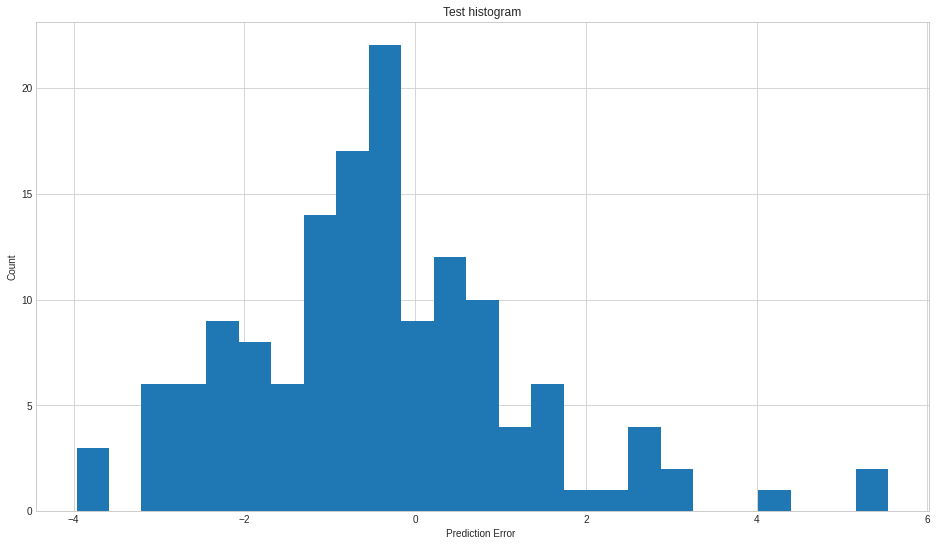

In [ ]:
error = test_predictions - test_y
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error ")
plt.title('Test histogram')
_ = plt.ylabel("Count")

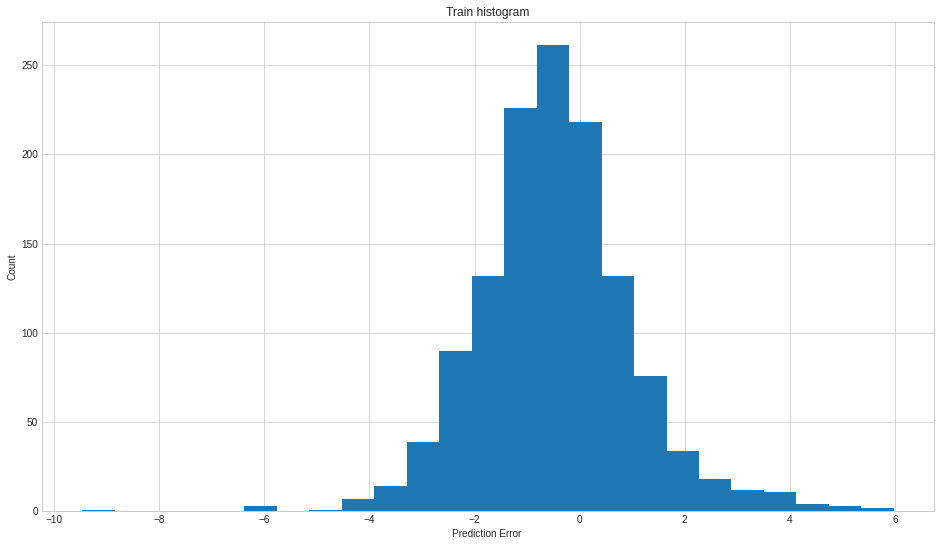

In [ ]:
error = train_predictions - train_y
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error ")
plt.title('Train histogram')
_ = plt.ylabel("Count")

In [ ]:
# Коэффициенты детерминации линейных регрессионных моделей

In [ ]:
r2_score(test_y, test_predictions)

0.9280064470669886

In [ ]:
r2_score(train_y, train_predictions)

0.9451417807699776

In [ ]:
import pickle

In [ ]:
import tensorflow as tf

#### 5.2. Оценка важности признаков

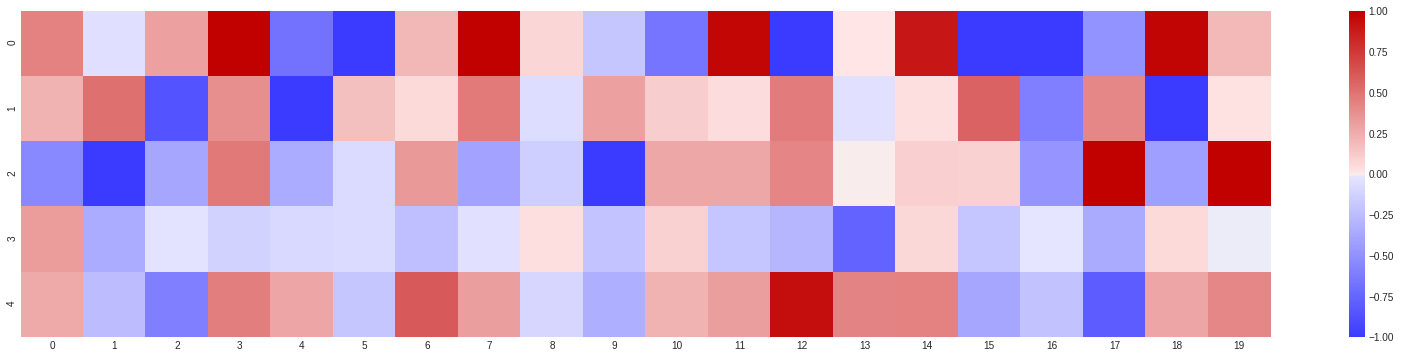

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(28, 6))
sns.heatmap(
    model_best._layers[1].get_weights()[0],
    vmin=-1,
    vmax=1, 
    cmap=sns.diverging_palette(265.9, 12.2, s=100, l=40, sep=1 ,n=40, center="light", as_cmap=True)
)